# Global Power Plant Database

In [4]:
import warnings
warnings.filterwarnings ('ignore')

### Import Data from Website

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [7]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

# 

### EDA

In [8]:
df.shape

(907, 27)

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: country
Unique Values: ['IND']


Column: country_long
Unique Values: ['India']


Column: name
Unique Values: ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'BADARPUR' 'B

##### Dropping columns that have only single values or irrelevent data

In [12]:
df.drop(['country','country_long','name','gppd_idnr','latitude','longitude','other_fuel2','other_fuel3','commissioning_year','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','generation_data_source','estimated_generation_gwh'], axis=1,inplace=True)

In [13]:
df.head()

capacity_mw primary_fuel other_fuel1  generation_gwh_2014  \
0          2.5        Solar         NaN                  NaN   
1         98.0         Coal         NaN                  NaN   
2         39.2         Wind         NaN                  NaN   
3        135.0          Gas         NaN           617.789264   
4       1800.0         Coal         Oil          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN  
3           626.239128  
4          7279.000000

In [14]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [15]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
other_fuel1            709
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [16]:
df.nunique()

capacity_mw            361
primary_fuel             8
other_fuel1              3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [17]:
df.dtypes

capacity_mw            float64
primary_fuel            object
other_fuel1             object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

# 

### Analysing with Null values

In [18]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
other_fuel1            709
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

##### Making a copy of the dataset to analyse relation of only non-Null values. Records with all column values are taken into consideration

In [19]:
df1 = df[['capacity_mw','generation_gwh_2018','generation_gwh_2017','generation_gwh_2016','generation_gwh_2015','generation_gwh_2014']].copy()
df1=df1.dropna()
df1.isnull().sum()

capacity_mw            0
generation_gwh_2018    0
generation_gwh_2017    0
generation_gwh_2016    0
generation_gwh_2015    0
generation_gwh_2014    0
dtype: int64

In [20]:
x = df1.drop(columns = ['capacity_mw'])
y = df1['capacity_mw']

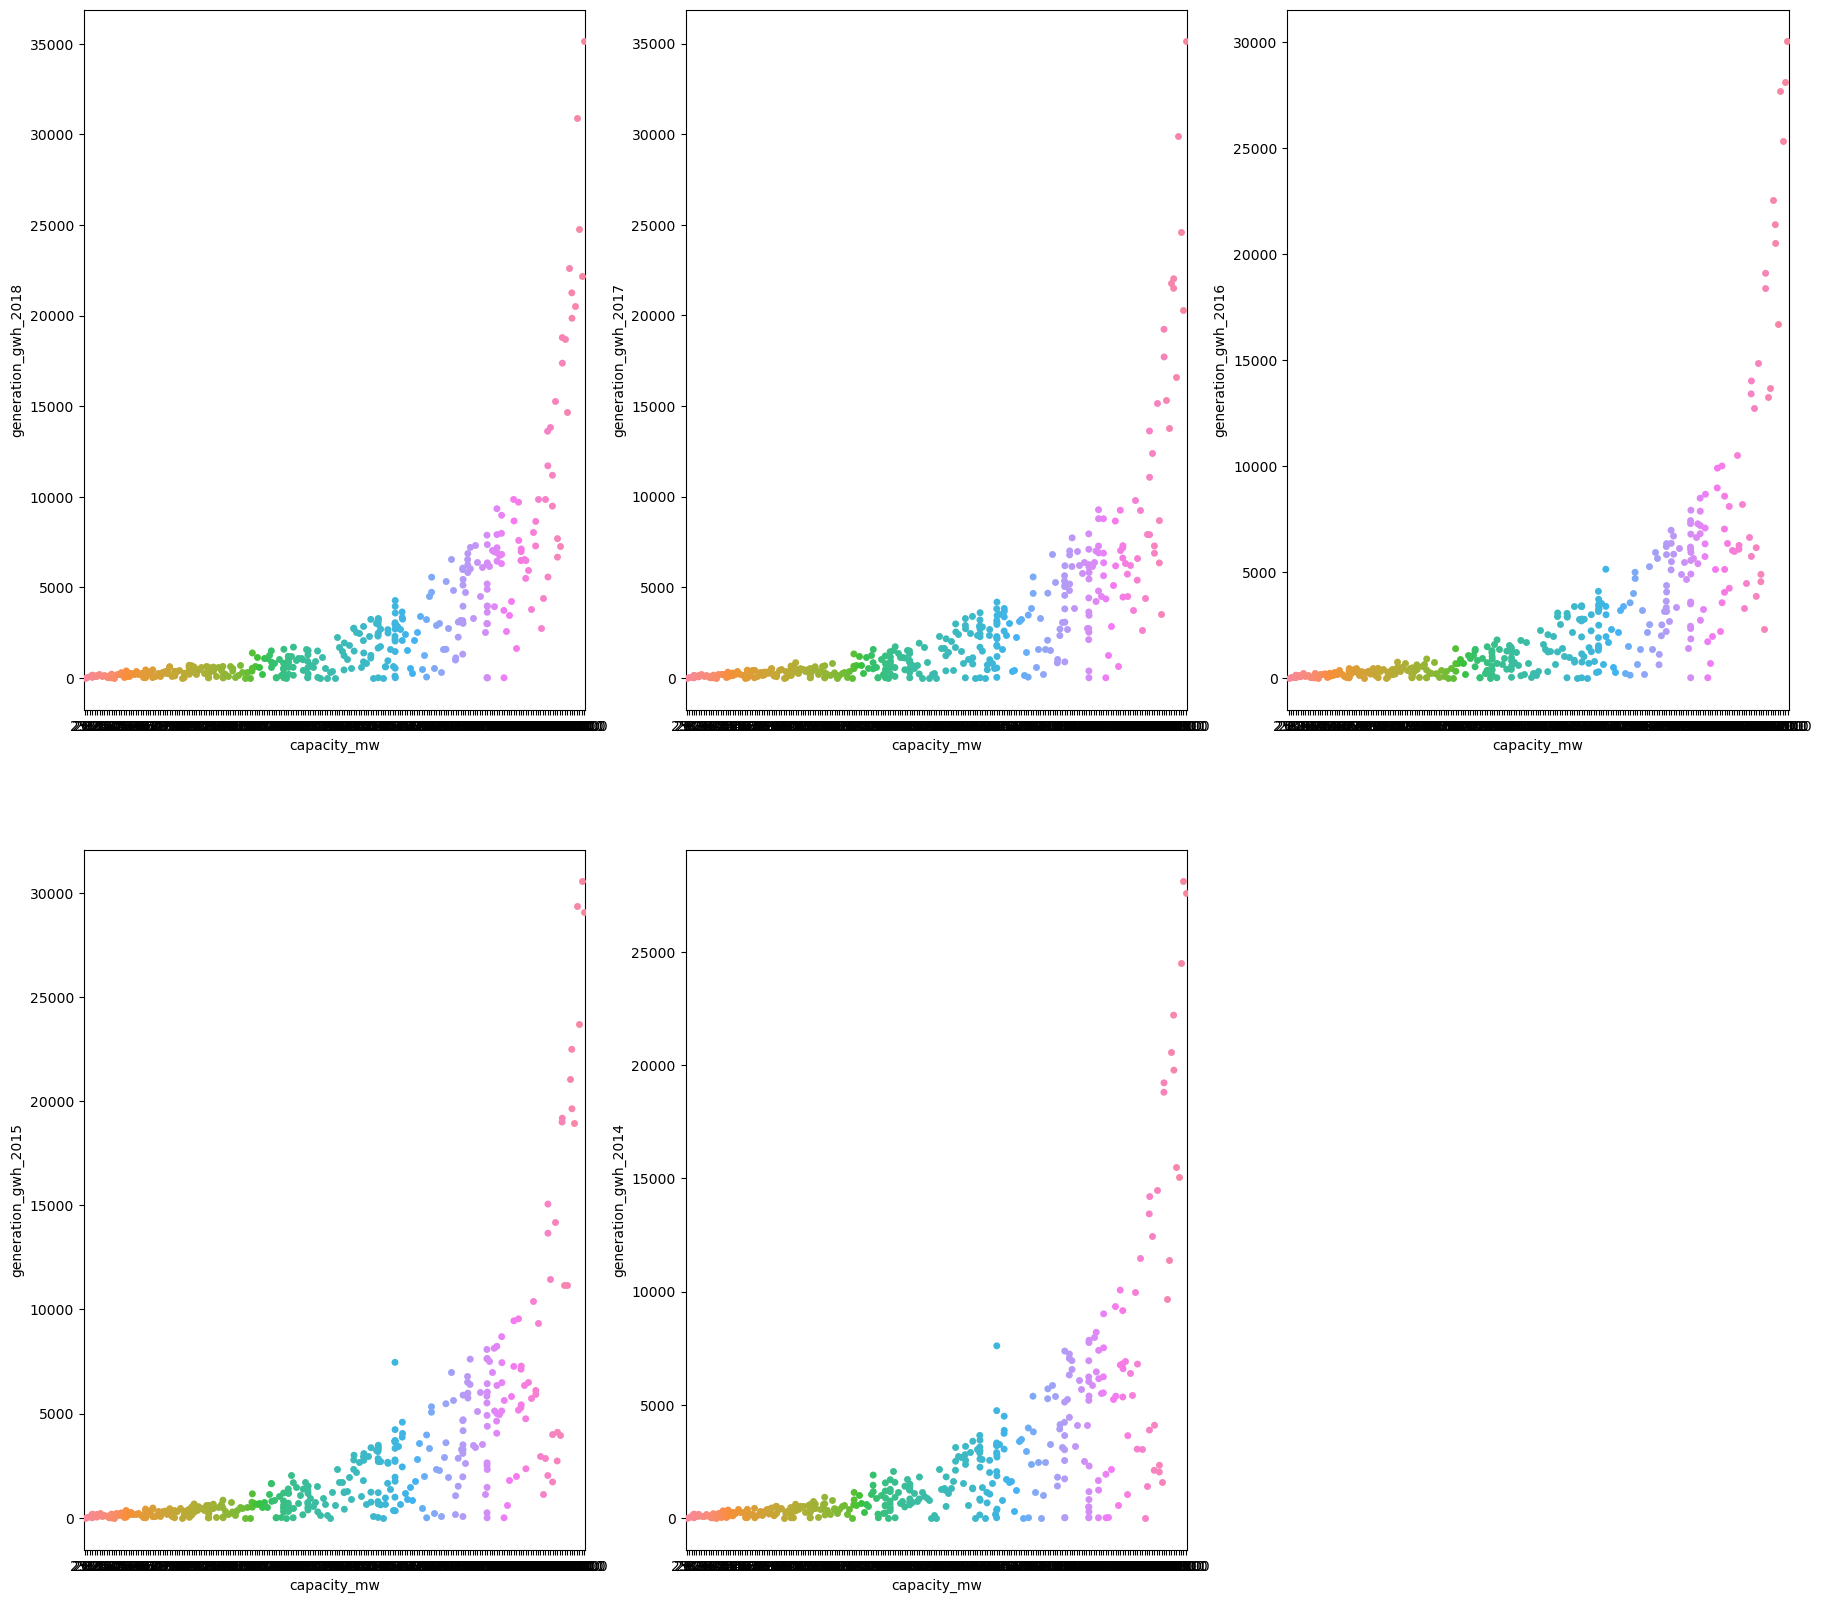

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22,20))
plotnumber = 1

for column in x:
    if plotnumber<=6:
        ax = plt.subplot (2,3,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

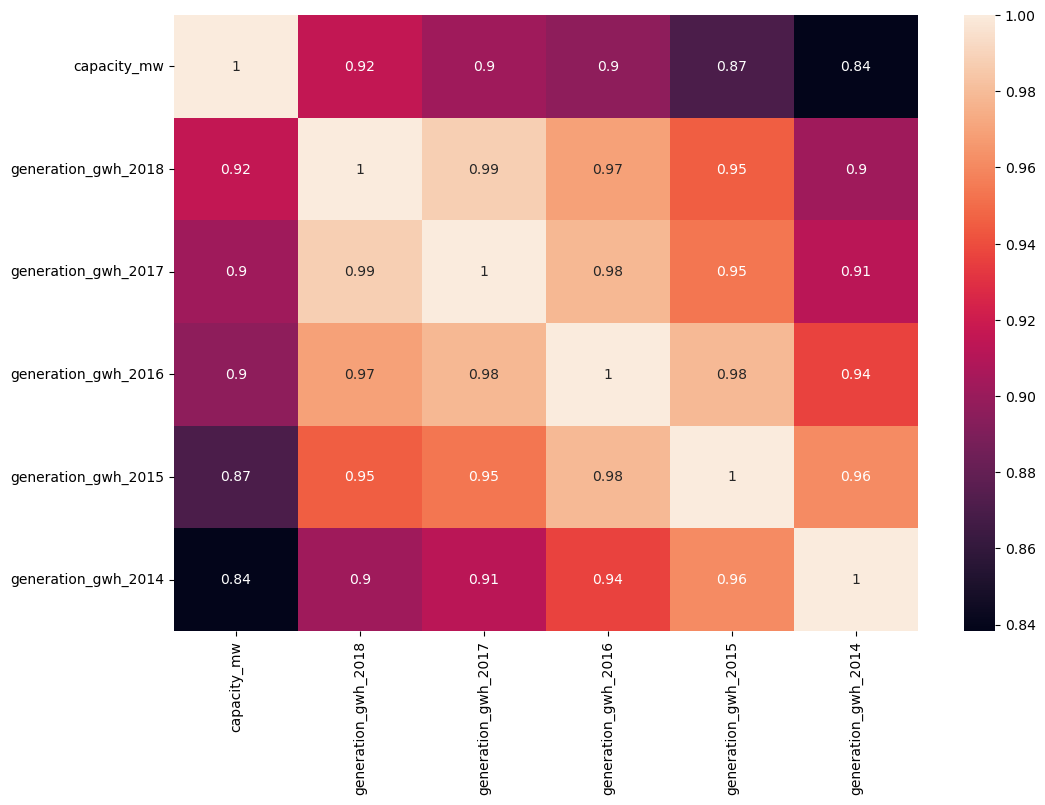

In [22]:
df_corr = df1.corr().abs ()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

##### Checking how much column data are related to each other, according to which we will used Imputation techniques

# 

### Imputation of Continuous data

In [23]:
from sklearn.impute import KNNImputer

knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['capacity_mw','generation_gwh_2018']]))

df[['capacity_mw','generation_gwh_2018']] = knnimp.transform(df[['capacity_mw','generation_gwh_2018']])

###### 'capacity_mw' has no Null values and 'generation_gwh_2018' is 0.92 related to 'capacity_mw'

In [24]:
knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['generation_gwh_2018','generation_gwh_2017']]))

df[['generation_gwh_2018','generation_gwh_2017']] = knnimp.transform(df[['generation_gwh_2018','generation_gwh_2017']])

###### 'generation_gwh_2018' has no Null values and 'generation_gwh_2017' is 0.99 related to 'generation_gwh_2018'

In [25]:
knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['generation_gwh_2017','generation_gwh_2016']]))

df[['generation_gwh_2017','generation_gwh_2016']] = knnimp.transform(df[['generation_gwh_2017','generation_gwh_2016']])

###### 'generation_gwh_2017' has no Null values and 'generation_gwh_2016' is 0.98 related to 'generation_gwh_2017'

In [26]:
knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['generation_gwh_2016','generation_gwh_2015']]))

df[['generation_gwh_2016','generation_gwh_2015']] = knnimp.transform(df[['generation_gwh_2016','generation_gwh_2015']])

###### 'generation_gwh_2016' has no Null values and 'generation_gwh_2015' is 0.98 related to 'generation_gwh_2016'

In [27]:
knnimp = KNNImputer(n_neighbors=2)
knn_imp = pd.DataFrame (knnimp.fit_transform(df[['generation_gwh_2015','generation_gwh_2014']]))

df[['generation_gwh_2015','generation_gwh_2014']] = knnimp.transform(df[['generation_gwh_2015','generation_gwh_2014']])

###### 'generation_gwh_2015' has no Null values and 'generation_gwh_2014' is 0.96 related to 'generation_gwh_2015'

# 

### Dealing with Null values of Categorical data

In [28]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
other_fuel1            709
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [29]:
df.dtypes

capacity_mw            float64
primary_fuel            object
other_fuel1             object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [30]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [31]:
df['other_fuel1'].isnull().mean()

0.7816979051819184

In [32]:
df['other_fuel1'].isnull().sum()

709

In [33]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

<AxesSubplot:>

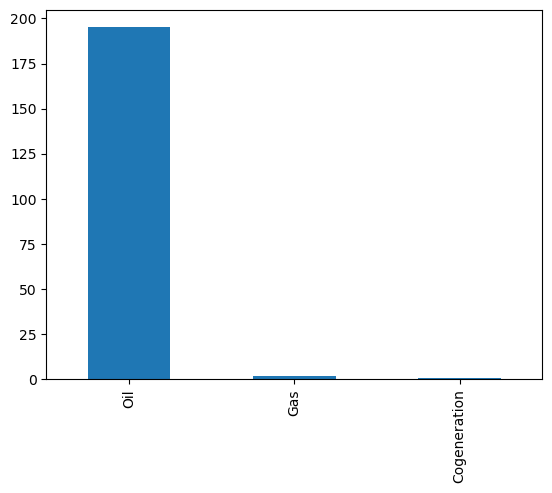

In [34]:
df['other_fuel1'].value_counts().plot.bar()

##### The column 'other_fuel1' has about 78% of Null values, so its better to drop it

In [35]:
df = df.drop(['other_fuel1'], axis=1)

In [36]:
df.head()

capacity_mw primary_fuel  generation_gwh_2014  generation_gwh_2015  \
0          2.5        Solar           334.245375           221.845200   
1         98.0         Coal           157.927964           213.278250   
2         39.2         Wind           157.468700           162.155087   
3        135.0          Gas           617.789264           843.747000   
4       1800.0         Coal          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0           153.006125           260.299000            27.466975  
1           162.720150           241.620825           237.819925  
2           240.048500           165.978200           181.726800  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

# 

### Encoding

In [37]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df.primary_fuel = le.fit_transform(df.primary_fuel)
df.head()

capacity_mw  primary_fuel  generation_gwh_2014  generation_gwh_2015  \
0          2.5             6           334.245375           221.845200   
1         98.0             1           157.927964           213.278250   
2         39.2             7           157.468700           162.155087   
3        135.0             2           617.789264           843.747000   
4       1800.0             1          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0           153.006125           260.299000            27.466975  
1           162.720150           241.620825           237.819925  
2           240.048500           165.978200           181.726800  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

In [40]:
df['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

# 

### Removing Outliners

In [41]:
df.describe()

capacity_mw  primary_fuel  generation_gwh_2014  generation_gwh_2015  \
count   907.000000    907.000000           907.000000           907.000000   
mean    326.223755      3.206174          1265.182327          1271.793162   
std     590.085456      2.280652          2873.796176          3072.787367   
min       0.000000      0.000000             0.000000             0.000000   
25%      16.725000      1.000000           248.998750           214.327975   
50%      59.200000      3.000000           334.245375           221.845200   
75%     385.250000      6.000000           792.343325           689.135438   
max    4760.000000      7.000000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000           907.000000  
mean           1283.378472          1375.290907          1340.706660  
std            3104.449113          3147.316774          3291.615057  
min               0.000000             0.000000             0.000000  
25%             153.006125           235.551325            27.466975  
50%             153.006125           260.299000           126.589500  
75%             726.887300           817.977250           837.129594  
max           30015.000000         35116.000000         35136.000000

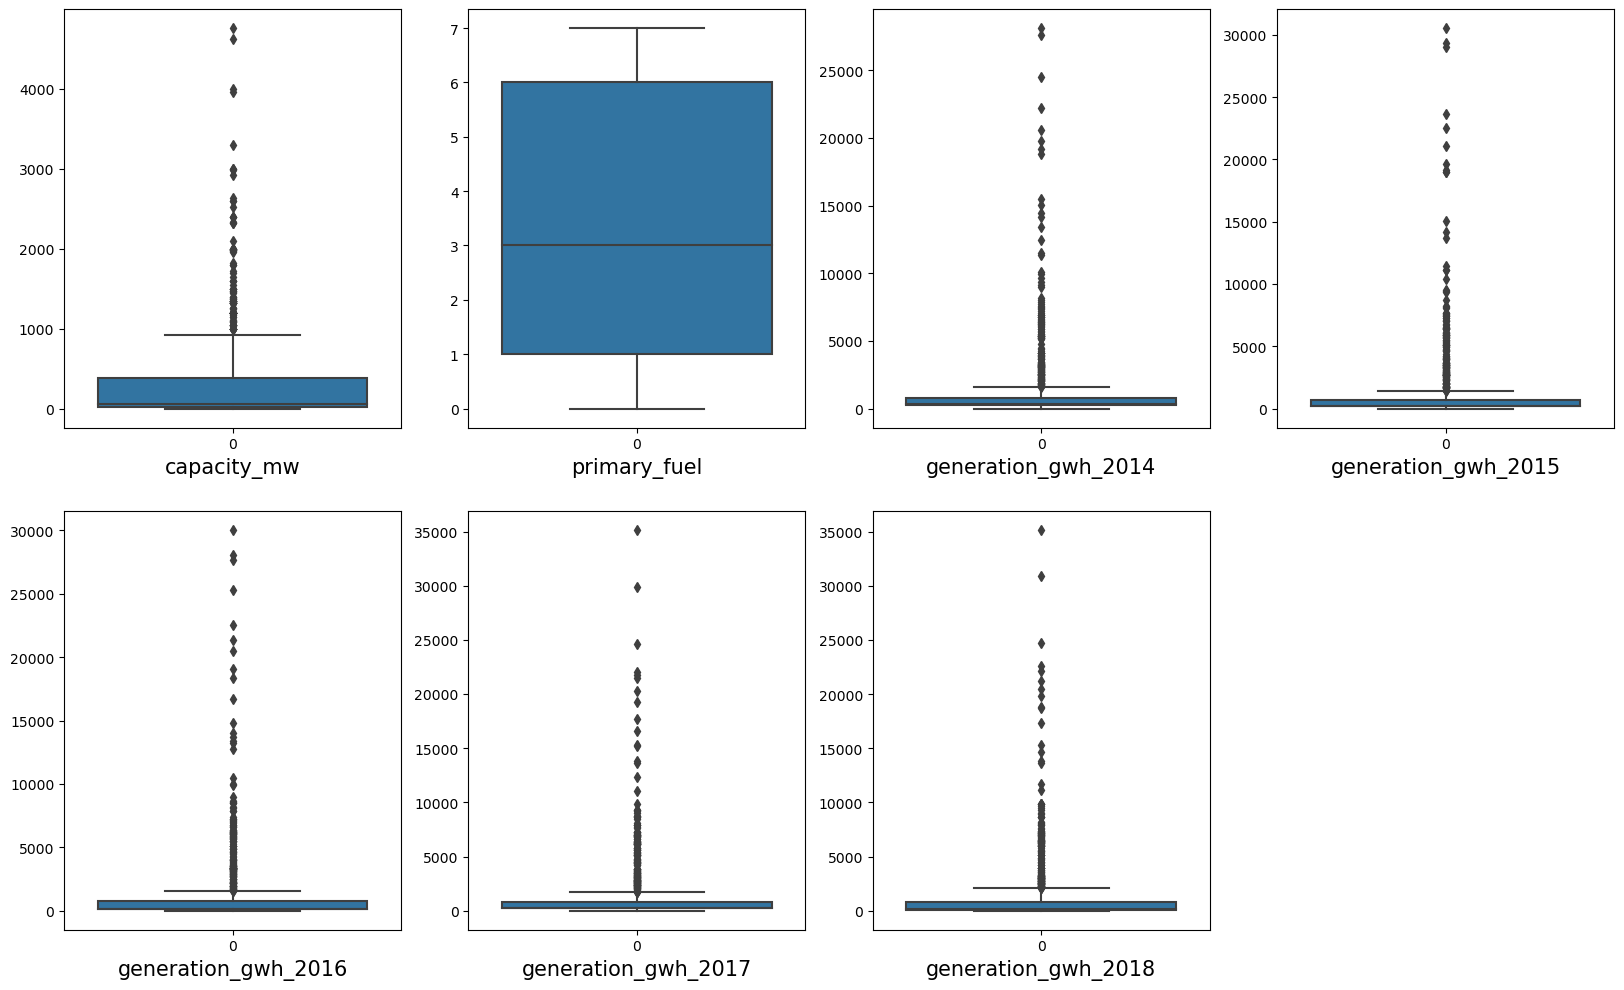

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

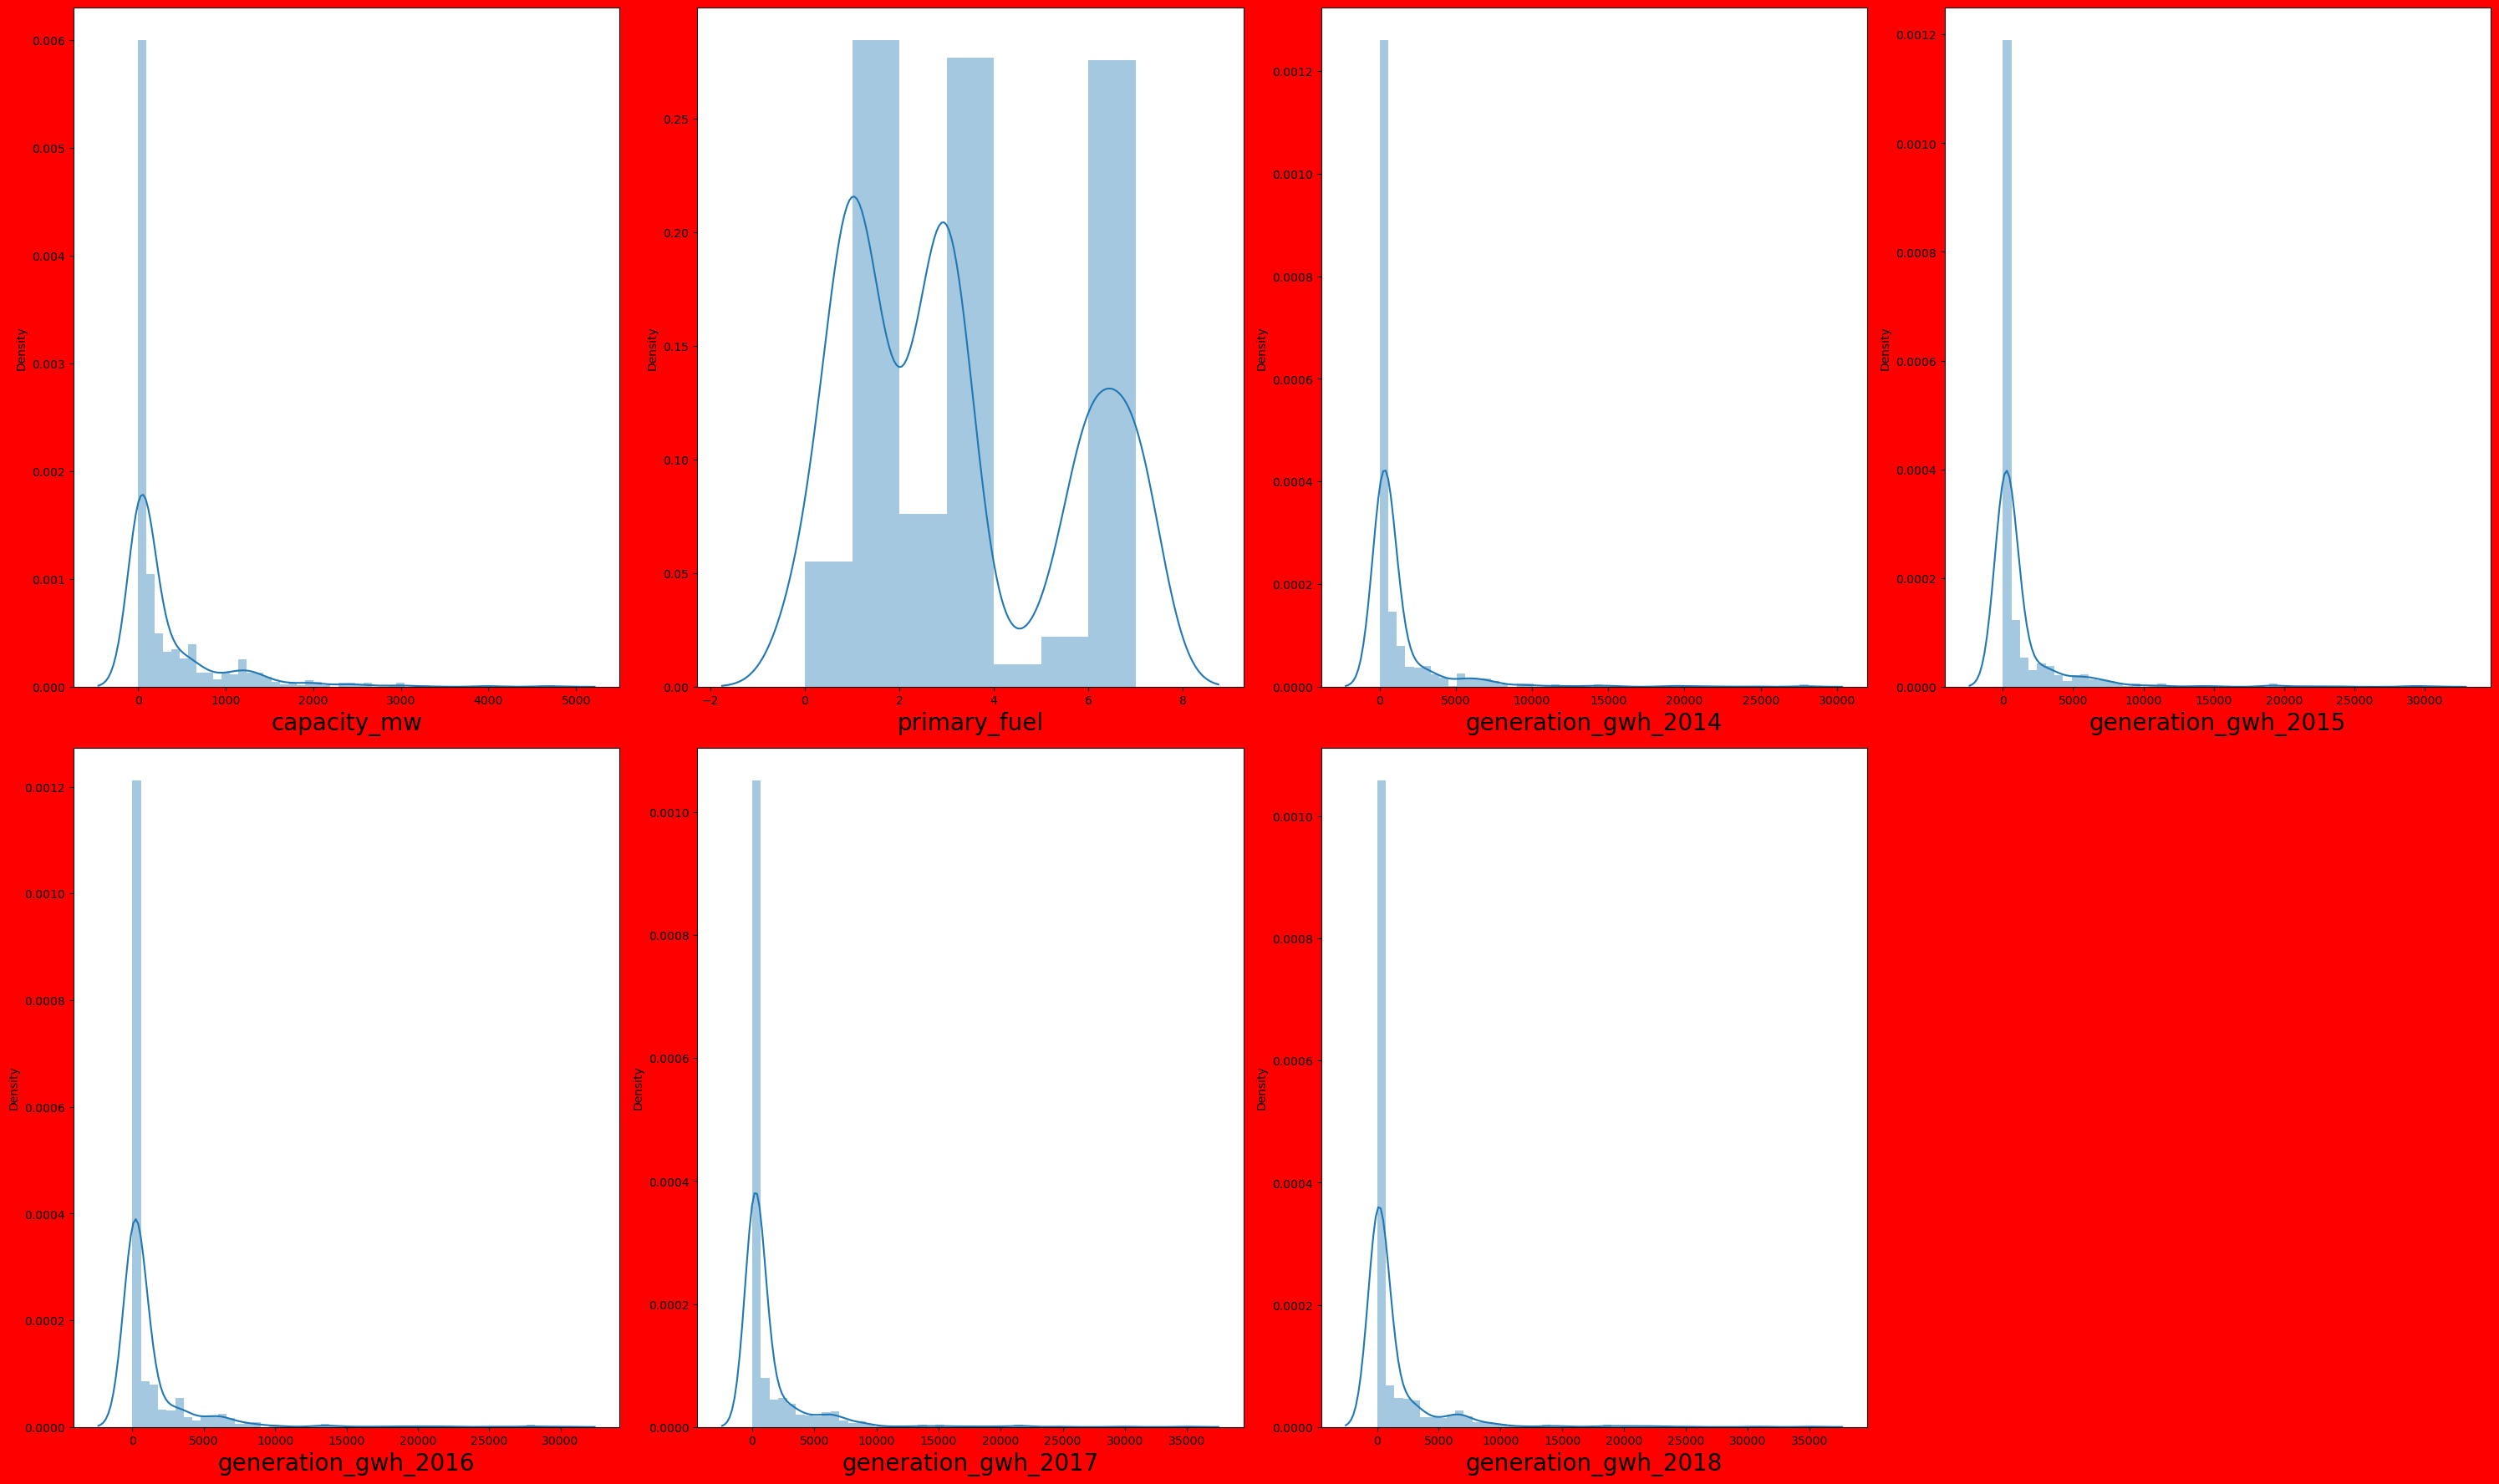

In [43]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [44]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [45]:
from scipy.stats import zscore 

z_score = zscore (df[['capacity_mw','generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.5).all(axis=1)
df = df[filtering_entry]

df.describe()

capacity_mw  primary_fuel  generation_gwh_2014  generation_gwh_2015  \
count   871.000000    871.000000           871.000000           871.000000   
mean    239.129582      3.283582           890.980923           864.157296   
std     377.307413      2.287637          1500.605859          1560.908865   
min       0.000000      0.000000             0.000000             0.000000   
25%      16.000000      1.000000           246.316375           213.278250   
50%      50.000000      3.000000           334.245375           221.845200   
75%     290.500000      6.000000           665.933600           591.416325   
max    1800.000000      7.000000          8197.970000          8227.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           871.000000           871.000000           871.000000  
mean            846.318499           919.225573           850.994001  
std            1593.486727          1620.338151          1698.357375  
min               0.000000             0.000000             0.000000  
25%             153.006125           234.640900            27.466975  
50%             153.006125           260.299000           100.286050  
75%             500.638125           544.719075           591.378250  
max            8952.470000          9004.210000          9334.000000

In [46]:
df.shape

(871, 7)

# 

### Removing Skewness

In [47]:
df.skew()

capacity_mw            1.982417
primary_fuel           0.417619
generation_gwh_2014    2.853781
generation_gwh_2015    2.735896
generation_gwh_2016    2.722696
generation_gwh_2017    2.679462
generation_gwh_2018    2.661808
dtype: float64

In [48]:
df['capacity_mw'] = np.log1p(df['capacity_mw'])
df['generation_gwh_2014'] = np.log1p(df['generation_gwh_2014'])
df['generation_gwh_2015'] = np.log1p(df['generation_gwh_2015'])
df['generation_gwh_2016'] = np.log1p(df['generation_gwh_2016'])
df['generation_gwh_2017'] = np.log1p(df['generation_gwh_2017'])
df['generation_gwh_2018'] = np.log1p(df['generation_gwh_2018'])

In [49]:
df.skew()

capacity_mw            0.094913
primary_fuel           0.417619
generation_gwh_2014   -1.309074
generation_gwh_2015   -0.962776
generation_gwh_2016   -0.676908
generation_gwh_2017   -1.088837
generation_gwh_2018    0.013728
dtype: float64

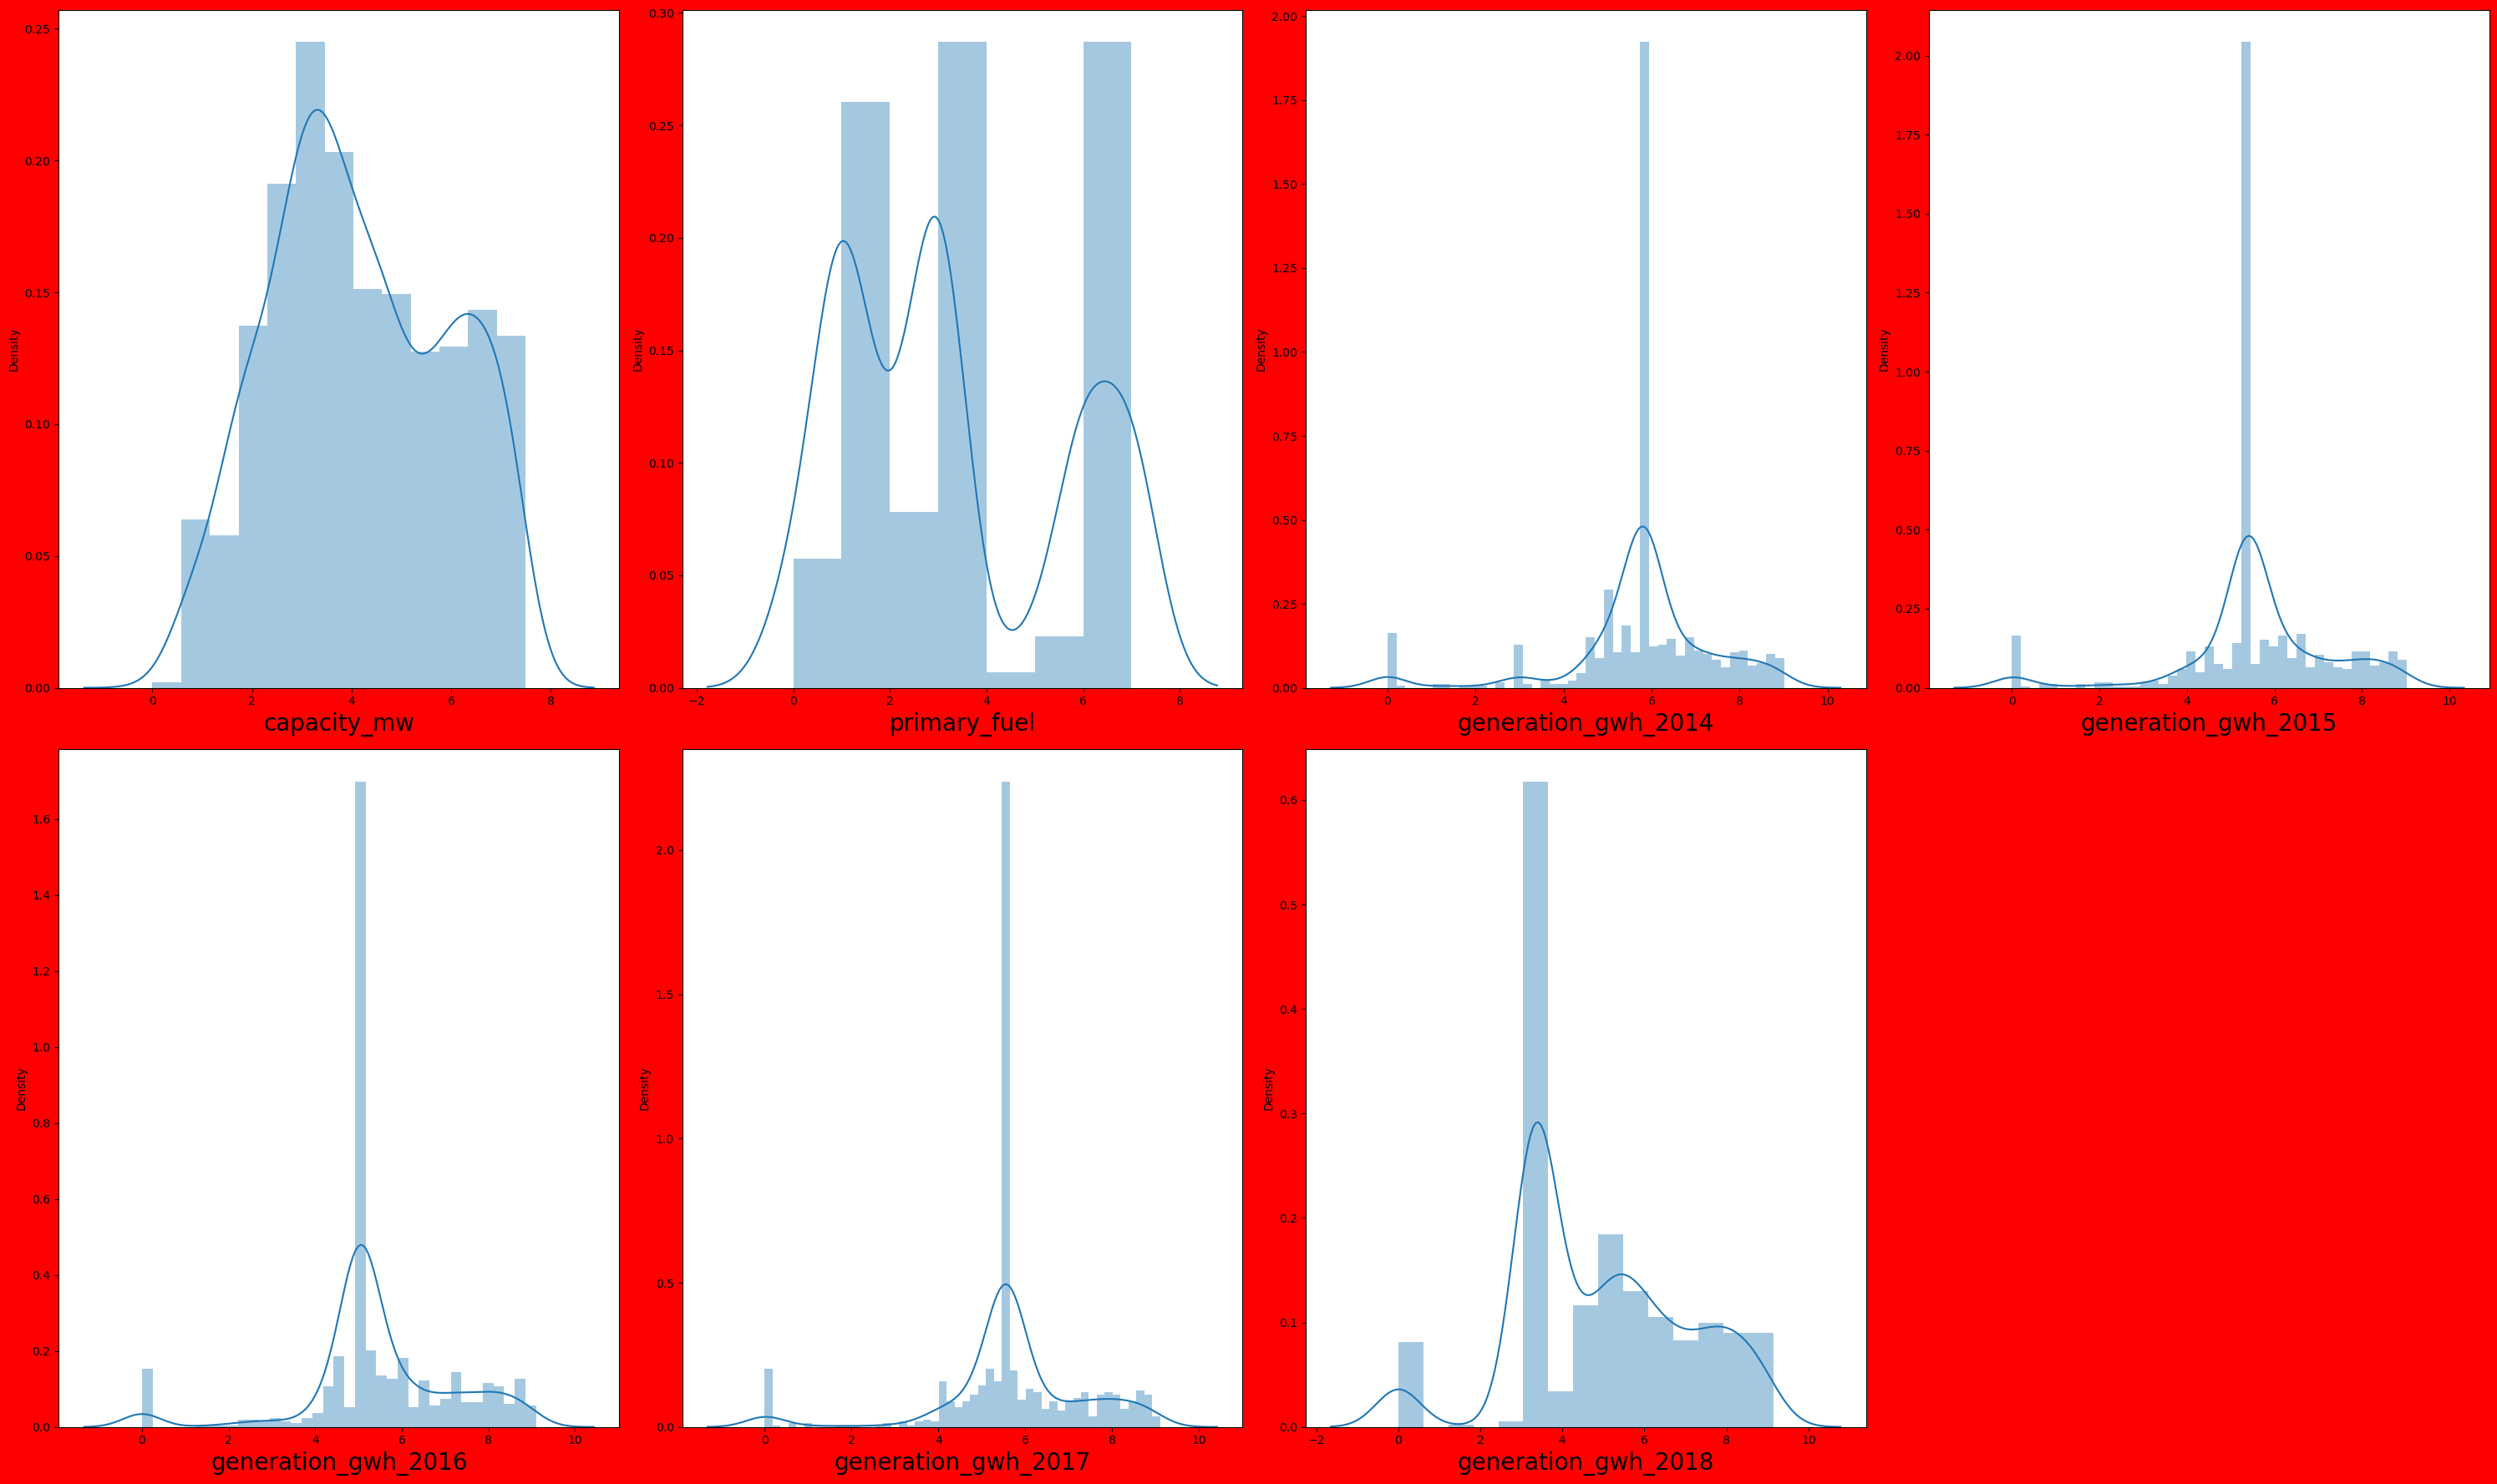

In [50]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout() 

# 

### Removing Multi-colinearity

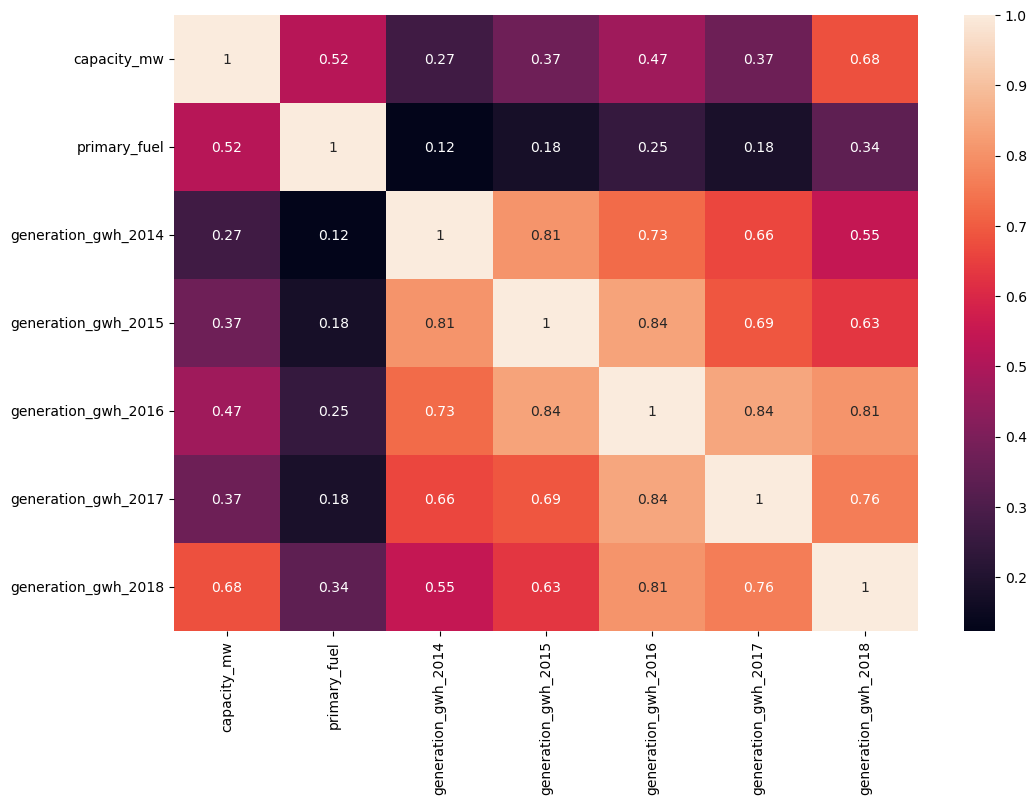

In [51]:
df_corr = df.corr().abs ()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

In [52]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [53]:
df = df.drop(['generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'], axis=1)

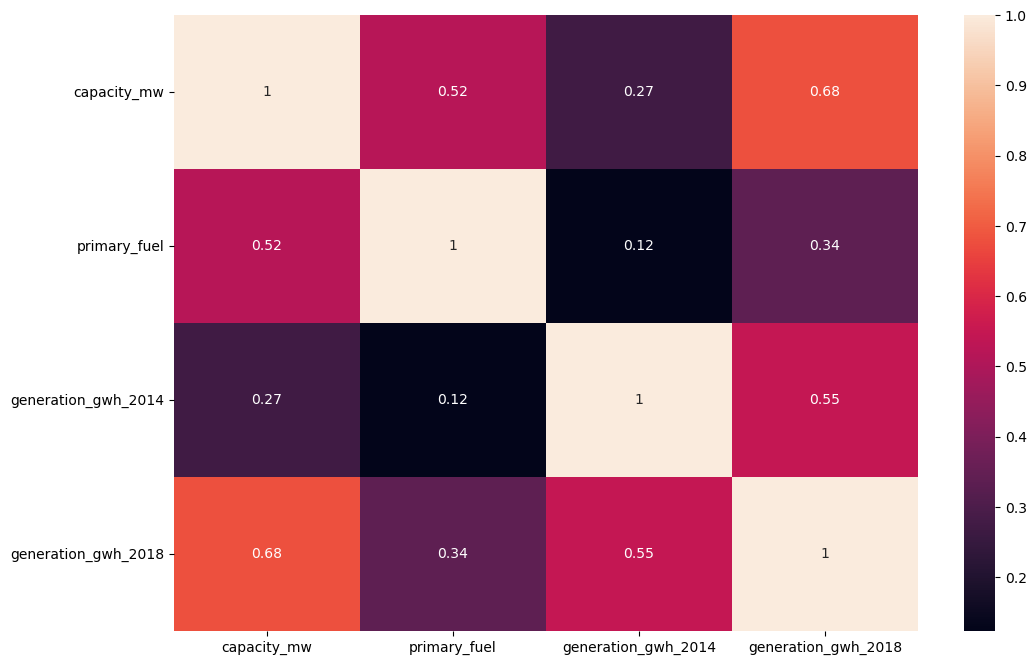

In [54]:
df_corr = df.corr().abs ()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

## Now, Classification, keeping Target=primary_fuel, Features=Rest

### Checking Target values

In [55]:
df["primary_fuel"].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [191]:
df['primary_fuel'].value_counts()

3    250
1    227
6    127
7    123
2     68
0     50
5     20
4      6
Name: primary_fuel, dtype: int64

# 

### Oversampling

In [54]:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
upsample = SMOTE()

In [57]:
x, y = upsample.fit_resample(x,y)

In [58]:
from collections import Counter
count = Counter(y)
print(count)

Counter({6: 250, 1: 250, 7: 250, 2: 250, 3: 250, 0: 250, 5: 250, 4: 250})


# 

### Standardization

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Train-Test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [65]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [66]:
cls_reg.coef_

array([[-1.1557197 ,  0.63028557, -1.11712037],
       [ 1.62872433, -0.30750429,  0.24563139],
       [ 1.94719316, -0.27389051, -0.52750835],
       [-0.37710248, -0.20602891,  0.9537553 ],
       [ 2.78274711, -0.14930665, -0.37546843],
       [ 0.34004937, -0.26515996, -1.59822832],
       [-3.30638206,  0.74337694,  1.53223919],
       [-1.85950973, -0.1717722 ,  0.88669959]])

In [67]:
cls_reg.intercept_

array([-0.03617898,  0.24064219,  0.38604469,  0.64156212, -0.47295306,
        0.10984698, -0.99146493,  0.12250099])

In [68]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.4026666666666667


In [69]:
y_pred = cls_reg.predict(x_test)

In [70]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.394


In [71]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[49,  0,  0,  2,  0,  0,  5,  5],
       [ 4,  9,  2, 11, 26,  4,  2,  3],
       [ 4, 13,  6, 10, 21,  8,  1,  1],
       [10, 16,  4, 17,  6,  3,  8,  4],
       [ 0, 11,  6,  0, 45,  4,  0,  0],
       [12,  0,  3, 12,  0, 29,  0,  0],
       [11,  0,  0, 13,  0,  0, 35,  2],
       [19,  1,  0, 18,  0,  0, 18,  7]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.80      0.58        61
           1       0.18      0.15      0.16        61
           2       0.29      0.09      0.14        64
           3       0.20      0.25      0.23        68
           4       0.46      0.68      0.55        66
           5       0.60      0.52      0.56        56
           6       0.51      0.57      0.54        61
           7       0.32      0.11      0.16        63

    accuracy                           0.39       500
   macro avg       0.38      0.40      0.36       500
weighted avg       0.37      0.39      0.36       500



### Cross-validation

In [73]:
from sklearn.model_selection import KFold, cross_val_score

In [74]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.39      , 0.40666667, 0.39      , 0.38      , 0.41      ])

In [75]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.39533333333333326

In [76]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.42, 0.39, 0.4 , 0.37, 0.42])

In [77]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.4

# 

### Applying BaggingClassifier to LogisticRegression

In [1076]:
from sklearn.ensemble import BaggingClassifier

In [1077]:
bag0 = BaggingClassifier(LogisticRegression())

In [1078]:
bag0.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [1079]:
print('Accuracy Score:',bag0.score(x_train, y_train))

Accuracy Score: 0.40066666666666667


In [1080]:
y_pred = bag0.predict(x_test)

In [1081]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.398


In [1082]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[49,  0,  0,  2,  0,  0,  5,  5],
       [ 5,  8,  2, 11, 27,  4,  1,  3],
       [ 5, 13,  8,  9, 20,  8,  1,  0],
       [10, 16,  5, 17,  5,  3,  8,  4],
       [ 0, 11,  6,  0, 45,  4,  0,  0],
       [12,  0,  3, 12,  0, 29,  0,  0],
       [11,  0,  0, 13,  0,  0, 35,  2],
       [21,  1,  0, 17,  0,  0, 16,  8]], dtype=int64)

In [1083]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.80      0.56        61
           1       0.16      0.13      0.15        61
           2       0.33      0.12      0.18        64
           3       0.21      0.25      0.23        68
           4       0.46      0.68      0.55        66
           5       0.60      0.52      0.56        56
           6       0.53      0.57      0.55        61
           7       0.36      0.13      0.19        63

    accuracy                           0.40       500
   macro avg       0.39      0.40      0.37       500
weighted avg       0.38      0.40      0.37       500



### Cross-validation

In [1089]:
from sklearn.model_selection import KFold, cross_val_score

In [1090]:
cross_val_score (bag0, x_train, y_train, cv=5)

array([0.39333333, 0.40666667, 0.39      , 0.37666667, 0.40666667])

In [1091]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.396

In [1092]:
cross_val_score (bag0, x_test, y_test, cv=5)

array([0.43, 0.39, 0.4 , 0.38, 0.43])

In [1093]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.3886666666666667

# 

### DecisionTreeClassifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [406]:
cls_dt = DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=10,max_depth=10)

In [407]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [408]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.7453333333333333


In [409]:
y_pred = cls_dt.predict(x_test)

In [410]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.676


In [411]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[51,  0,  0,  0,  0,  3,  4,  3],
       [ 6, 31,  6,  4,  8,  1,  4,  1],
       [ 6,  7, 45,  1,  0,  3,  1,  1],
       [ 6,  5, 11, 29,  4,  5,  7,  1],
       [ 0,  4,  4,  2, 55,  1,  0,  0],
       [ 1,  1,  0,  2,  1, 49,  2,  0],
       [ 4,  2,  0,  3,  0,  0, 50,  2],
       [14,  3,  2, 12,  0,  0,  4, 28]], dtype=int64)

In [412]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.84      0.68        61
           1       0.58      0.51      0.54        61
           2       0.66      0.70      0.68        64
           3       0.55      0.43      0.48        68
           4       0.81      0.83      0.82        66
           5       0.79      0.88      0.83        56
           6       0.69      0.82      0.75        61
           7       0.78      0.44      0.57        63

    accuracy                           0.68       500
   macro avg       0.68      0.68      0.67       500
weighted avg       0.68      0.68      0.67       500



### Cross-validation

In [413]:
from sklearn.model_selection import KFold, cross_val_score

In [414]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.60666667, 0.57666667, 0.59666667, 0.6       , 0.61333333])

In [415]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.5940000000000001

In [416]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.54, 0.52, 0.53, 0.5 , 0.53])

In [417]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.524

# 

### Applying BaggingClassifier to DecisionTreeClassifier

In [1094]:
from sklearn.ensemble import BaggingClassifier

In [1095]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=2, min_samples_split=10,max_depth=10))

In [1096]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_leaf=2,
                                                        min_samples_split=10))

In [1097]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.7666666666666667


In [1098]:
y_pred = bag1.predict(x_test)

In [1099]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.688


In [1100]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[49,  1,  0,  0,  0,  4,  3,  4],
       [ 2, 26,  8,  3,  7,  4,  4,  7],
       [ 4,  3, 47,  3,  3,  3,  1,  0],
       [ 4,  6, 11, 27,  4,  5,  6,  5],
       [ 0,  2,  5,  0, 58,  1,  0,  0],
       [ 1,  1,  1,  1,  0, 50,  2,  0],
       [ 5,  1,  0,  2,  0,  0, 52,  1],
       [ 9,  2,  3,  9,  0,  0,  5, 35]], dtype=int64)

In [1101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.73        61
           1       0.62      0.43      0.50        61
           2       0.63      0.73      0.68        64
           3       0.60      0.40      0.48        68
           4       0.81      0.88      0.84        66
           5       0.75      0.89      0.81        56
           6       0.71      0.85      0.78        61
           7       0.67      0.56      0.61        63

    accuracy                           0.69       500
   macro avg       0.68      0.69      0.68       500
weighted avg       0.68      0.69      0.68       500



### Cross-validation

In [1102]:
from sklearn.model_selection import KFold, cross_val_score

In [1103]:
cross_val_score (bag1, x_train, y_train, cv=5)

array([0.64666667, 0.65333333, 0.63333333, 0.62      , 0.61      ])

In [1104]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.6373333333333333

In [1105]:
cross_val_score (bag1, x_test, y_test, cv=5)

array([0.61, 0.55, 0.64, 0.55, 0.61])

In [1106]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.6280000000000001

# 

### Random Forest Classifier

In [418]:
from sklearn.ensemble import RandomForestClassifier

In [419]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 50}

In [543]:
cls_rf = RandomForestClassifier(n_estimators=240,criterion='gini',min_samples_split=3,max_depth=16)

In [544]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=240)

In [545]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.71


In [546]:
y_pred = cls_rf.predict(x_test)

In [547]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.708


In [548]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[48,  0,  0,  2,  0,  3,  3,  5],
       [ 4, 29,  7,  3,  7,  3,  4,  4],
       [ 2,  3, 49,  3,  1,  4,  1,  1],
       [ 5,  5,  7, 34,  5,  4,  8,  0],
       [ 0,  2,  0,  2, 61,  1,  0,  0],
       [ 5,  1,  0,  0,  0, 47,  0,  3],
       [ 4,  3,  0,  1,  0,  0, 52,  1],
       [ 7,  3,  2, 12,  0,  0,  5, 34]], dtype=int64)

In [549]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71        61
           1       0.63      0.48      0.54        61
           2       0.75      0.77      0.76        64
           3       0.60      0.50      0.54        68
           4       0.82      0.92      0.87        66
           5       0.76      0.84      0.80        56
           6       0.71      0.85      0.78        61
           7       0.71      0.54      0.61        63

    accuracy                           0.71       500
   macro avg       0.70      0.71      0.70       500
weighted avg       0.70      0.71      0.70       500



### Cross-validation

In [550]:
from sklearn.model_selection import KFold, cross_val_score

In [551]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.68      , 0.67333333, 0.69333333, 0.65666667, 0.64333333])

In [552]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.6693333333333333

In [553]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.61, 0.63, 0.66, 0.62, 0.61])

In [554]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.6159999999999999

# 

### Applying BaggingClassifier to RandomForestClassifier

In [1107]:
from sklearn.ensemble import BaggingClassifier

In [1108]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=240,criterion='gini',min_samples_split=3,max_depth=16))

In [1109]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=240))

In [1110]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.858


In [1111]:
y_pred = bag2.predict(x_test)

In [1112]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.692


In [1113]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[49,  0,  0,  1,  0,  2,  3,  6],
       [ 4, 29,  7,  3,  7,  3,  4,  4],
       [ 3,  3, 44,  7,  2,  4,  1,  0],
       [ 5,  4, 10, 29,  6,  6,  6,  2],
       [ 0,  4,  1,  2, 58,  1,  0,  0],
       [ 4,  1,  0,  0,  0, 48,  1,  2],
       [ 4,  3,  0,  1,  0,  0, 52,  1],
       [ 7,  3,  3,  8,  0,  1,  4, 37]], dtype=int64)

In [1114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.80      0.72        61
           1       0.62      0.48      0.54        61
           2       0.68      0.69      0.68        64
           3       0.57      0.43      0.49        68
           4       0.79      0.88      0.83        66
           5       0.74      0.86      0.79        56
           6       0.73      0.85      0.79        61
           7       0.71      0.59      0.64        63

    accuracy                           0.69       500
   macro avg       0.69      0.70      0.69       500
weighted avg       0.68      0.69      0.68       500



### Cross-validation

In [1115]:
from sklearn.model_selection import KFold, cross_val_score

In [1116]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.67      , 0.68      , 0.67333333, 0.64666667, 0.63      ])

In [1117]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.6666666666666667

In [1118]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.59, 0.57, 0.68, 0.61, 0.62])

In [1119]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.6566666666666666

# 

### KNeighbors Classifier

In [555]:
from sklearn.neighbors import KNeighborsClassifier

In [556]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [722]:
cls_KN = KNeighborsClassifier(n_neighbors=9, leaf_size=2, p = 1, algorithm='auto', weights = 'distance')

In [723]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=9, p=1, weights='distance')

In [724]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 0.922


In [725]:
y_pred = cls_KN.predict(x_test)

In [726]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.706


In [727]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[50,  1,  0,  1,  0,  1,  2,  6],
       [ 6, 30,  9,  1,  5,  3,  4,  3],
       [ 4,  2, 48,  2,  3,  5,  0,  0],
       [ 6,  5, 10, 31,  7,  4,  3,  2],
       [ 0,  1,  0,  2, 62,  1,  0,  0],
       [ 5,  1,  0,  0,  0, 47,  0,  3],
       [ 5,  2,  0,  2,  0,  0, 52,  0],
       [10,  3,  3,  8,  0,  2,  4, 33]], dtype=int64)

In [728]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68        61
           1       0.67      0.49      0.57        61
           2       0.69      0.75      0.72        64
           3       0.66      0.46      0.54        68
           4       0.81      0.94      0.87        66
           5       0.75      0.84      0.79        56
           6       0.80      0.85      0.83        61
           7       0.70      0.52      0.60        63

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.70       500
weighted avg       0.71      0.71      0.70       500



### Cross-validation

In [729]:
from sklearn.model_selection import KFold, cross_val_score

In [734]:
cross_val_score (cls_KN, x_train, y_train, cv=15)

array([0.73, 0.7 , 0.67, 0.67, 0.69, 0.65, 0.67, 0.72, 0.72, 0.66, 0.64,
       0.63, 0.67, 0.64, 0.66])

In [735]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.6540000000000001

In [736]:
cross_val_score (cls_KN, x_test, y_test, cv=15)

array([0.55882353, 0.61764706, 0.61764706, 0.52941176, 0.70588235,
       0.45454545, 0.75757576, 0.63636364, 0.6969697 , 0.48484848,
       0.54545455, 0.60606061, 0.48484848, 0.57575758, 0.66666667])

In [737]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.586

# 

### Applying BaggingClassifier to KNeighborsClassifier

In [1120]:
from sklearn.ensemble import BaggingClassifier

In [1121]:
bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=9, leaf_size=2, p = 1, algorithm='auto', weights = 'distance'))

In [1122]:
bag3.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=2,
                                                      n_neighbors=9, p=1,
                                                      weights='distance'))

In [1123]:
print('Accuracy Score:',bag3.score(x_train, y_train))

Accuracy Score: 0.9153333333333333


In [1124]:
y_pred = bag3.predict(x_test)

In [1125]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.688


In [1126]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[46,  0,  0,  2,  0,  2,  4,  7],
       [ 5, 27, 11,  1,  5,  4,  4,  4],
       [ 4,  1, 47,  2,  3,  6,  1,  0],
       [ 3,  7,  9, 27,  7,  5,  7,  3],
       [ 0,  1,  0,  1, 63,  1,  0,  0],
       [ 5,  2,  0,  0,  1, 46,  0,  2],
       [ 4,  2,  0,  1,  0,  1, 53,  0],
       [ 9,  4,  3,  6,  0,  2,  4, 35]], dtype=int64)

In [1127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67        61
           1       0.61      0.44      0.51        61
           2       0.67      0.73      0.70        64
           3       0.68      0.40      0.50        68
           4       0.80      0.95      0.87        66
           5       0.69      0.82      0.75        56
           6       0.73      0.87      0.79        61
           7       0.69      0.56      0.61        63

    accuracy                           0.69       500
   macro avg       0.68      0.69      0.68       500
weighted avg       0.68      0.69      0.67       500



### Cross-validation

In [1128]:
from sklearn.model_selection import KFold, cross_val_score

In [1129]:
cross_val_score (bag3, x_train, y_train, cv=5)

array([0.65666667, 0.67      , 0.65333333, 0.67      , 0.62666667])

In [1130]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.6493333333333333

In [1131]:
cross_val_score (bag3, x_test, y_test, cv=5)

array([0.61, 0.57, 0.66, 0.54, 0.63])

In [1132]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.6506666666666666

# 

### Support Vector Classifier

In [738]:
from sklearn.svm import SVC

In [739]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10, 100]}
gridsearch = GridSearchCV(estimator=svc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 100, 'gamma': 100, 'kernel': 'rbf'}

In [944]:
cls_SVC = SVC(kernel='rbf',C=200, gamma=200)

In [945]:
cls_SVC.fit(x_train, y_train)

SVC(C=200, gamma=200)

In [946]:
print('Accuracy Score:',cls_SVC.score(x_train, y_train))

Accuracy Score: 0.8513333333333334


In [947]:
y_pred = cls_SVC.predict(x_test)

In [948]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.668


In [949]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[54,  1,  0,  1,  0,  1,  2,  2],
       [ 7, 25,  4, 15,  4,  2,  1,  3],
       [ 4,  3, 43, 11,  0,  3,  0,  0],
       [ 8, 12,  4, 38,  0,  1,  3,  2],
       [ 0,  2,  0,  6, 57,  1,  0,  0],
       [ 3,  2,  1,  3,  0, 46,  0,  1],
       [ 9,  3,  0,  2,  0,  2, 45,  0],
       [14,  6,  3,  7,  0,  1,  6, 26]], dtype=int64)

In [950]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.89      0.67        61
           1       0.46      0.41      0.43        61
           2       0.78      0.67      0.72        64
           3       0.46      0.56      0.50        68
           4       0.93      0.86      0.90        66
           5       0.81      0.82      0.81        56
           6       0.79      0.74      0.76        61
           7       0.76      0.41      0.54        63

    accuracy                           0.67       500
   macro avg       0.69      0.67      0.67       500
weighted avg       0.69      0.67      0.67       500



### Cross-validation

In [951]:
from sklearn.model_selection import KFold, cross_val_score

In [952]:
cross_val_score (cls_SVC, x_train, y_train, cv=5)

array([0.61666667, 0.65      , 0.63      , 0.59333333, 0.59666667])

In [953]:
cross_val_score (cls_SVC, x_train, y_train, cv=5).mean()

0.6173333333333333

In [954]:
cross_val_score (cls_SVC, x_test, y_test, cv=5)

array([0.51, 0.51, 0.51, 0.54, 0.53])

In [955]:
cross_val_score (cls_SVC, x_test, y_test, cv=5).mean()

0.5200000000000001

# 

### Applying BaggingClassifier to Support Vector Classifier

In [1133]:
from sklearn.ensemble import BaggingClassifier

In [1134]:
bag4 = BaggingClassifier(SVC(kernel='rbf',C=200, gamma=200))

In [1135]:
bag4.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(C=200, gamma=200))

In [1136]:
print('Accuracy Score:',bag4.score(x_train, y_train))

Accuracy Score: 0.8226666666666667


In [1137]:
y_pred = bag4.predict(x_test)

In [1138]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.664


In [1139]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[55,  1,  0,  1,  0,  1,  2,  1],
       [ 7, 37,  3,  2,  6,  2,  1,  3],
       [ 4,  8, 45,  4,  0,  3,  0,  0],
       [ 8, 22,  4, 30,  0,  0,  3,  1],
       [ 0,  7,  0,  2, 56,  1,  0,  0],
       [ 3,  5,  2,  1,  0, 44,  0,  1],
       [ 9,  4,  0,  1,  0,  1, 45,  1],
       [14,  8,  3, 10,  0,  1,  7, 20]], dtype=int64)

In [1140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68        61
           1       0.40      0.61      0.48        61
           2       0.79      0.70      0.74        64
           3       0.59      0.44      0.50        68
           4       0.90      0.85      0.88        66
           5       0.83      0.79      0.81        56
           6       0.78      0.74      0.76        61
           7       0.74      0.32      0.44        63

    accuracy                           0.66       500
   macro avg       0.70      0.67      0.66       500
weighted avg       0.70      0.66      0.66       500



### Cross-validation

In [1141]:
from sklearn.model_selection import KFold, cross_val_score

In [1142]:
cross_val_score (bag4, x_train, y_train, cv=5)

array([0.60666667, 0.63333333, 0.61333333, 0.55666667, 0.62      ])

In [1143]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.6093333333333334

In [1144]:
cross_val_score (bag4, x_test, y_test, cv=5)

array([0.57, 0.53, 0.55, 0.52, 0.51])

In [1145]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.6033333333333334

# 

### GradientBoostingClassifier

In [956]:
from sklearn.ensemble import GradientBoostingClassifier

In [1017]:
cls_gb = GradientBoostingClassifier(n_estimators=17,learning_rate=1,max_depth=3)

In [1018]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=17)

In [1019]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.818


In [1020]:
y_pred = cls_gb.predict(x_test)

In [1021]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.584


In [1022]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[40,  0,  1,  1,  0,  2,  9,  8],
       [ 3, 25,  4,  8,  7,  3,  7,  4],
       [ 1,  4, 42,  8,  2,  3,  1,  3],
       [ 3,  9,  8, 31,  4,  5,  8,  0],
       [ 0, 11,  3,  2, 50,  0,  0,  0],
       [ 6,  1,  4,  0,  1, 43,  0,  1],
       [ 2,  9,  0,  3,  0,  0, 27, 20],
       [ 6,  1,  5, 13,  0,  0,  4, 34]], dtype=int64)

In [1023]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        61
           1       0.42      0.41      0.41        61
           2       0.63      0.66      0.64        64
           3       0.47      0.46      0.46        68
           4       0.78      0.76      0.77        66
           5       0.77      0.77      0.77        56
           6       0.48      0.44      0.46        61
           7       0.49      0.54      0.51        63

    accuracy                           0.58       500
   macro avg       0.59      0.59      0.59       500
weighted avg       0.58      0.58      0.58       500



### Cross-validation

In [1024]:
from sklearn.model_selection import KFold, cross_val_score

In [1025]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.52333333, 0.61666667, 0.52333333, 0.6       , 0.36      ])

In [1026]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.522

In [1027]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.61, 0.49, 0.48, 0.52, 0.52])

In [1028]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.5053333333333333

# 

### Applying BaggingClassifier to GradientBoostingClassifier

In [1146]:
from sklearn.ensemble import BaggingClassifier

In [1147]:
bag5 = BaggingClassifier(GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=3))

In [1148]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            n_estimators=50))

In [1149]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.8533333333333334


In [1150]:
y_pred = bag5.predict(x_test)

In [1151]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.65


In [1152]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[40,  0,  1,  3,  0,  3,  6,  8],
       [ 3, 35,  5,  5,  2,  4,  3,  4],
       [ 2,  4, 45,  8,  0,  3,  0,  2],
       [ 2,  9,  5, 32,  5,  4,  5,  6],
       [ 0,  7,  2,  2, 54,  1,  0,  0],
       [ 4,  1,  3,  0,  0, 46,  0,  2],
       [ 2,  0,  1,  1,  0,  2, 38, 17],
       [ 5,  3,  4, 12,  0,  1,  3, 35]], dtype=int64)

In [1153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67        61
           1       0.59      0.57      0.58        61
           2       0.68      0.70      0.69        64
           3       0.51      0.47      0.49        68
           4       0.89      0.82      0.85        66
           5       0.72      0.82      0.77        56
           6       0.69      0.62      0.66        61
           7       0.47      0.56      0.51        63

    accuracy                           0.65       500
   macro avg       0.66      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



### Cross-validation

In [1154]:
from sklearn.model_selection import KFold, cross_val_score

In [1157]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.61666667, 0.63      , 0.64666667, 0.63666667, 0.56666667])

In [1158]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.6106666666666667

In [1159]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.62, 0.6 , 0.53, 0.6 , 0.58])

In [1160]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.5940000000000001

# 

### GaussianNB

In [1161]:
from sklearn.naive_bayes import GaussianNB

In [1162]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [1163]:
gnb = GaussianNB(var_smoothing=1e-09)

In [1164]:
gnb.fit(x_train, y_train)

GaussianNB()

In [1165]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.43266666666666664


In [1166]:
y_pred = gnb.predict(x_test)

In [1167]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.452


In [1168]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[54,  0,  0,  0,  0,  3,  0,  4],
       [ 6, 17,  3,  9, 16,  7,  0,  3],
       [ 5,  3,  8, 11, 28,  7,  0,  2],
       [15,  1,  0, 15, 19,  3,  4, 11],
       [ 0,  0,  3,  0, 57,  6,  0,  0],
       [12,  0,  1,  1,  0, 28,  0, 14],
       [14,  0,  0, 11,  0,  0, 32,  4],
       [21,  0,  0,  8,  0,  3, 16, 15]], dtype=int64)

In [1169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.89      0.57        61
           1       0.81      0.28      0.41        61
           2       0.53      0.12      0.20        64
           3       0.27      0.22      0.24        68
           4       0.47      0.86      0.61        66
           5       0.49      0.50      0.50        56
           6       0.62      0.52      0.57        61
           7       0.28      0.24      0.26        63

    accuracy                           0.45       500
   macro avg       0.49      0.45      0.42       500
weighted avg       0.48      0.45      0.42       500



### Cross-validation

In [1184]:
from sklearn.model_selection import KFold, cross_val_score

In [1185]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.43      , 0.44333333, 0.41333333, 0.41      , 0.43666667])

In [1186]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.42666666666666664

In [1187]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.43, 0.4 , 0.41, 0.38, 0.42])

In [1188]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.42666666666666664

# 

### Applying BaggingClassifier to GaussianNB

In [1170]:
from sklearn.ensemble import BaggingClassifier

In [1171]:
bag6 = BaggingClassifier(GaussianNB(var_smoothing=1e-09))

In [1172]:
bag6.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [1173]:
print('Accuracy Score:',bag6.score(x_train, y_train))

Accuracy Score: 0.42933333333333334


In [1174]:
y_pred = bag6.predict(x_test)

In [1175]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.45


In [1176]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[54,  0,  0,  0,  0,  3,  0,  4],
       [ 6, 17,  3,  9, 16,  7,  0,  3],
       [ 5,  3,  8, 11, 28,  7,  0,  2],
       [15,  1,  0, 17, 19,  5,  4,  7],
       [ 0,  0,  4,  0, 56,  6,  0,  0],
       [12,  0,  1,  6,  0, 28,  0,  9],
       [14,  0,  0, 11,  0,  0, 32,  4],
       [21,  0,  0, 10,  0,  3, 16, 13]], dtype=int64)

In [1177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.89      0.57        61
           1       0.81      0.28      0.41        61
           2       0.50      0.12      0.20        64
           3       0.27      0.25      0.26        68
           4       0.47      0.85      0.61        66
           5       0.47      0.50      0.49        56
           6       0.62      0.52      0.57        61
           7       0.31      0.21      0.25        63

    accuracy                           0.45       500
   macro avg       0.48      0.45      0.42       500
weighted avg       0.48      0.45      0.42       500



### Cross-validation

In [1178]:
from sklearn.model_selection import KFold, cross_val_score

In [1180]:
cross_val_score (bag6, x_train, y_train, cv=5)

array([0.43      , 0.43333333, 0.41333333, 0.41333333, 0.43666667])

In [1181]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.42333333333333334

In [1182]:
cross_val_score (bag6, x_test, y_test, cv=5)

array([0.42, 0.41, 0.41, 0.39, 0.41])

In [1183]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.4246666666666667

# 

### Best Model

### Random Forest Classifier

In [418]:
from sklearn.ensemble import RandomForestClassifier

In [419]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 50}

In [543]:
cls_rf = RandomForestClassifier(n_estimators=240,criterion='gini',min_samples_split=3,max_depth=16)

In [544]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=3, n_estimators=240)

In [545]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.71


In [546]:
y_pred = cls_rf.predict(x_test)

In [547]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.708


In [548]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[48,  0,  0,  2,  0,  3,  3,  5],
       [ 4, 29,  7,  3,  7,  3,  4,  4],
       [ 2,  3, 49,  3,  1,  4,  1,  1],
       [ 5,  5,  7, 34,  5,  4,  8,  0],
       [ 0,  2,  0,  2, 61,  1,  0,  0],
       [ 5,  1,  0,  0,  0, 47,  0,  3],
       [ 4,  3,  0,  1,  0,  0, 52,  1],
       [ 7,  3,  2, 12,  0,  0,  5, 34]], dtype=int64)

In [549]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71        61
           1       0.63      0.48      0.54        61
           2       0.75      0.77      0.76        64
           3       0.60      0.50      0.54        68
           4       0.82      0.92      0.87        66
           5       0.76      0.84      0.80        56
           6       0.71      0.85      0.78        61
           7       0.71      0.54      0.61        63

    accuracy                           0.71       500
   macro avg       0.70      0.71      0.70       500
weighted avg       0.70      0.71      0.70       500



##### Since the accuracy of testing data is High, & difference between the score of training & testing data is also very less, I choose this model

# 

### Saving the Best Model

In [1]:
import pickle

In [3]:
with open('model_rf', 'wb') as f: 
    pickle.dump(cls_rf , f)

# 

# 

# 

## Now, Regression, keeping Target=capacity_mw, Features=Rest

### Separating Features & Target

In [56]:
x = df.drop(columns=['capacity_mw'],axis=1)
y = df.capacity_mw

# 

### Importing important Metrices

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# 

### Standardization

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

### Test - Train Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=105)

# 

### Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [199]:
reg.fit(x_train, y_train)

LinearRegression()

In [200]:
reg.coef_

array([-0.61901771, -0.14940017,  0.97839195])

In [201]:
reg.intercept_

4.234299567443595

In [202]:
print('Accuracy Score:',reg.score(x_train, y_train))

Accuracy Score: 0.5292618563431901


In [203]:
y_pred = reg.predict(x_test)

In [204]:
r2_score(y_test, y_pred)

0.624381557898637

In [205]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 1.2719459633607832
RMSE 1.1278058181091208
MAE 0.9245730787364165


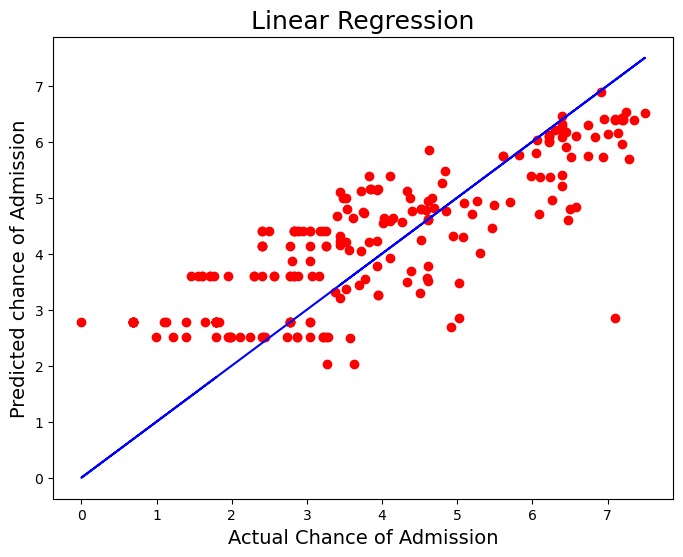

In [206]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Linear Regression', fontsize=18) 
#plt.savefig('lr.png')
plt.show()

### Cross-validation for LinearRegression

In [207]:
from sklearn.model_selection import cross_val_score

In [208]:
cv_score=cross_val_score (reg, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [209]:
cv_score

array([0.52779267, 0.63940263, 0.56478027, 0.48098275, 0.4920329 ,
       0.6148335 , 0.42577464, 0.19217044, 0.64075943, 0.47564144])

In [210]:
cv_mean

0.5054170672082515

In [211]:
cv_score=cross_val_score (reg, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [212]:
cv_score

array([0.38531301, 0.73792976, 0.65091293, 0.90530056, 0.72255029,
       0.78166172, 0.55827097, 0.60899261, 0.7202453 , 0.90495894])

In [213]:
cv_mean

0.6976136078233106

# 

### DecisionTreeRegressor

In [214]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
dr = DecisionTreeRegressor()
param_grid = {'criterion': ['mse', 'mae', "gini", "entropy", "log_loss"],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(2, 10, 2),
              'min_samples_leaf': range(1,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'splitter': 'best'}

In [109]:
dec = DecisionTreeRegressor(criterion='mse', splitter='best', max_features=None, min_samples_leaf= 1, min_samples_split=5,max_depth=11)

In [110]:
dec.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=11, min_samples_split=5)

In [111]:
print('Accuracy Score:',dec.score(x_train, y_train))

Accuracy Score: 0.936656882728971


In [112]:
y_pred = dec.predict(x_test)

In [113]:
r2_score(y_test, y_pred)

0.8479204598061267

In [114]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.5149825875886066
RMSE 0.7176228728159426
MAE 0.4952438570242156


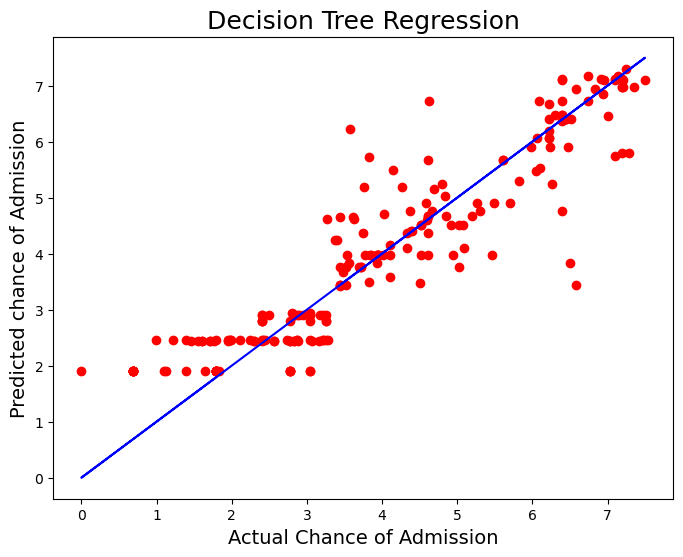

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Decision Tree Regression', fontsize=18) 
#plt.savefig('dt.png')
plt.show()

### Cross-validation for DecisionTreeRegressor

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
cv_score=cross_val_score (dec, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [118]:
cv_score

array([0.83697391, 0.88846449, 0.83649779, 0.86725282, 0.88766044,
       0.79503317, 0.87874305, 0.79218756, 0.89288629, 0.89921646])

In [119]:
cv_mean

0.85749159735227

In [120]:
cv_score=cross_val_score (dec, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [121]:
cv_score

array([0.6209555 , 0.76067559, 0.89704799, 0.96676026, 0.80742708,
       0.92088986, 0.88157291, 0.82831226, 0.80361017, 0.92962629])

In [122]:
cv_mean

0.841687791933035

# 

### RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rf = RandomForestRegressor()
param_grid = {'n_estimators': range(5,250,5),
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [82]:
rf = RandomForestRegressor(n_estimators=35, max_features= 'log2' ,min_samples_split=7,max_depth=18, max_leaf_nodes=300)

In [83]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, max_features='log2', max_leaf_nodes=300,
                      min_samples_split=7, n_estimators=35)

In [84]:
print('Accuracy Score:',rf.score(x_train, y_train))

Accuracy Score: 0.9257397785184497


In [85]:
y_pred = rf.predict(x_test)

In [86]:
r2_score(y_test, y_pred)

0.8850808770184901

In [87]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.3891473319881556
RMSE 0.6238167455175884
MAE 0.4521689916890051


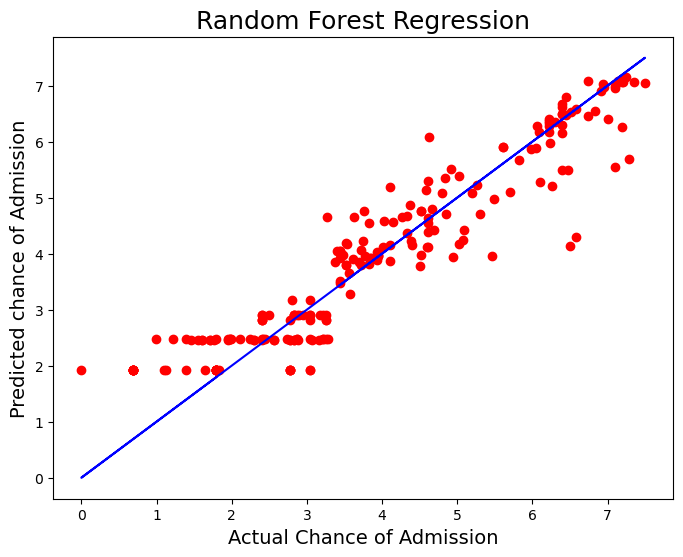

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Random Forest Regression', fontsize=18) 
#plt.savefig('dt.png')
plt.show()

### Cross-validation for Random Forest Regression

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
cv_score=cross_val_score (rf, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [91]:
cv_score

array([0.87831332, 0.89743629, 0.91061693, 0.88154851, 0.87630245,
       0.85766724, 0.89594411, 0.83913679, 0.88496548, 0.89494255])

In [92]:
cv_mean

0.8816873676672623

In [99]:
cv_score=cross_val_score (rf, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [100]:
cv_score

array([0.77244713, 0.81320707, 0.8500685 , 0.96560649, 0.86222551,
       0.88127745, 0.89636115, 0.86180077, 0.86331985, 0.91748361])

In [101]:
cv_mean

0.8683797521185956

# 

### KNeighborsRegressor

In [102]:
from sklearn.neighbors import KNeighborsRegressor

In [216]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'algorithm': ['kd_tree', 'brute'],
               'leaf_size': [3,5,6,7,8],
               'n_neighbors': [3,5,7,9,11,13]
              }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 5}

In [103]:
reg_KN = KNeighborsRegressor(n_neighbors=2, leaf_size=1, p = 1)

In [104]:
reg_KN.fit(x_train, y_train)

KNeighborsRegressor(leaf_size=1, n_neighbors=2, p=1)

In [105]:
print('Accuracy Score:',reg_KN.score(x_train, y_train))

Accuracy Score: 0.9113448491373027


In [106]:
y_pred = reg_KN.predict(x_test)

In [107]:
r2_score(y_test, y_pred)

0.8343822099611033

In [130]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.3823599868875992
RMSE 0.6183526395897403
MAE 0.4481282967824354


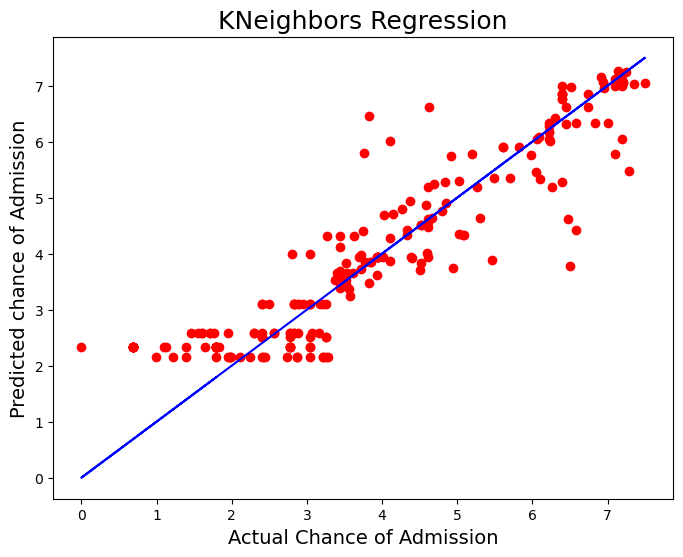

In [222]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('KNeighbors Regression', fontsize=18) 
#plt.savefig('dt.png')
plt.show()

### Cross-validation for KNeighborsRegressor

In [113]:
from sklearn.model_selection import cross_val_score

In [117]:
cv_score=cross_val_score (reg_KN, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [118]:
cv_score

array([0.84587266, 0.87109666, 0.88366196, 0.84648688, 0.85572652,
       0.86865794, 0.86527035, 0.75586153, 0.85587268, 0.83027578])

In [119]:
cv_mean

0.847878297039397

In [123]:
cv_score=cross_val_score (reg_KN, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [124]:
cv_score

array([0.62898062, 0.73450111, 0.75890544, 0.94655051, 0.74306851,
       0.84925842, 0.89456655, 0.79442839, 0.67045355, 0.81651789])

In [125]:
cv_mean

0.7837230981736459

# 

### SVR

In [126]:
from sklearn.svm import SVR

In [224]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','sigmoid']}
gridsearch = GridSearchCV(estimator=svr, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [127]:
svr = SVR(kernel='rbf',C=100, gamma=2)

In [128]:
svr.fit(x_train, y_train)

SVR(C=100, gamma=2)

In [129]:
y_pred = svr.predict(x_test)

In [130]:
print('Accuracy Score:',svr.score(x_train, y_train))

Accuracy Score: 0.9259225177972621


In [131]:
r2_score(y_test, y_pred)

0.8464641358551455

In [132]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.5199140956381938
RMSE 0.7210506886746547
MAE 0.5022097144755607


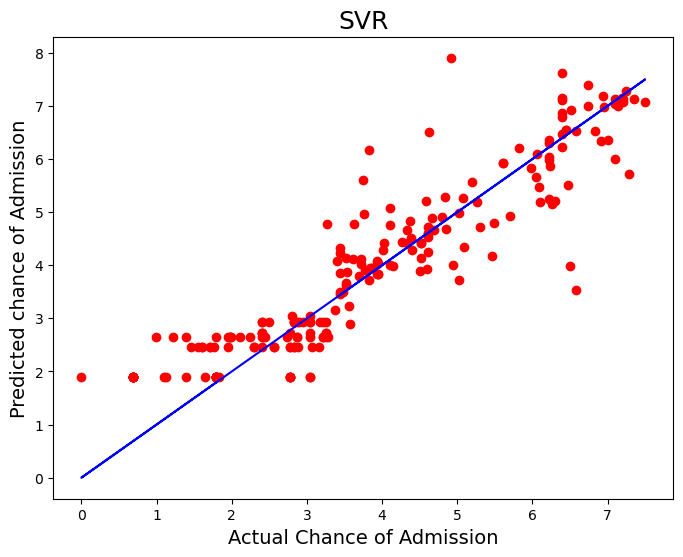

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('SVR', fontsize=18) 
#plt.savefig('svc.png')
plt.show()

### Cross-validation for SVR

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
cv_score=cross_val_score (svr, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [136]:
cv_score

array([0.86045796, 0.87080702, 0.91279653, 0.85168627, 0.88096645,
       0.85615805, 0.84624873, 0.6483526 , 0.83345179, 0.88485004])

In [137]:
cv_mean

0.8445775442076753

In [138]:
cv_score=cross_val_score (svr, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [139]:
cv_score

array([0.71327292, 0.61070839, 0.83806669, 0.90750045, 0.79807973,
       0.78467989, 0.90306453, 0.85952244, 0.78203711, 0.91577906])

In [140]:
cv_mean

0.8112711202336543

# 

### XGB

In [242]:
import xgboost as xgb
xgb = xgb.XGBRegressor(max_depth=10,learning_rate=0.1,n_estimators=165,colsample_bytree=1)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=165, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [243]:
y_pred = xgb.predict(x_test)

In [244]:
print('Accuracy Score:',xgb.score(x_train, y_train))

Accuracy Score: 0.9484739910033756


In [245]:
r2_score(y_test, y_pred)

0.8760031475879342

In [246]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.4198869869451431
RMSE 0.6479868725098858
MAE 0.45095985548225237


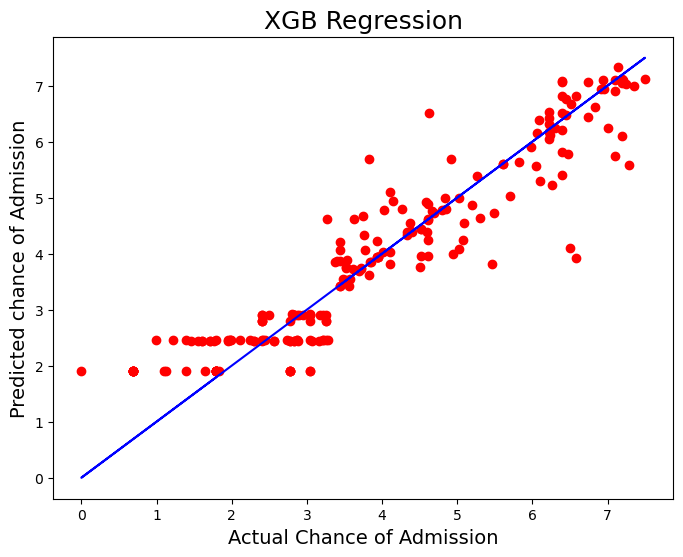

In [247]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('XGB Regression', fontsize=18) 
#plt.savefig('xgb.png')
plt.show()

### Cross-validation for XGB Regression

In [248]:
from sklearn.model_selection import cross_val_score

In [249]:
cv_score=cross_val_score (xgb, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [250]:
cv_score

array([0.86625663, 0.89431605, 0.91613259, 0.88030359, 0.88639846,
       0.86387789, 0.88484257, 0.83069347, 0.87058973, 0.88141655])

In [251]:
cv_mean

0.87748275444375

In [252]:
cv_score=cross_val_score (xgb, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [253]:
cv_score

array([0.73378341, 0.80665642, 0.82702141, 0.96952371, 0.89104572,
       0.89853175, 0.83201754, 0.86828602, 0.82842559, 0.92289603])

In [254]:
cv_mean

0.8578187584607623

# 

### GradientBoostingRegressor

In [255]:
from sklearn.ensemble import GradientBoostingRegressor

In [256]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
param_grid = {'n_estimators': range(50, 250, 10),
              'learning_rate': [0.05, 0.1,0.15],
              'max_depth': range(3, 6),
              'min_samples_split': range(2, 5)}
gridsearch = GridSearchCV(estimator=gb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 3,
 'n_estimators': 50}

In [258]:
gbt = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=7, min_samples_split=4)

In [259]:
gbt.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=7, min_samples_split=4, n_estimators=300)

In [260]:
y_pred = gbt.predict(x_test)

In [261]:
print('Accuracy Score:',gbt.score(x_train, y_train))

Accuracy Score: 0.948526593912783


In [262]:
r2_score(y_test, y_pred)

0.8591005524099996

In [263]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.477123760482193
RMSE 0.6907414570461172
MAE 0.4720668384183497


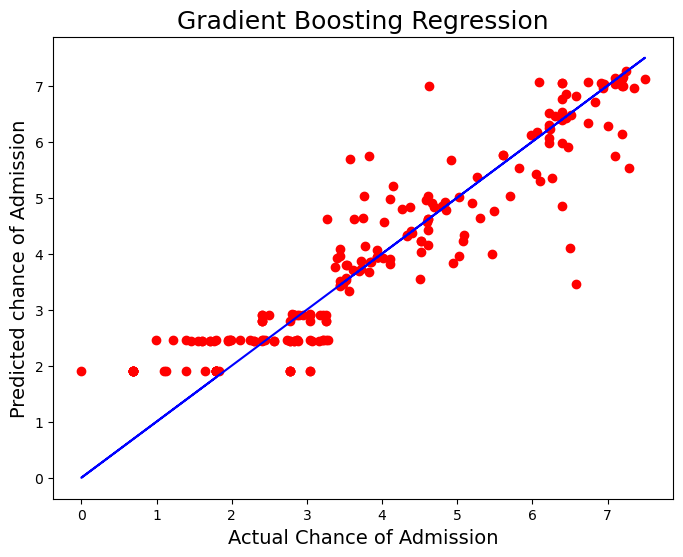

In [264]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Gradient Boosting Regression', fontsize=18) 
#plt.savefig('gb.png')
plt.show()

### Cross-validation for Gradient Boosting Regression

In [265]:
from sklearn.model_selection import cross_val_score

In [266]:
cv_score=cross_val_score (gbt, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [267]:
cv_score

array([0.82637974, 0.89249332, 0.92755907, 0.86617807, 0.87655399,
       0.83460163, 0.8858577 , 0.84410632, 0.8955849 , 0.89321143])

In [268]:
cv_mean

0.8742526171217551

In [269]:
cv_score=cross_val_score (gbt, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [270]:
cv_score

array([0.6410964 , 0.81337336, 0.87970152, 0.95242612, 0.86182883,
       0.90528578, 0.87119401, 0.78869902, 0.84438934, 0.92901173])

In [271]:
cv_mean

0.8487006099212628

# 

### Lasso Regression

In [272]:
from sklearn.linear_model import Lasso, LassoCV

In [288]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)   
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [289]:
alpha = lasscv.alpha_
alpha

0.0004351440899867493

In [290]:
reg_lasso = Lasso(alpha)     
reg_lasso.fit(x_train, y_train)

Lasso(alpha=0.0004351440899867493)

In [291]:
y_pred = reg_lasso.predict(x_test)

In [292]:
print('Accuracy Score:',reg_lasso.score(x_train, y_train))

Accuracy Score: 0.5292615656451403


In [293]:
r2_score(y_test, y_pred)

0.6242451674475515

In [294]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 1.2724078184356529
RMSE 1.1280105577678132
MAE 0.9247630853548604


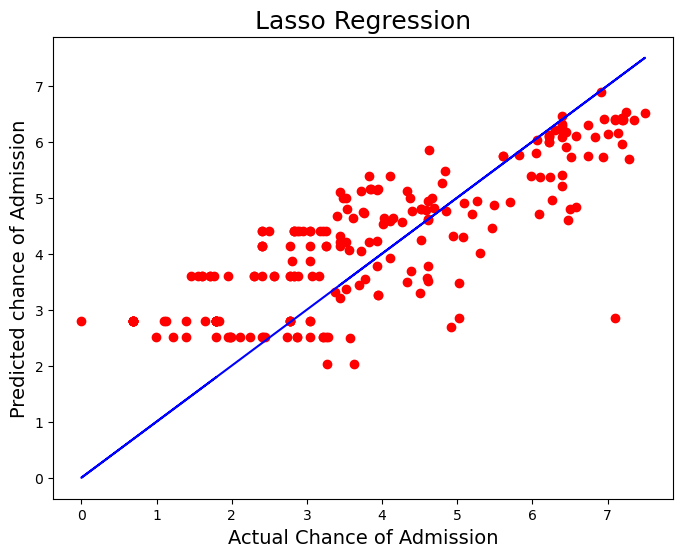

In [295]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Lasso Regression', fontsize=18) 
#plt.savefig('gb.png')
plt.show()

### Cross-validation for Lasso Regression

In [296]:
from sklearn.model_selection import cross_val_score

In [297]:
cv_score=cross_val_score (reg_lasso, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [298]:
cv_score

array([0.52791172, 0.6392341 , 0.56469473, 0.48111596, 0.49188602,
       0.61469589, 0.42578799, 0.19265914, 0.64062737, 0.47569302])

In [299]:
cv_mean

0.5054305947795997

In [300]:
cv_score=cross_val_score (reg_lasso, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [301]:
cv_score

array([0.38486224, 0.73803014, 0.65066988, 0.90531557, 0.72228945,
       0.78204677, 0.55863772, 0.60904073, 0.72017891, 0.90498824])

In [302]:
cv_mean

0.6976059654745643

# 

### Ridge Regression

In [316]:
from sklearn.linear_model import Ridge, RidgeCV

In [317]:
ridgecv = RidgeCV(alphas = np.arange(1,100,5), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
        normalize=True)

In [318]:
alpha = ridgecv.alpha_
alpha

1

In [319]:
reg_rid = Ridge(alpha=ridgecv.alpha_) 
reg_rid.fit(x_train, y_train)

Ridge(alpha=1)

In [320]:
y_pred = reg_rid.predict(x_test)

In [321]:
print('Accuracy Score:',reg_rid.score(x_train, y_train))

Accuracy Score: 0.5292605971873243


In [322]:
r2_score(y_test, y_pred)

0.6239976073487299

In [323]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 1.2732461241019661
RMSE 1.128382082497753
MAE 0.9252228663001278


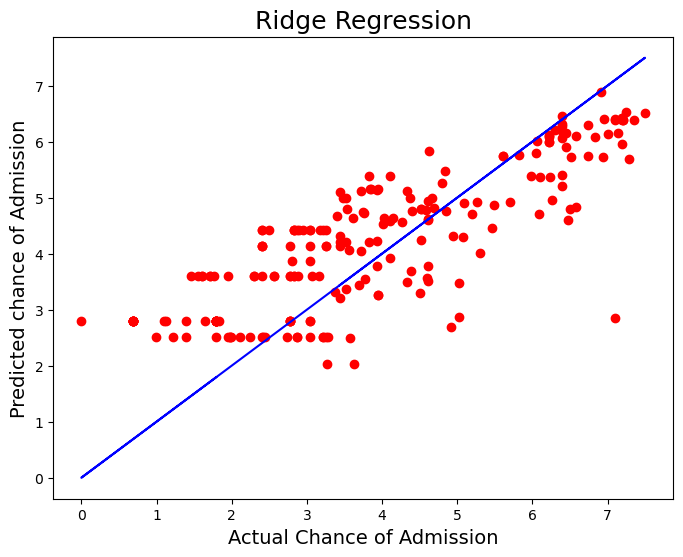

In [324]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Ridge Regression', fontsize=18) 
#plt.savefig('gb.png')
plt.show()

### Cross-validation for Ridge Regression

In [325]:
from sklearn.model_selection import cross_val_score

In [326]:
cv_score=cross_val_score (reg_rid, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [327]:
cv_score

array([0.52799638, 0.6389775 , 0.56463897, 0.48118653, 0.4918328 ,
       0.61451353, 0.42598275, 0.19342259, 0.64054641, 0.4757046 ])

In [328]:
cv_mean

0.5054802057007842

In [329]:
cv_score=cross_val_score (reg_rid, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [330]:
cv_score

array([0.38325184, 0.73710977, 0.64832693, 0.90433807, 0.71901631,
       0.78494876, 0.56436595, 0.61130531, 0.71946048, 0.90465292])

In [331]:
cv_mean

0.6976776342669603

# 

### Best Model

### RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rf = RandomForestRegressor()
param_grid = {'n_estimators': range(5,250,5),
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [82]:
rf = RandomForestRegressor(n_estimators=35, max_features= 'log2' ,min_samples_split=7,max_depth=18, max_leaf_nodes=300)

In [83]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, max_features='log2', max_leaf_nodes=300,
                      min_samples_split=7, n_estimators=35)

In [84]:
print('Accuracy Score:',rf.score(x_train, y_train))

Accuracy Score: 0.9257397785184497


In [85]:
y_pred = rf.predict(x_test)

In [86]:
r2_score(y_test, y_pred)

0.8850808770184901

In [87]:
mse = mean_squared_error(y_test, y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE',mae)

MSE 0.3891473319881556
RMSE 0.6238167455175884
MAE 0.4521689916890051


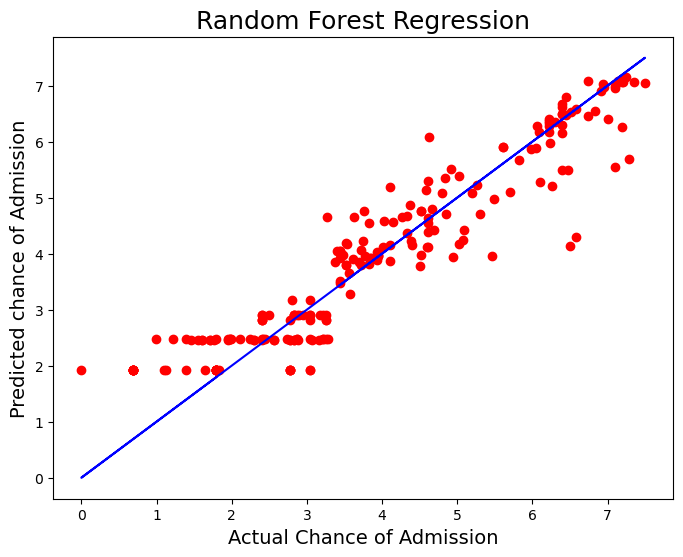

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter (x=y_test, y=y_pred, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Chance of Admission', fontsize=14)
plt.ylabel('Predicted chance of Admission', fontsize=14)
plt.title('Random Forest Regression', fontsize=18) 
#plt.savefig('dt.png')
plt.show()

### Cross-validation for Random Forest Regression

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
cv_score=cross_val_score (rf, x_train, y_train, cv=10)
cv_mean=cv_score.mean()

In [91]:
cv_score

array([0.87831332, 0.89743629, 0.91061693, 0.88154851, 0.87630245,
       0.85766724, 0.89594411, 0.83913679, 0.88496548, 0.89494255])

In [92]:
cv_mean

0.8816873676672623

In [99]:
cv_score=cross_val_score (rf, x_test, y_test, cv=10)
cv_mean=cv_score.mean()

In [100]:
cv_score

array([0.77244713, 0.81320707, 0.8500685 , 0.96560649, 0.86222551,
       0.88127745, 0.89636115, 0.86180077, 0.86331985, 0.91748361])

In [101]:
cv_mean

0.8683797521185956

##### Reasons for choosing this model:-
##### 1) Has highest accuracy for Testing data
##### 2) Difference between accuracy of Training & Testing data is very less
##### 3) Most stable model
##### 4) Has highest accuracy for Testing data during Cross-validation
##### 5) Difference between accuracy of Training & Testing data is very less, during Cross-validation

# 

### Saving the Best Model

In [141]:
import pickle

In [142]:
with open('model_rf', 'wb') as f: 
    pickle.dump(rf, f)

# 

# 

# 

# 

# 

# Census Income

In [1481]:
import warnings
warnings.filterwarnings ('ignore')

### Import Data from Website

In [1482]:
import pandas as pd
import numpy as np

In [1483]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [1484]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

# 

### EDA

In [1485]:
df.shape

(32560, 15)

In [1486]:
df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

In [1487]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [1488]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Age
Unique Values: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Column: Workclass
Unique Values: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Column: Fnlwgt
Unique Values: [ 83311 215646 234721 ...  34066  84661 257302]


Column: Education
Unique Values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Column: Education_num
Unique Values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Column: Marital_status
Unique Values: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


Column: Occupation
Unique Valu

##### Dropping columns that have only single values or irrelevent data

In [1489]:
df.drop(['Fnlwgt'], axis=1,inplace=True)

In [1490]:
df.head()

Age          Workclass   Education  Education_num       Marital_status  \
0   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
1   38            Private     HS-grad              9             Divorced   
2   53            Private        11th              7   Married-civ-spouse   
3   28            Private   Bachelors             13   Married-civ-spouse   
4   37            Private     Masters             14   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital_gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   Capital_loss  Hours_per_week  Native_country  Income  
0             0              13   United-States   <=50K  
1             0              40   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40            Cuba   <=50K  
4             0              40   United-States   <=50K

In [1491]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [1492]:
df.isnull().sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [1493]:
df.nunique()

Age                73
Workclass           9
Education          16
Education_num      16
Marital_status      7
Occupation         15
Relationship        6
Race                5
Sex                 2
Capital_gain      119
Capital_loss       92
Hours_per_week     94
Native_country     42
Income              2
dtype: int64

In [1494]:
df.dtypes

Age                int64
Workclass         object
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# 

### Encoding

In [1495]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [1496]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [1497]:
df['Workclass']=df['Workclass'].replace(' ?', np.nan)

##### '?' are null values, hence replaced with Nan values

In [1498]:
df['Workclass'].isnull().sum()

1836

In [1499]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [1500]:
df[['Workclass']]=mode_imp.fit_transform(df[['Workclass']])

In [1501]:
df['Workclass'].value_counts()

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

###### The Null values was less than 10% of the Mode data, hence it was replaced with Mode data

In [1502]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [1503]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1504]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [1505]:
df.Workclass = le.fit_transform(df.Workclass)
df.Education = le.fit_transform(df.Education)
df.Marital_status = le.fit_transform(df.Marital_status)
df.Occupation = le.fit_transform(df.Occupation)
df.Relationship = le.fit_transform(df.Relationship)
df.Race = le.fit_transform(df.Race)
df.Sex = le.fit_transform(df.Sex)
df.Native_country = le.fit_transform(df.Native_country)

df.head()

Age  Workclass  Education  Education_num  Marital_status  Occupation  \
0   50          5          9             13               2           4   
1   38          3         11              9               0           6   
2   53          3          1              7               2           6   
3   28          3          9             13               2          10   
4   37          3         12             14               2           4   

   Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0             0     4    1             0             0              13   
1             1     4    1             0             0              40   
2             0     2    1             0             0              40   
3             5     2    0             0             0              40   
4             5     4    0             0             0              40   

   Native_country  Income  
0              39   <=50K  
1              39   <=50K  
2              39   <=50K  
3               5   <=50K  
4              39   <=50K

In [1506]:
df['Workclass'].value_counts()

3    24509
5     2540
1     2093
6     1297
4     1116
0      960
7       14
2        7
Name: Workclass, dtype: int64

In [1507]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [1508]:
df['Income']=df['Income'].replace(' <=50K', 1)
df['Income']=df['Income'].replace(' >50K', 0)

In [1509]:
df['Income'].value_counts()

1    24697
0     7839
Name: Income, dtype: int64

In [1510]:
df.dtypes

Age               int64
Workclass         int32
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int64
dtype: object

In [1511]:
df.head()

Age  Workclass  Education  Education_num  Marital_status  Occupation  \
0   50          5          9             13               2           4   
1   38          3         11              9               0           6   
2   53          3          1              7               2           6   
3   28          3          9             13               2          10   
4   37          3         12             14               2           4   

   Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0             0     4    1             0             0              13   
1             1     4    1             0             0              40   
2             0     2    1             0             0              40   
3             5     2    0             0             0              40   
4             5     4    0             0             0              40   

   Native_country  Income  
0              39       1  
1              39       1  
2              39       1  
3               5       1  
4              39       1

# 

### Checking Contribution Score

In [1512]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [1513]:
df.shape

(32536, 14)

In [1514]:
from sklearn.feature_selection import SelectKBest, f_classif

In [1515]:
x = df.drop(columns = ['Income'])
y = df['Income']

In [1516]:
best_features = SelectKBest(score_func=f_classif, k=13)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(13, 'Score'))

      Feature_Name        Score
3    Education_num  4120.959861
6     Relationship  2186.644675
0              Age  1885.286977
11  Hours_per_week  1811.486632
9     Capital_gain  1708.021444
8              Sex  1591.944711
4   Marital_status  1344.129315
10    Capital_loss   753.959104
2        Education   206.203986
5       Occupation   186.010145
7             Race   168.848540
12  Native_country     7.943124
1        Workclass     0.245588


In [1517]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [1518]:
df = df.drop(columns=['Workclass','Native_country','Race','Occupation','Education'])
df.head()

Age  Education_num  Marital_status  Relationship  Sex  Capital_gain  \
0   50             13               2             0    1             0   
1   38              9               0             1    1             0   
2   53              7               2             0    1             0   
3   28             13               2             5    0             0   
4   37             14               2             5    0             0   

   Capital_loss  Hours_per_week  Income  
0             0              13       1  
1             0              40       1  
2             0              40       1  
3             0              40       1  
4             0              40       1

##### Features with very less negligible contribution is removed

# 

### Checking Multi-colinearity

In [1519]:
corr = df.corr()
corr

Age  Education_num  Marital_status  Relationship  \
Age             1.000000       0.036224       -0.266142     -0.263744   
Education_num   0.036224       1.000000       -0.069196     -0.094424   
Marital_status -0.266142      -0.069196        1.000000      0.185542   
Relationship   -0.263744      -0.094424        0.185542      1.000000   
Sex             0.088708       0.012181       -0.129425     -0.582593   
Capital_gain    0.077676       0.122661       -0.043373     -0.057945   
Capital_loss    0.057745       0.079901       -0.034134     -0.061100   
Hours_per_week  0.068515       0.148426       -0.190433     -0.248876   
Income         -0.234039      -0.335299        0.199187      0.250955   

                     Sex  Capital_gain  Capital_loss  Hours_per_week    Income  
Age             0.088708      0.077676      0.057745        0.068515 -0.234039  
Education_num   0.012181      0.122661      0.079901        0.148426 -0.335299  
Marital_status -0.129425     -0.043373     -0.034134       -0.190433  0.199187  
Relationship   -0.582593     -0.057945     -0.061100       -0.248876  0.250955  
Sex             1.000000      0.048486      0.045576        0.229190 -0.215984  
Capital_gain    0.048486      1.000000     -0.031638        0.078408 -0.223340  
Capital_loss    0.045576     -0.031638      1.000000        0.054229 -0.150498  
Hours_per_week  0.229190      0.078408      0.054229        1.000000 -0.229659  
Income         -0.215984     -0.223340     -0.150498       -0.229659  1.000000

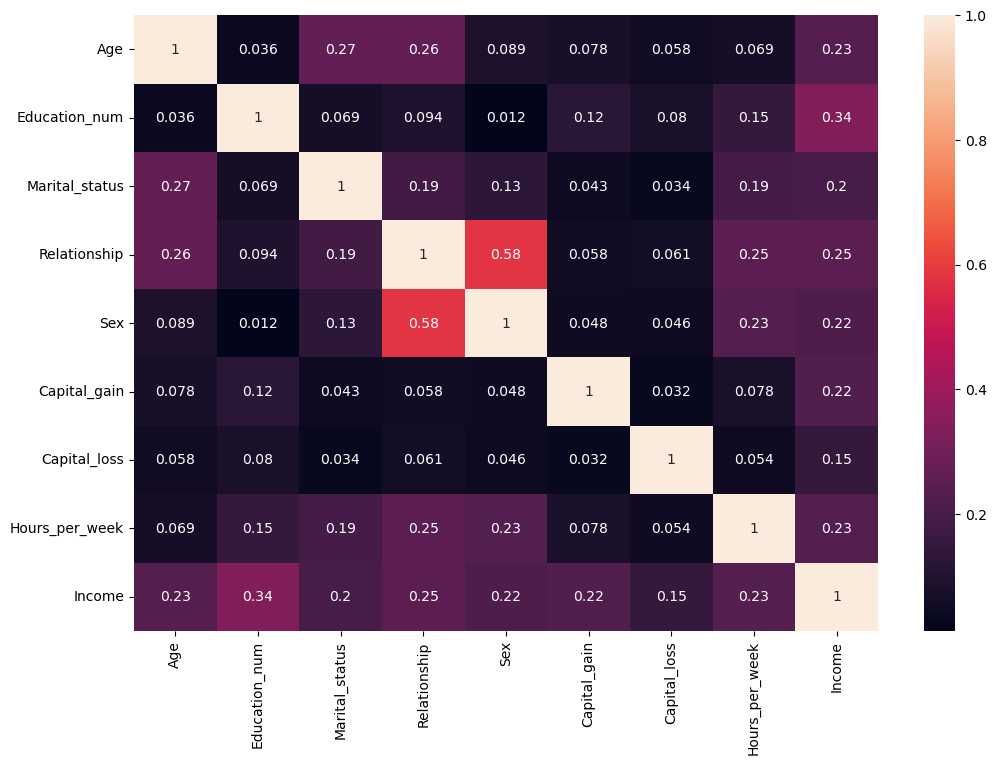

In [1520]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

### Removing Outliners

In [1521]:
df1=df[['Age', 'Education_num', 'Capital_gain','Capital_loss', 'Hours_per_week']]

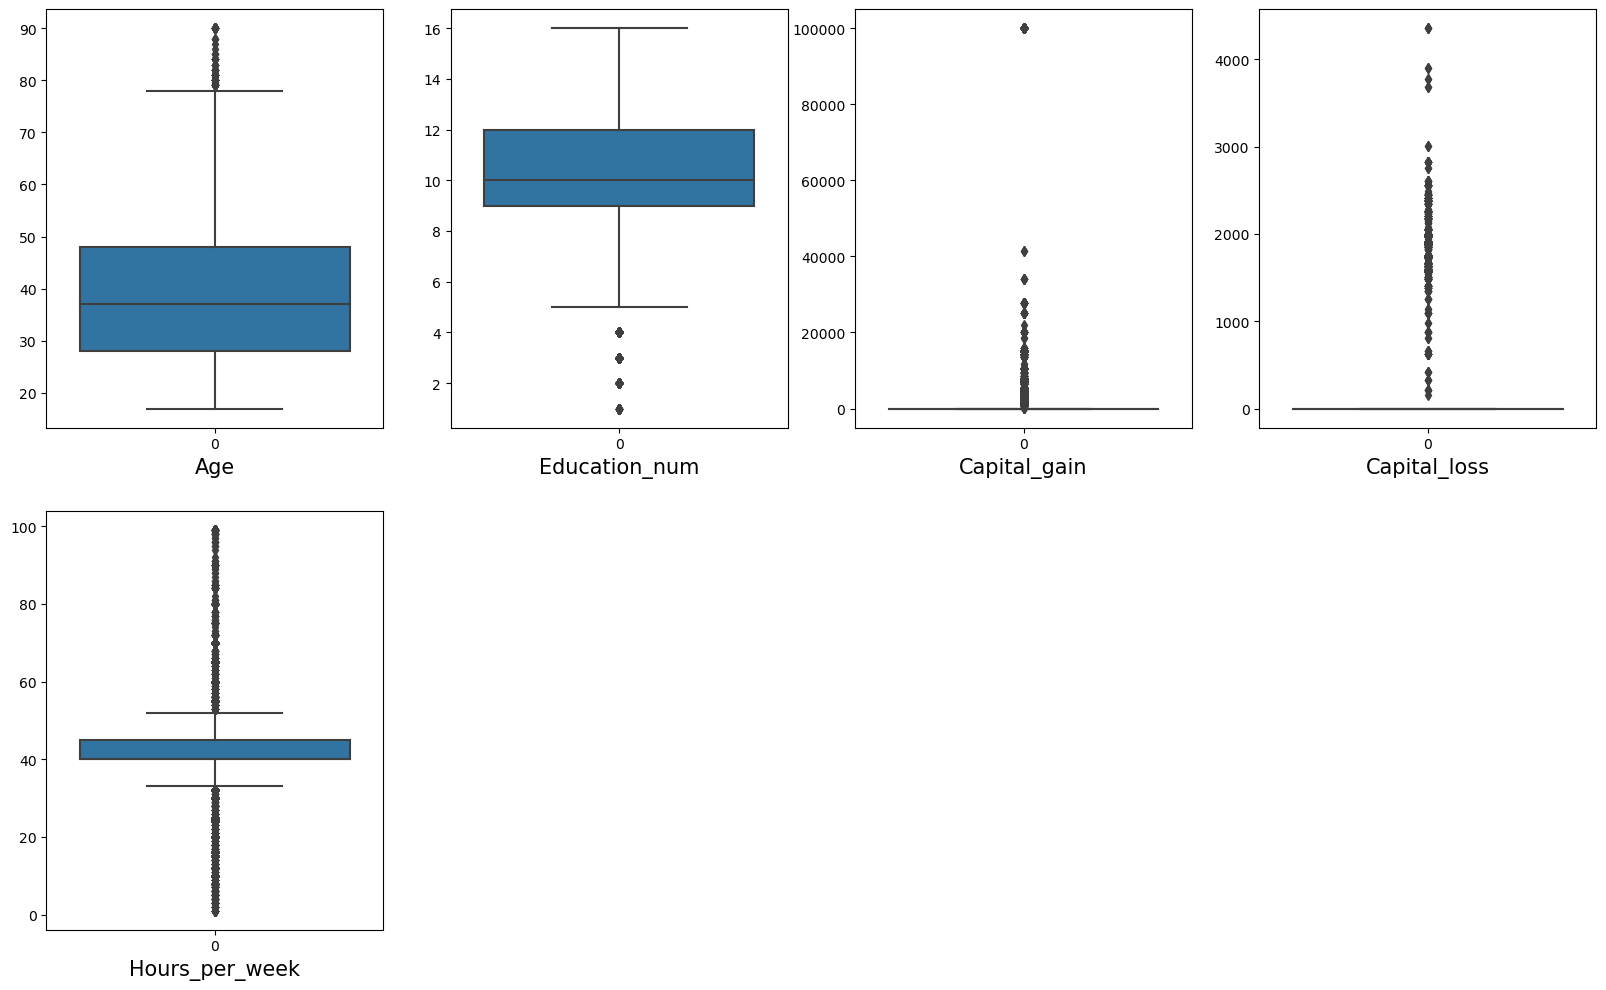

In [1522]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df1: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df1[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

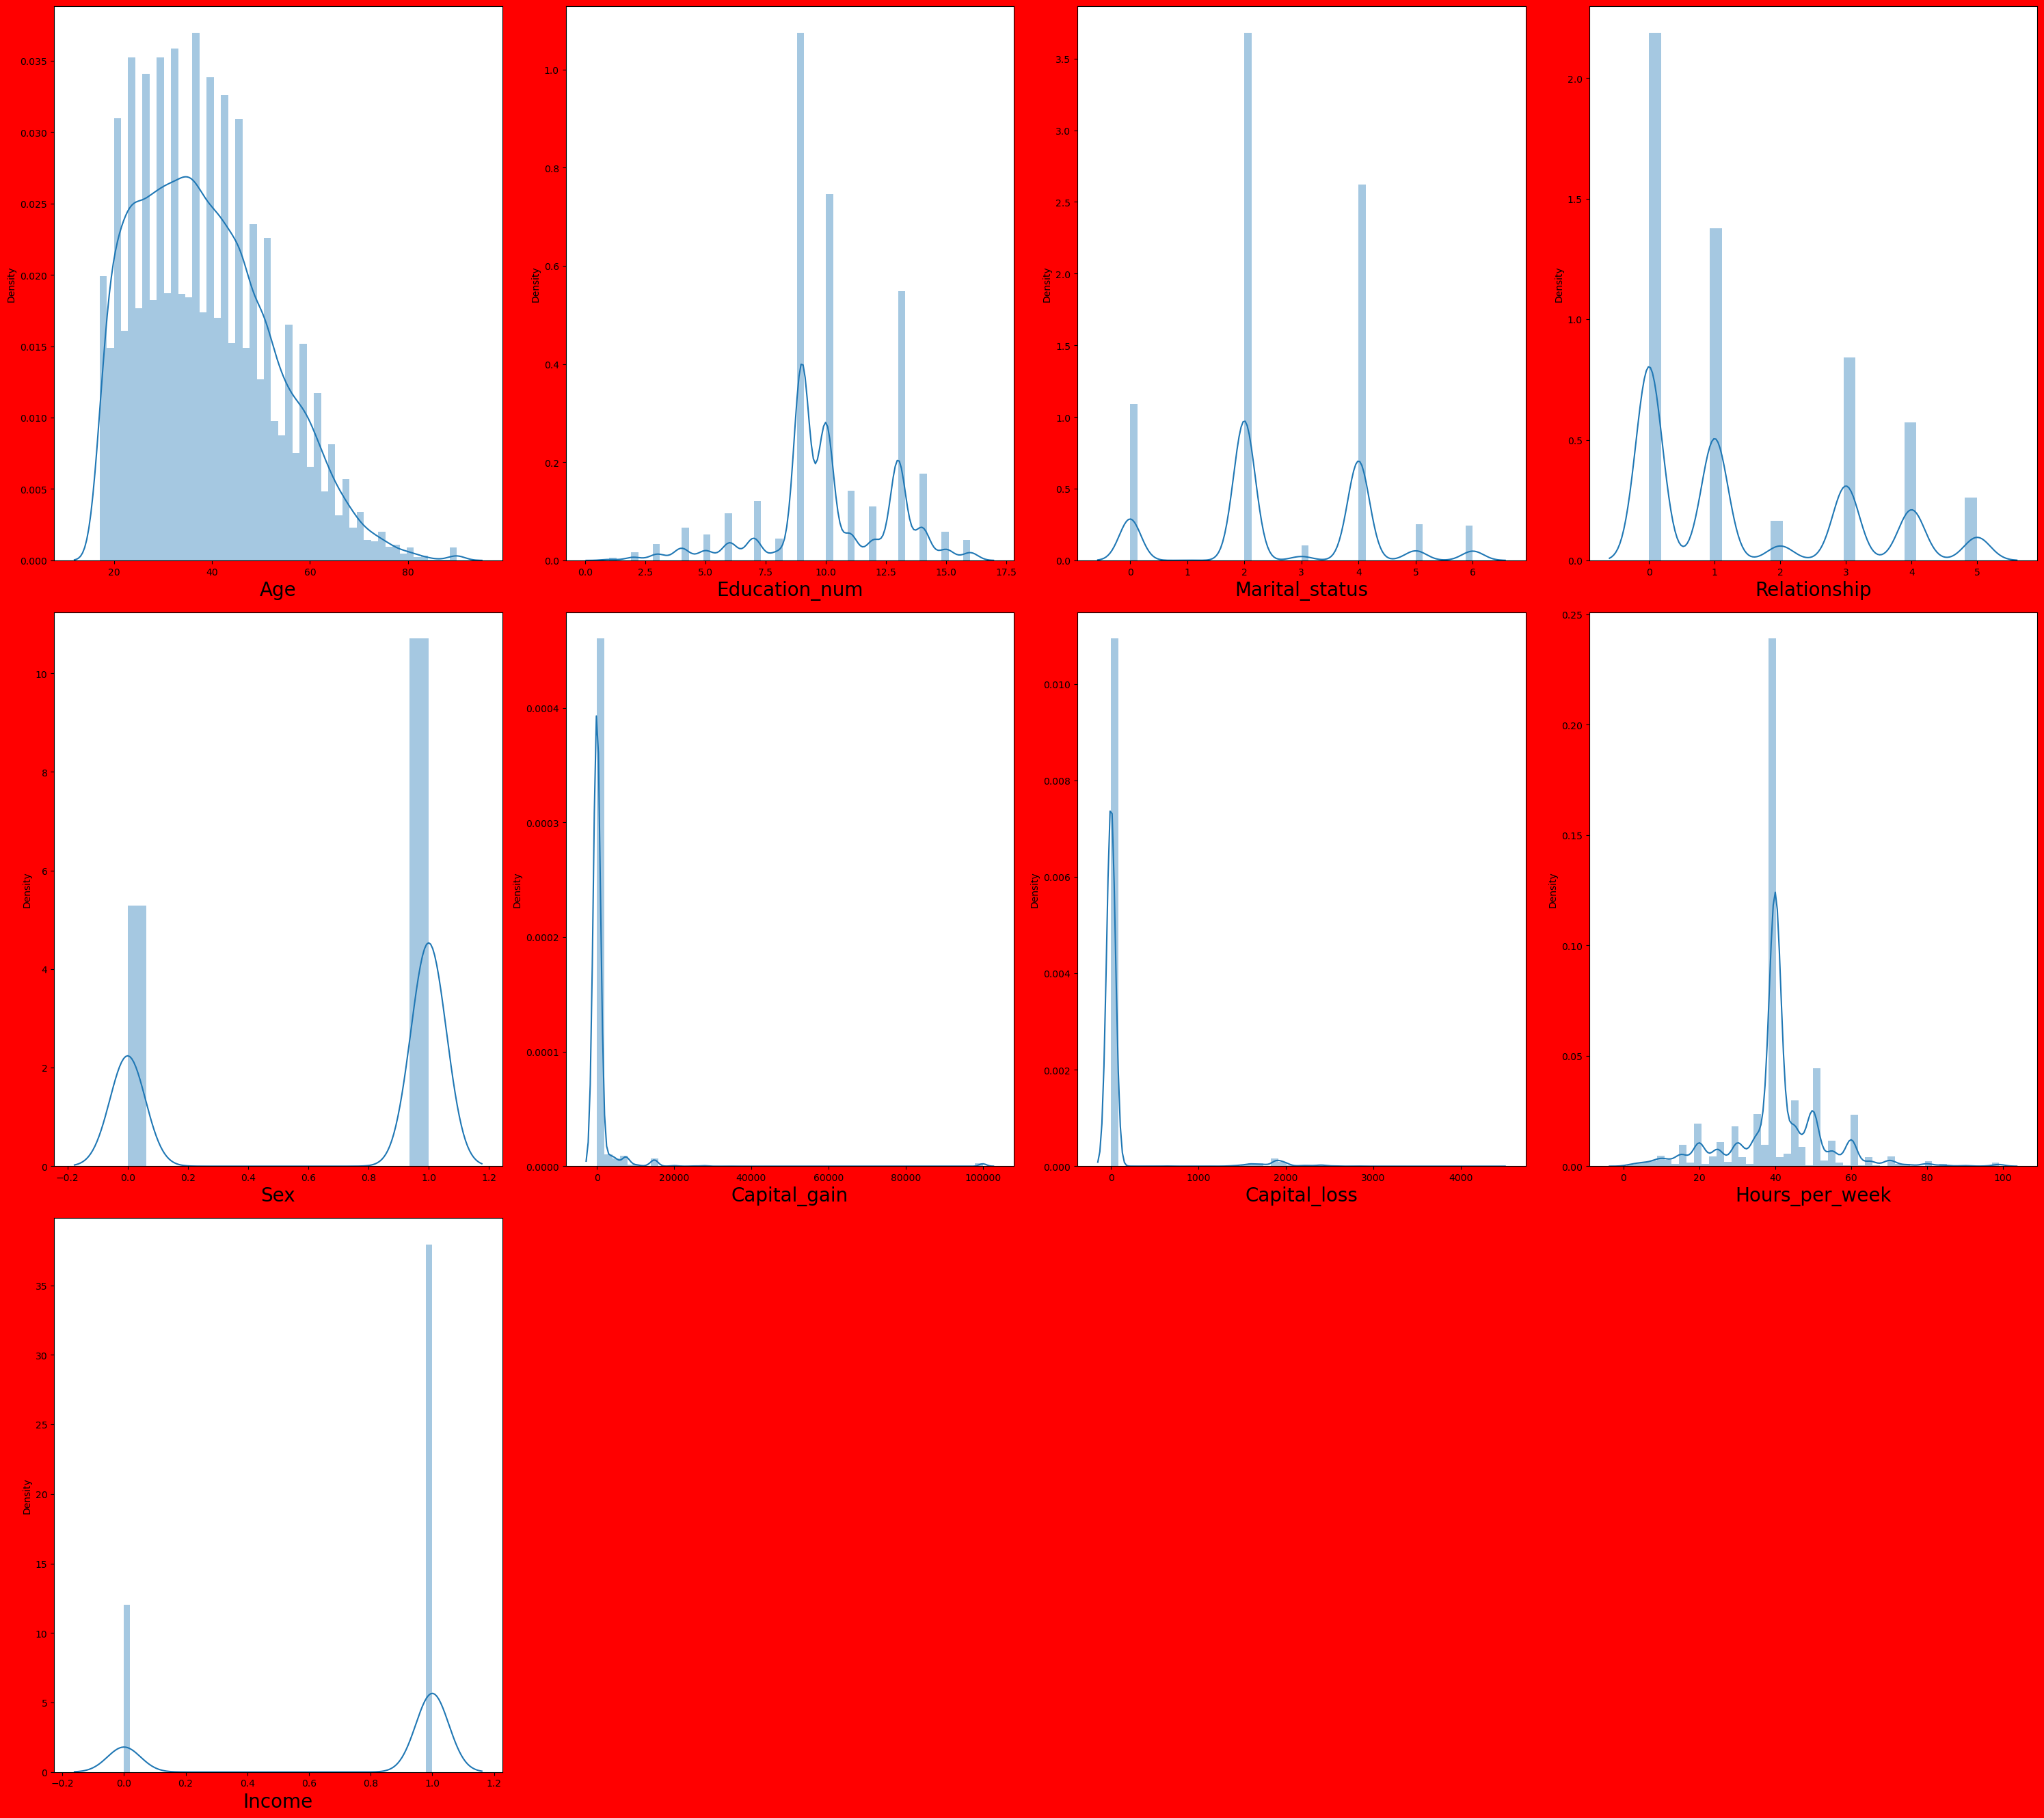

In [1523]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

In [1524]:
from scipy.stats import zscore 

z_score = zscore (df[['Age', 'Education_num', 'Capital_gain','Capital_loss', 'Hours_per_week']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.5).all(axis=1)
df = df[filtering_entry]

df.describe()

Age  Education_num  Marital_status  Relationship  \
count  29104.000000    29104.00000    29104.000000  29104.000000   
mean      37.700660       10.15479        2.609573      1.483542   
std       12.826005        2.34271        1.509941      1.610259   
min       17.000000        4.00000        0.000000      0.000000   
25%       27.000000        9.00000        2.000000      0.000000   
50%       36.000000       10.00000        2.000000      1.000000   
75%       47.000000       12.00000        4.000000      3.000000   
max       72.000000       16.00000        6.000000      5.000000   

                Sex  Capital_gain  Capital_loss  Hours_per_week        Income  
count  29104.000000  29104.000000  29104.000000    29104.000000  29104.000000  
mean       0.661765    555.770169      0.988352       40.231824      0.774017  
std        0.473117   2254.852474     28.119000       10.318264      0.418235  
min        0.000000      0.000000      0.000000       10.000000      0.000000  
25%        0.000000      0.000000      0.000000       40.000000      1.000000  
50%        1.000000      0.000000      0.000000       40.000000      1.000000  
75%        1.000000      0.000000      0.000000       45.000000      1.000000  
max        1.000000  15831.000000   1092.000000       70.000000      1.000000

In [1525]:
df.columns

Index(['Age', 'Education_num', 'Marital_status', 'Relationship', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

# 

### Removing Skewness

In [1526]:
df.skew()

Age                0.412876
Education_num     -0.001285
Marital_status    -0.071583
Relationship       0.737230
Sex               -0.683872
Capital_gain       4.813992
Capital_loss      31.069764
Hours_per_week    -0.268592
Income            -1.310441
dtype: float64

In [1527]:
df['Relationship'] = np.log1p(df['Relationship'])
df['Sex'] = np.log1p(df['Sex'])
df['Capital_gain'] = np.log1p(df['Capital_gain'])
df['Capital_loss'] = np.log1p(df['Capital_loss'])
#df['Income'] = np.log1p(df['Income'])

In [1528]:
df.skew()

Age                0.412876
Education_num     -0.001285
Marital_status    -0.071583
Relationship       0.239761
Sex               -0.683872
Capital_gain       3.130886
Capital_loss      26.514988
Hours_per_week    -0.268592
Income            -1.310441
dtype: float64

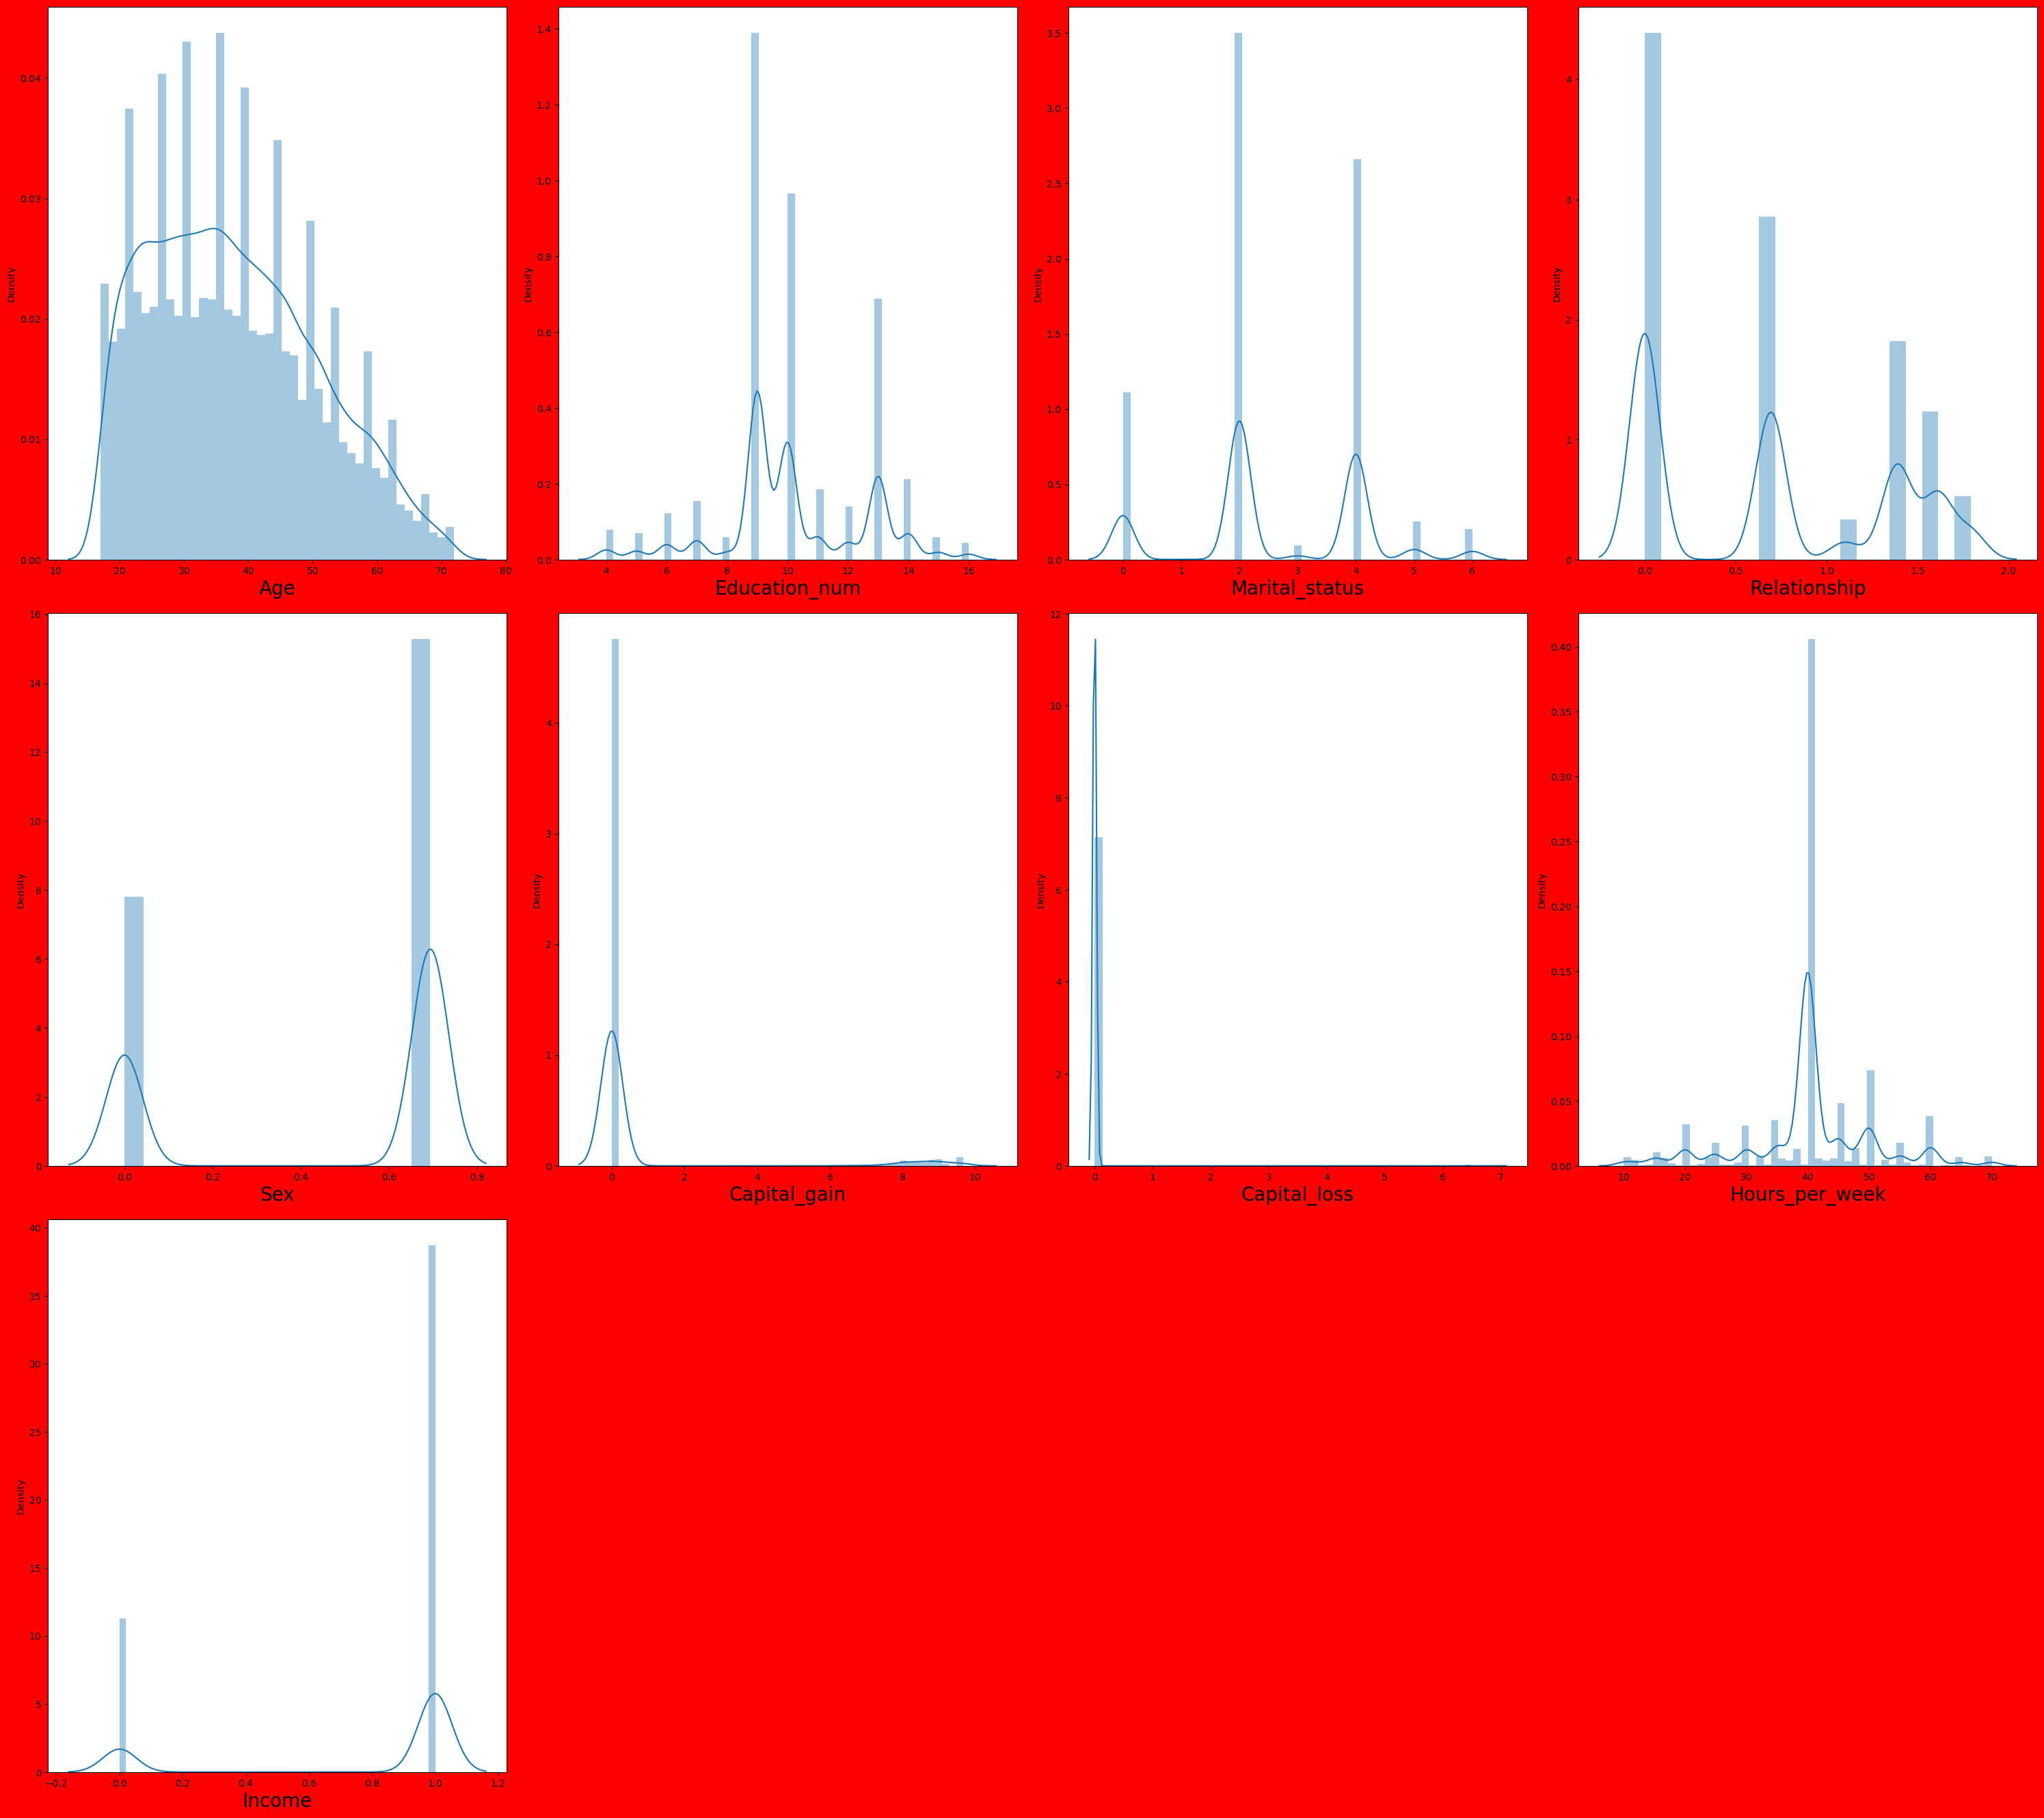

In [1529]:
plt.figure(figsize=(30,35), facecolor='red')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

#  

### Checking Distribution

In [1530]:
x = df.drop(columns = ['Income'])
y = df['Income']

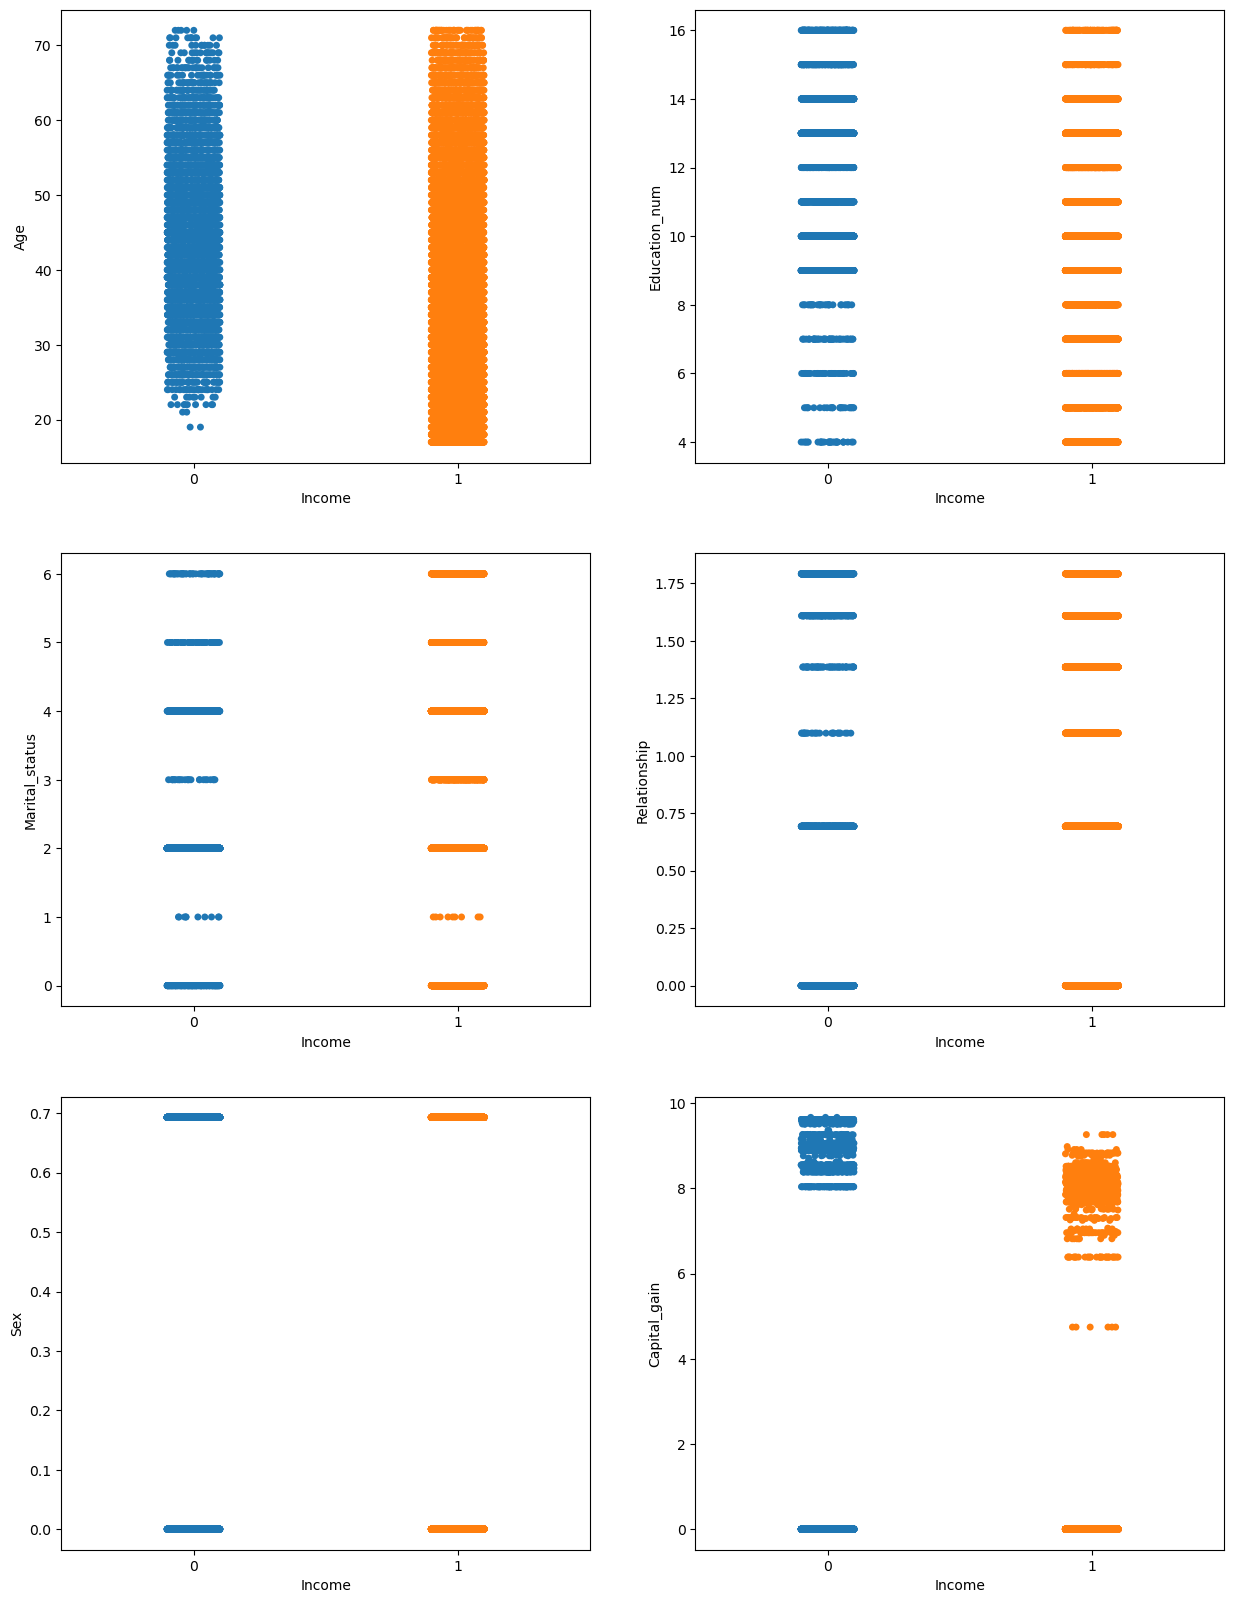

In [1531]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=6:
        ax = plt.subplot (3,2,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

# 

### Oversampling

In [1532]:
df["Income"].unique()

array([1, 0], dtype=int64)

In [1533]:
x = df.drop(['Income'],axis=1)
y = df['Income']

In [1534]:
from imblearn.over_sampling import SMOTE

In [1535]:
upsample = SMOTE()

In [1536]:
x, y = upsample.fit_resample(x,y)

In [1537]:
from collections import Counter
count = Counter(y)
print(count)

Counter({1: 22527, 0: 22527})


# 

### Separating Features & Target

In [1538]:
x = df.drop(columns=['Income'],axis=1)
y = df.Income

# 

### Standardization

In [1539]:
from sklearn.preprocessing import StandardScaler

In [1540]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

# 

### Train-Test split

In [1541]:
from sklearn.model_selection import train_test_split

In [1542]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [1543]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

### Logistic Regression

In [1287]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [1288]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [1289]:
cls_reg.coef_

array([[-0.446173  , -0.82021803,  0.30467122,  0.53111295, -0.21404128,
        -0.45339377,  0.02122869, -0.40066657]])

In [1290]:
cls_reg.intercept_

array([1.8288809])

In [1291]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.8275609309144218


In [1292]:
y_pred = cls_reg.predict(x_test)

In [1293]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8313633864760858


In [1294]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 719,  909],
       [ 318, 5330]], dtype=int64)

In [1295]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.44      0.54      1628
           1       0.85      0.94      0.90      5648

    accuracy                           0.83      7276
   macro avg       0.77      0.69      0.72      7276
weighted avg       0.82      0.83      0.82      7276



### Cross-validation

In [1296]:
from sklearn.model_selection import KFold, cross_val_score

In [1297]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.81791113, 0.82615667, 0.8295923 , 0.83344788, 0.82657503])

In [1298]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.8267366020572382

In [1299]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.83379121, 0.81786942, 0.82474227, 0.83573883, 0.82542955])

In [1300]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.8275142555039462

### ROC Curve

In [1301]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1302]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.94369688 1.        ]
False Positive rate =  [0.         0.55835381 1.        ]


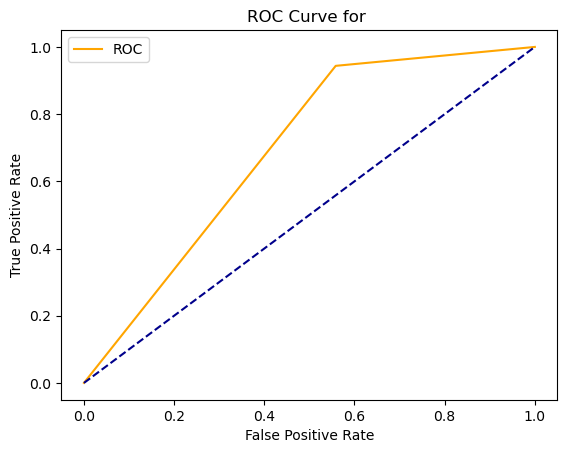

In [1303]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to LogisticRegression

In [1304]:
from sklearn.ensemble import BaggingClassifier

In [1305]:
bag0 = BaggingClassifier(LogisticRegression())

In [1306]:
bag0.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [1307]:
print('Accuracy Score:',bag0.score(x_train, y_train))

Accuracy Score: 0.8278358072200843


In [1308]:
y_pred = bag0.predict(x_test)

In [1309]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8319131390874107


In [1310]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 719,  909],
       [ 314, 5334]], dtype=int64)

In [1311]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54      1628
           1       0.85      0.94      0.90      5648

    accuracy                           0.83      7276
   macro avg       0.78      0.69      0.72      7276
weighted avg       0.82      0.83      0.82      7276



### Cross-validation

In [1312]:
from sklearn.model_selection import KFold, cross_val_score

In [1313]:
cross_val_score (bag0, x_train, y_train, cv=5)

array([0.81768209, 0.82638571, 0.82982135, 0.83321879, 0.82542955])

In [1314]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.8268740591019117

In [1315]:
cross_val_score (bag0, x_test, y_test, cv=5)

array([0.83447802, 0.81718213, 0.82611684, 0.83505155, 0.82611684])

In [1316]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.8274237718410354

### ROC Curve

In [1317]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1318]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.        0.9444051 1.       ]
False Positive rate =  [0.         0.55835381 1.        ]


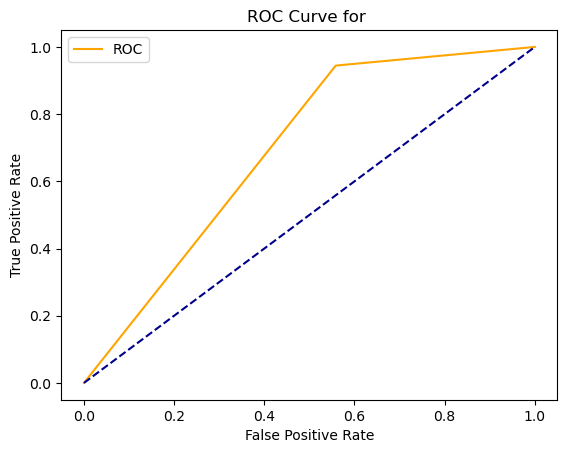

In [1319]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### DecisionTreeClassifier

In [1320]:
from sklearn.tree import DecisionTreeClassifier

In [1321]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'best'}

In [1580]:
cls_dt = DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=9, min_samples_split=10,max_depth=8)

In [1581]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=9, min_samples_split=10)

In [1582]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.8564687557265896


In [1583]:
y_pred = cls_dt.predict(x_test)

In [1584]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8508796041781198


In [1585]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 829,  799],
       [ 286, 5362]], dtype=int64)

In [1586]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.51      0.60      1628
           1       0.87      0.95      0.91      5648

    accuracy                           0.85      7276
   macro avg       0.81      0.73      0.76      7276
weighted avg       0.84      0.85      0.84      7276



### Cross-validation

In [1587]:
from sklearn.model_selection import KFold, cross_val_score

In [1588]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.84631241, 0.8591388 , 0.84928997, 0.85521191, 0.8513173 ])

In [1589]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.8522540782963638

In [1590]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.84203297, 0.84879725, 0.83986254, 0.84536082, 0.84879725])

In [1591]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.8449701672897548

### ROC Curve

In [1592]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1593]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.94936261 1.        ]
False Positive rate =  [0.         0.49078624 1.        ]


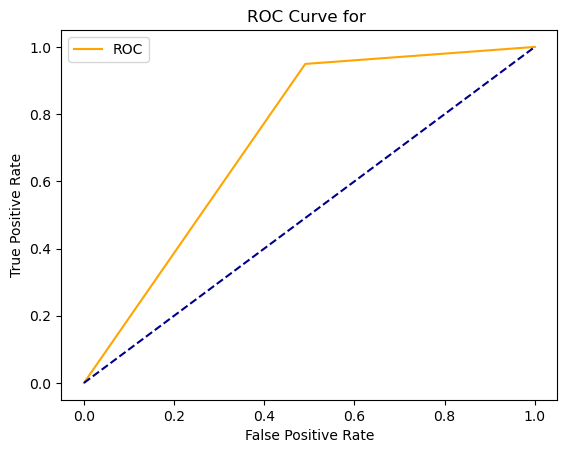

In [1594]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to DecisionTreeClassifier

In [1599]:
from sklearn.ensemble import BaggingClassifier

In [1600]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_features=None, min_samples_leaf=9, min_samples_split=10,max_depth=8))

In [1601]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                        min_samples_leaf=9,
                                                        min_samples_split=10))

In [1602]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.8581180135605644


In [1603]:
y_pred = bag1.predict(x_test)

In [1604]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8511544804837823


In [1605]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 903,  725],
       [ 358, 5290]], dtype=int64)

In [1606]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.55      0.63      1628
           1       0.88      0.94      0.91      5648

    accuracy                           0.85      7276
   macro avg       0.80      0.75      0.77      7276
weighted avg       0.84      0.85      0.84      7276



### Cross-validation

In [1607]:
from sklearn.model_selection import KFold, cross_val_score

In [1608]:
cross_val_score (bag1, x_train, y_train, cv=5)

array([0.84745763, 0.85890976, 0.85868071, 0.85658648, 0.85063001])

In [1609]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.8545446197551737

In [1610]:
cross_val_score (bag1, x_test, y_test, cv=5)

array([0.83997253, 0.85910653, 0.84742268, 0.85841924, 0.84948454])

In [1611]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.8540865870238576

### ROC Curve

In [1612]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1613]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.93661473 1.        ]
False Positive rate =  [0.        0.4453317 1.       ]


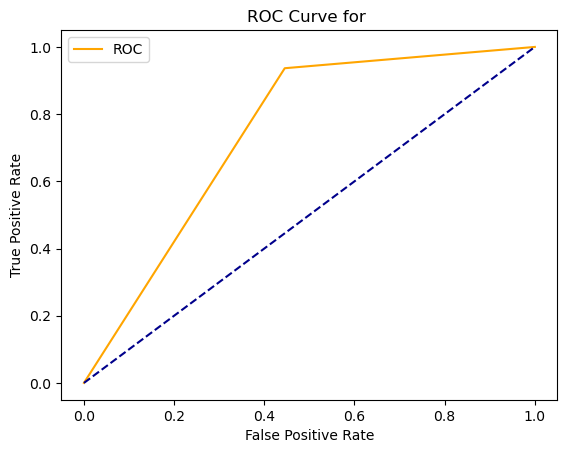

In [1614]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Random Forest Classifier

In [1615]:
from sklearn.ensemble import RandomForestClassifier

In [1616]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 25}

In [1864]:
cls_rf = RandomForestClassifier(n_estimators=45,max_features='sqrt',min_samples_split=4,max_depth=10)

In [1865]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=45)

In [1866]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8544529961517318


In [1867]:
y_pred = cls_rf.predict(x_test)

In [1868]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8536283672347443


In [1869]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 818,  810],
       [ 255, 5393]], dtype=int64)

In [1870]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.50      0.61      1628
           1       0.87      0.95      0.91      5648

    accuracy                           0.85      7276
   macro avg       0.82      0.73      0.76      7276
weighted avg       0.85      0.85      0.84      7276



### Cross-validation

In [1871]:
from sklearn.model_selection import KFold, cross_val_score

In [1872]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.84310582, 0.86097114, 0.85639029, 0.85704467, 0.85200458])

In [1873]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.8555525751157413

In [1874]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.84340659, 0.85704467, 0.85017182, 0.85498282, 0.85223368])

In [1875]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.8529422038442658

### ROC Curve

In [1876]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1877]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95485127 1.        ]
False Positive rate =  [0.       0.497543 1.      ]


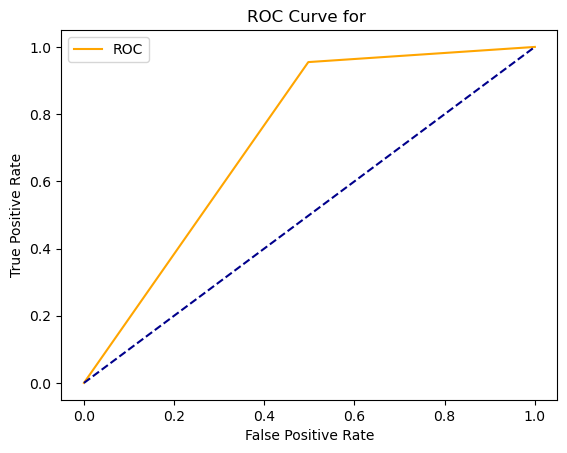

In [1878]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to RandomForestClassifier

In [1879]:
from sklearn.ensemble import BaggingClassifier

In [1880]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=240,criterion='gini',min_samples_split=3,max_depth=16))

In [1881]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=16,
                                                        min_samples_split=3,
                                                        n_estimators=240))

In [1882]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.8847352024922118


In [1883]:
y_pred = bag2.predict(x_test)

In [1884]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8530786146234195


In [1885]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 912,  716],
       [ 353, 5295]], dtype=int64)

In [1886]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63      1628
           1       0.88      0.94      0.91      5648

    accuracy                           0.85      7276
   macro avg       0.80      0.75      0.77      7276
weighted avg       0.85      0.85      0.85      7276



### Cross-validation

In [1887]:
from sklearn.model_selection import KFold, cross_val_score

In [1888]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.84608337, 0.85982593, 0.84883188, 0.85612829, 0.85223368])

In [1889]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.8523458317657164

In [1890]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.83585165, 0.84810997, 0.83986254, 0.85429553, 0.84948454])

In [1891]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.8532620756349569

### ROC Curve

In [1892]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1893]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.     0.9375 1.    ]
False Positive rate =  [0.         0.43980344 1.        ]


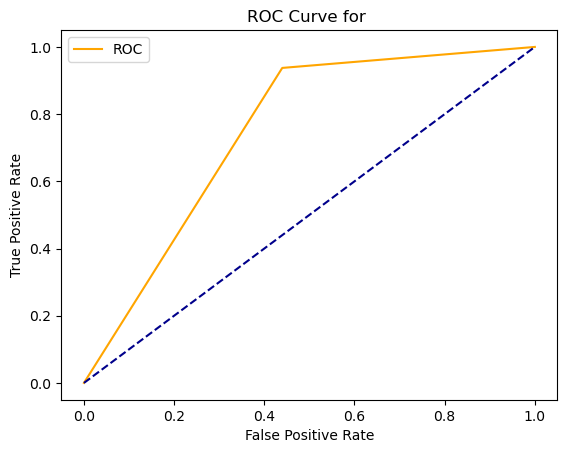

In [1894]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### KNeighbors Classifier

In [1895]:
from sklearn.neighbors import KNeighborsClassifier

In [1896]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [2053]:
cls_KN = KNeighborsClassifier(n_neighbors=19, leaf_size=40, p = 1, algorithm='auto', weights = 'distance')

In [2054]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=40, n_neighbors=19, p=1, weights='distance')

In [2055]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 0.9186366135239142


In [2056]:
y_pred = cls_KN.predict(x_test)

In [2057]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8284771852666301


In [2058]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 949,  679],
       [ 569, 5079]], dtype=int64)

In [2059]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1628
           1       0.88      0.90      0.89      5648

    accuracy                           0.83      7276
   macro avg       0.75      0.74      0.75      7276
weighted avg       0.82      0.83      0.83      7276



### Cross-validation

In [2060]:
from sklearn.model_selection import KFold, cross_val_score

In [2061]:
cross_val_score (cls_KN, x_train, y_train, cv=15)

array([0.8331044 , 0.80906593, 0.80288462, 0.8371134 , 0.8233677 ,
       0.82749141, 0.82268041, 0.83436426, 0.83092784, 0.83917526,
       0.82886598, 0.83848797, 0.83573883, 0.81237113, 0.83024055])

In [2062]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.8252248579175017

In [2063]:
cross_val_score (cls_KN, x_test, y_test, cv=15)

array([0.79012346, 0.82680412, 0.85154639, 0.83092784, 0.81443299,
       0.84742268, 0.80412371, 0.81443299, 0.81443299, 0.82268041,
       0.82886598, 0.84123711, 0.83092784, 0.80824742, 0.82268041])

In [2064]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.8225675012272952

### ROC Curve

In [2065]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [2066]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.89925637 1.        ]
False Positive rate =  [0.         0.41707617 1.        ]


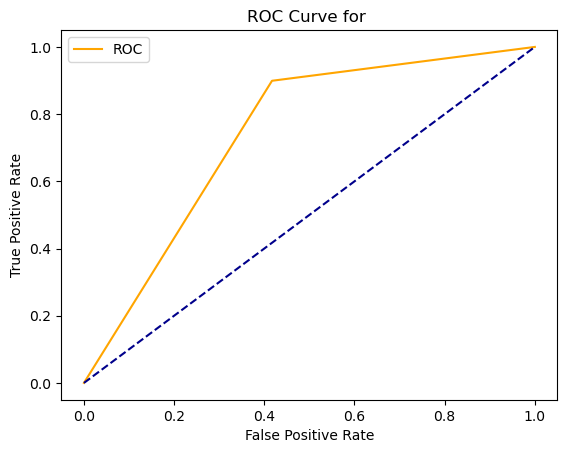

In [2067]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to KNeighborsClassifier

In [2071]:
from sklearn.ensemble import BaggingClassifier

In [2072]:
bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=19, leaf_size=40, p = 1, algorithm='auto', weights = 'distance'))

In [2073]:
bag3.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=40,
                                                      n_neighbors=19, p=1,
                                                      weights='distance'))

In [2074]:
print('Accuracy Score:',bag3.score(x_train, y_train))

Accuracy Score: 0.9163917903610043


In [2075]:
y_pred = bag3.predict(x_test)

In [2076]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8290269378779549


In [2077]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 900,  728],
       [ 516, 5132]], dtype=int64)

In [2078]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59      1628
           1       0.88      0.91      0.89      5648

    accuracy                           0.83      7276
   macro avg       0.76      0.73      0.74      7276
weighted avg       0.82      0.83      0.82      7276



### Cross-validation

In [2079]:
from sklearn.model_selection import KFold, cross_val_score

In [2080]:
cross_val_score (bag3, x_train, y_train, cv=5)

array([0.81676592, 0.83234082, 0.83142464, 0.84009164, 0.82726231])

In [2081]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.8277902819821394

In [2082]:
cross_val_score (bag3, x_test, y_test, cv=5)

array([0.82211538, 0.83573883, 0.81580756, 0.83642612, 0.82817869])

In [2083]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.828065374478095

### ROC Curve

In [2084]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [2085]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.90864023 1.        ]
False Positive rate =  [0.         0.44717445 1.        ]


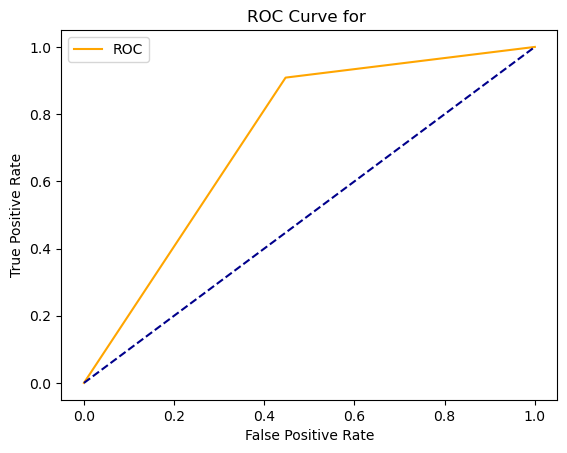

In [2086]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### GradientBoostingClassifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [207]:
cls_gb = GradientBoostingClassifier(n_estimators=16,learning_rate=1,max_depth=3)

In [208]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=16)

In [209]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.8599505222649808


In [210]:
y_pred = cls_gb.predict(x_test)

In [211]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8565145684442002


In [82]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 885,  743],
       [ 301, 5347]], dtype=int64)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.54      0.63      1628
           1       0.88      0.95      0.91      5648

    accuracy                           0.86      7276
   macro avg       0.81      0.75      0.77      7276
weighted avg       0.85      0.86      0.85      7276



### Cross-validation

In [84]:
from sklearn.model_selection import KFold, cross_val_score

In [85]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.84448007, 0.86257444, 0.85318369, 0.85887743, 0.85773196])

In [86]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.8553695194408106

In [87]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.84478022, 0.84948454, 0.85704467, 0.85223368, 0.8556701 ])

In [88]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.8554153279611955

### ROC Curve

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [90]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.        0.9467068 1.       ]
False Positive rate =  [0.         0.45638821 1.        ]


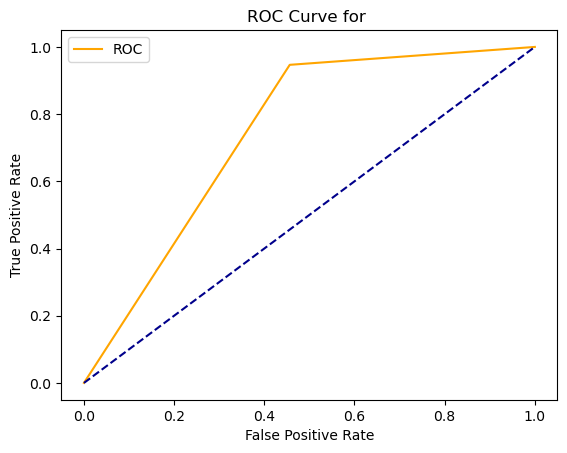

In [91]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GradientBoostingClassifier

In [212]:
from sklearn.ensemble import BaggingClassifier

In [216]:
bag5 = BaggingClassifier(GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=3))

In [217]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=1,
                                                            n_estimators=50))

In [218]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.8672805570826462


In [219]:
y_pred = bag5.predict(x_test)

In [220]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8545904343045629


In [221]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 932,  696],
       [ 362, 5286]], dtype=int64)

In [222]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.57      0.64      1628
           1       0.88      0.94      0.91      5648

    accuracy                           0.85      7276
   macro avg       0.80      0.75      0.77      7276
weighted avg       0.85      0.85      0.85      7276



### Cross-validation

In [223]:
from sklearn.model_selection import KFold, cross_val_score

In [224]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.84699954, 0.86875859, 0.85868071, 0.85841924, 0.85452463])

In [225]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.857476522477396

In [226]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.8489011 , 0.84604811, 0.84810997, 0.85360825, 0.85498282])

In [227]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.857842980145968

### ROC Curve

In [228]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [229]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.93590652 1.        ]
False Positive rate =  [0.         0.42751843 1.        ]


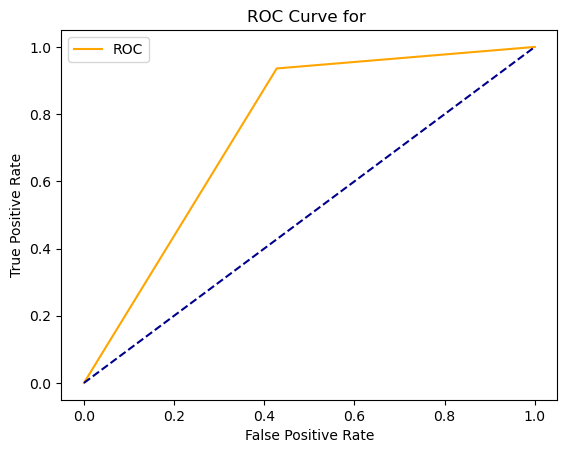

In [230]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### GaussianNB

In [108]:
from sklearn.naive_bayes import GaussianNB

In [109]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-05}

In [278]:
gnb = GaussianNB(var_smoothing=1e-04)

In [279]:
gnb.fit(x_train, y_train)

GaussianNB(var_smoothing=0.0001)

In [280]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.7879329301814184


In [281]:
y_pred = gnb.predict(x_test)

In [282]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7890324354040682


In [283]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1242,  386],
       [1149, 4499]], dtype=int64)

In [284]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.76      0.62      1628
           1       0.92      0.80      0.85      5648

    accuracy                           0.79      7276
   macro avg       0.72      0.78      0.74      7276
weighted avg       0.83      0.79      0.80      7276



### Cross-validation

In [285]:
from sklearn.model_selection import KFold, cross_val_score

In [286]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.78034814, 0.79157123, 0.79752634, 0.80778923, 0.62382589])

In [287]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.7602121674356517

In [288]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.60302198, 0.61786942, 0.59175258, 0.59381443, 0.62749141])

In [289]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.7602121674356517

### ROC Curve

In [290]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [291]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.79656516 1.        ]
False Positive rate =  [0.         0.23710074 1.        ]


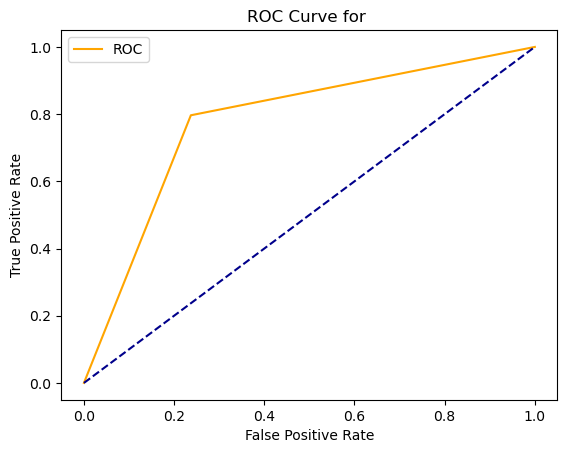

In [292]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GaussianNB

In [293]:
from sklearn.ensemble import BaggingClassifier

In [294]:
bag6 = BaggingClassifier(GaussianNB(var_smoothing=1e-09))

In [295]:
bag6.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [296]:
print('Accuracy Score:',bag6.score(x_train, y_train))

Accuracy Score: 0.7657595748579806


In [297]:
y_pred = bag6.predict(x_test)

In [298]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7691039032435404


In [299]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1295,  333],
       [1347, 4301]], dtype=int64)

In [300]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.80      0.61      1628
           1       0.93      0.76      0.84      5648

    accuracy                           0.77      7276
   macro avg       0.71      0.78      0.72      7276
weighted avg       0.83      0.77      0.79      7276



### Cross-validation

In [301]:
from sklearn.model_selection import KFold, cross_val_score

In [302]:
cross_val_score (bag6, x_train, y_train, cv=5)

array([0.75355016, 0.76087952, 0.76133761, 0.78991982, 0.29186712])

In [303]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.6762750484190287

In [304]:
cross_val_score (bag6, x_test, y_test, cv=5)

array([0.26785714, 0.27079038, 0.28041237, 0.26735395, 0.28591065])

In [305]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.6720141004187832

### ROC Curve

In [306]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [307]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.        0.7615085 1.       ]
False Positive rate =  [0.         0.20454545 1.        ]


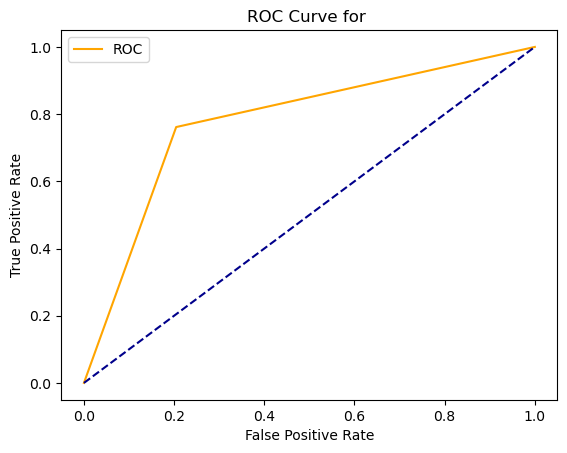

In [308]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Best Model

### Random Forest Classifier

In [1615]:
from sklearn.ensemble import RandomForestClassifier

In [1616]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 25}

In [1864]:
cls_rf = RandomForestClassifier(n_estimators=45,max_features='sqrt',min_samples_split=4,max_depth=10)

In [1865]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=45)

In [1866]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8544529961517318


In [1867]:
y_pred = cls_rf.predict(x_test)

In [1868]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8536283672347443


In [1869]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 818,  810],
       [ 255, 5393]], dtype=int64)

In [1870]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.50      0.61      1628
           1       0.87      0.95      0.91      5648

    accuracy                           0.85      7276
   macro avg       0.82      0.73      0.76      7276
weighted avg       0.85      0.85      0.84      7276



### Cross-validation

In [1871]:
from sklearn.model_selection import KFold, cross_val_score

In [1872]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.84310582, 0.86097114, 0.85639029, 0.85704467, 0.85200458])

In [1873]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.8555525751157413

In [1874]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.84340659, 0.85704467, 0.85017182, 0.85498282, 0.85223368])

In [1875]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.8529422038442658

### ROC Curve

In [1876]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1877]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95485127 1.        ]
False Positive rate =  [0.       0.497543 1.      ]


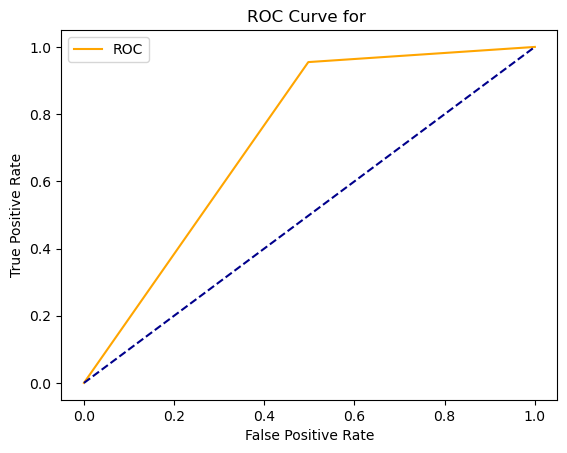

In [1878]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

##### Reasons for choosing this model:-
##### 1) Has one of the highest accuracy for Testing data
##### 2) Difference between accuracy of Training & Testing data is very less
##### 3) Most stable model
##### 4) Has one of the highest accuracy for Testing data during Cross-validation
##### 5) Difference between accuracy of Training & Testing data is very less, during Cross-validation

# 

### Saving the Best Model

In [143]:
import pickle

In [147]:
with open('model-rf', 'wb') as f: 
    pickle.dump(cls_rf, f)

# 

# 

# 

# 

# 

# Loan Application Status Prediction

In [309]:
import warnings
warnings.filterwarnings ('ignore')

### Import Data from Website

In [310]:
import pandas as pd
import numpy as np

In [311]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [312]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

# 

### EDA

In [313]:
df.shape

(614, 13)

In [314]:
df.drop_duplicates(inplace=True)
df.shape

(614, 13)

In [315]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [316]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print('\n')

Column: Loan_ID
Unique Values: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP00128

##### Dropping columns that have only single values or irrelevent data

In [317]:
df.drop(['Loan_ID'], axis=1,inplace=True)

In [318]:
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [319]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [320]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [321]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# 

### Imputating Categorical Columns

In [322]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:>

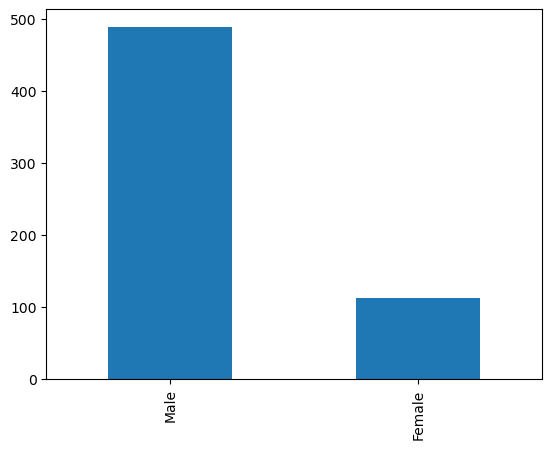

In [323]:
df['Gender'].value_counts().plot.bar()

In [324]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [325]:
df['Gender'].isnull().sum()

13

In [326]:
df['Gender'].isnull().mean()

0.021172638436482084

In [327]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [328]:
df[['Gender']]=mode_imp.fit_transform(df[['Gender']])

In [329]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [330]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

###### The Null values was less than 1% of the Mode data, hence it was replaced with Mode data

In [331]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:>

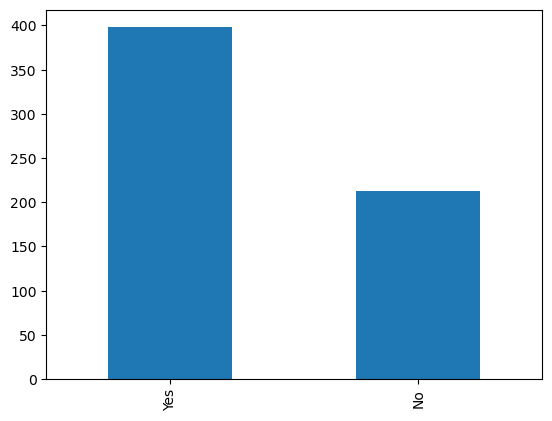

In [332]:
df['Married'].value_counts().plot.bar()

In [333]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [334]:
df['Married'].isnull().sum()

3

In [335]:
df['Married'].isnull().mean()

0.004885993485342019

In [336]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [337]:
df[['Married']]=mode_imp.fit_transform(df[['Married']])

In [338]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [339]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

###### The Null values was less than 1% of the Mode data, hence it was replaced with Mode data

In [340]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:>

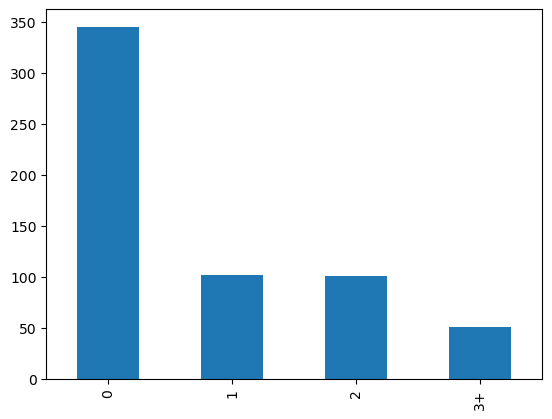

In [341]:
df['Dependents'].value_counts().plot.bar()

In [342]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [343]:
df['Dependents'].isnull().sum()

15

In [344]:
df['Dependents'].isnull().mean()

0.024429967426710098

In [345]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [346]:
df[['Dependents']]=mode_imp.fit_transform(df[['Dependents']])

In [347]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [348]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

###### The Null values was less than 1% of the Mode data, hence it was replaced with Mode data

In [349]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:>

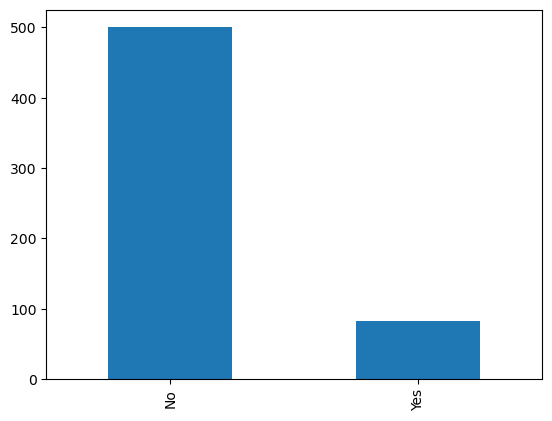

In [350]:
df['Self_Employed'].value_counts().plot.bar()

In [351]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [352]:
df['Self_Employed'].isnull().sum()

32

In [353]:
df['Self_Employed'].isnull().mean()

0.05211726384364821

In [354]:
from sklearn.impute import SimpleImputer
mode_imp=SimpleImputer (strategy='most_frequent')

In [355]:
df[['Self_Employed']]=mode_imp.fit_transform(df[['Self_Employed']])

In [356]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [357]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

###### The Null values was less than 1% of the Mode data, hence it was replaced with Mode data

# 

### Imputing Continious values

In [358]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [359]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [360]:
df['LoanAmount'].isnull().mean()

0.035830618892508145

In [361]:
df['Loan_Amount_Term'].isnull().mean()

0.02280130293159609

In [362]:
df['Credit_History'].isnull().mean()

0.08143322475570032

###### The Null values in continious value columns are less than 1%, hence we can directly replace than with the Mean.

In [363]:
from sklearn.impute import SimpleImputer

In [364]:
imputer = SimpleImputer(strategy='mean')

In [365]:
imputer.fit(df[['LoanAmount']])
df['LoanAmount'] = imputer.transform(df[['LoanAmount']])

In [366]:
imputer.fit(df[['Loan_Amount_Term']])
df['Loan_Amount_Term'] = imputer.transform(df[['Loan_Amount_Term']])

In [367]:
imputer.fit(df[['Credit_History']])
df['Credit_History'] = imputer.transform(df[['Credit_History']])

In [368]:
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [369]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 

### Encoding

In [370]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [371]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [372]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [373]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [374]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [375]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [376]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [377]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [378]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [379]:
df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Dependents = le.fit_transform(df.Dependents)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)
#df.Loan_Status = le.fit_transform(df.Loan_Status)

df.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area Loan_Status  
0              2           Y  
1              0           N  
2              2           Y  
3              2           Y  
4              2           Y

In [380]:
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [381]:
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [382]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [383]:
df['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [384]:
df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [385]:
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [386]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [387]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [388]:
df['Loan_Status']=df['Loan_Status'].replace('Y', 1)
df['Loan_Status']=df['Loan_Status'].replace('N', 0)

In [389]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [390]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

In [391]:
df.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

# 

### Checking Contribution Score

In [392]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [393]:
df.shape

(614, 12)

In [394]:
from sklearn.feature_selection import SelectKBest, f_classif

In [395]:
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [396]:
best_features = SelectKBest(score_func=f_classif, k=11)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) 
df_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([df_columns, df_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(11, 'Score'))

         Feature_Name       Score
9      Credit_History  252.555883
1             Married    5.164552
3           Education    4.547685
6   CoapplicantIncome    2.151457
7          LoanAmount    0.812667
10      Property_Area    0.631733
8    Loan_Amount_Term    0.269339
0              Gender    0.198059
2          Dependents    0.062665
5     ApplicantIncome    0.013574
4       Self_Employed    0.008380


In [397]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [398]:
df = df.drop(columns=['Self_Employed','ApplicantIncome','Gender','Dependents','LoanAmount','Property_Area','Loan_Amount_Term'])
df.head()

Married  Education  CoapplicantIncome  Credit_History  Loan_Status
0        0          0                0.0             1.0            1
1        1          0             1508.0             1.0            0
2        1          0                0.0             1.0            1
3        1          1             2358.0             1.0            1
4        0          0                0.0             1.0            1

##### Features with very less negligible contribution is removed

# 

### Checking Multi-colinearity

In [399]:
corr = df.corr()
corr

Married  Education  CoapplicantIncome  Credit_History  \
Married            1.000000   0.012304           0.075948        0.005852   
Education          0.012304   1.000000          -0.062290       -0.077936   
CoapplicantIncome  0.075948  -0.062290           1.000000       -0.001665   
Credit_History     0.005852  -0.077936          -0.001665        1.000000   
Loan_Status        0.091478  -0.085884          -0.059187        0.540483   

                   Loan_Status  
Married               0.091478  
Education            -0.085884  
CoapplicantIncome    -0.059187  
Credit_History        0.540483  
Loan_Status           1.000000

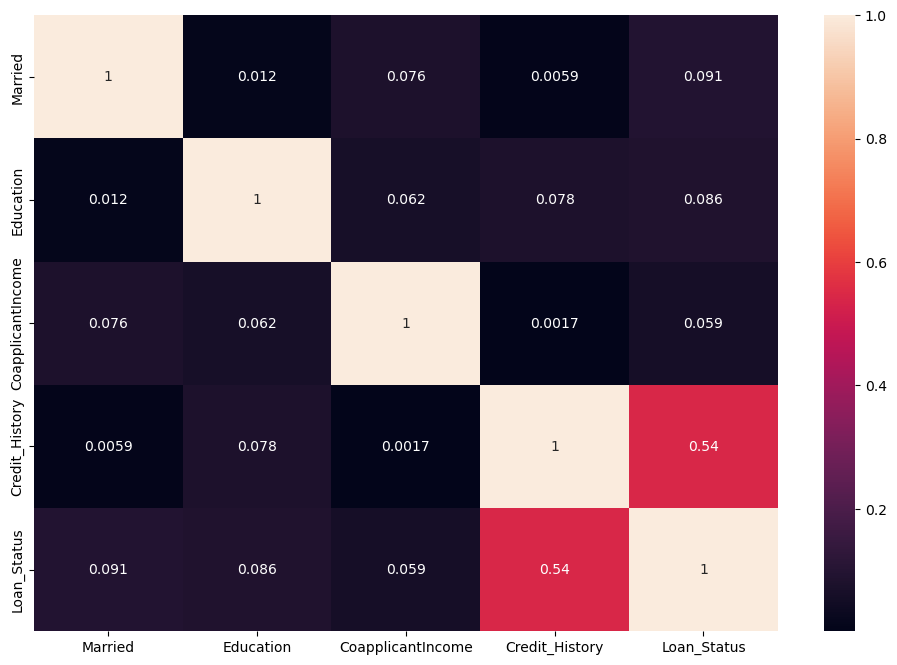

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

# 

### Removing Skewness

In [401]:
df.columns

Index(['Married', 'Education', 'CoapplicantIncome', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [402]:
df.skew()

Married             -0.644850
Education            1.367622
CoapplicantIncome    7.491531
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

In [403]:
df['Married'] = np.log1p(df['Married'])
df['Education'] = np.log1p(df['Education'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
#df['Credit_History'] = np.log1p(df['Credit_History'])
#df['Loan_Status'] = np.log1p(df['Loan_Status'])

In [404]:
df.skew()

Married             -0.644850
Education            1.367622
CoapplicantIncome   -0.173073
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

In [405]:
df1=df[['CoapplicantIncome']]

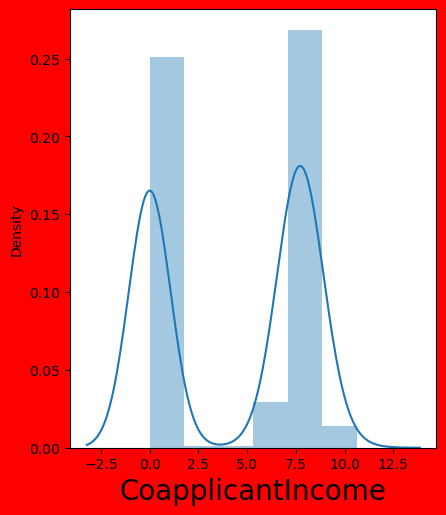

In [406]:
plt.figure(figsize=(16,20), facecolor='red')
plotnumber = 1

for column in df1:                       
    if plotnumber<=2:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df1)       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

# 

### Checking Outliners

In [407]:
df.columns

Index(['Married', 'Education', 'CoapplicantIncome', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [408]:
df.head()

Married  Education  CoapplicantIncome  Credit_History  Loan_Status
0  0.000000   0.000000           0.000000             1.0            1
1  0.693147   0.000000           7.319202             1.0            0
2  0.693147   0.000000           0.000000             1.0            1
3  0.693147   0.693147           7.765993             1.0            1
4  0.000000   0.000000           0.000000             1.0            1

In [409]:
df1=df[['CoapplicantIncome']]

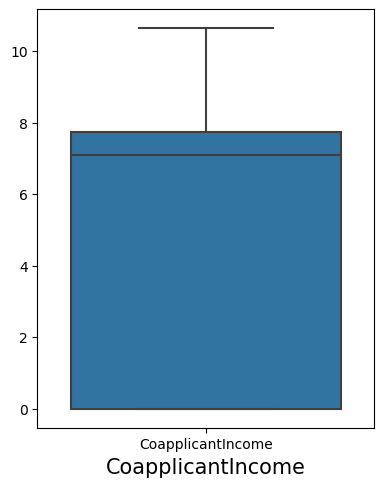

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df1: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df1)   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [411]:
df.shape

(614, 5)

###### No outliners found

# 

### Checking Distribution

In [412]:
df.columns

Index(['Married', 'Education', 'CoapplicantIncome', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [413]:
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

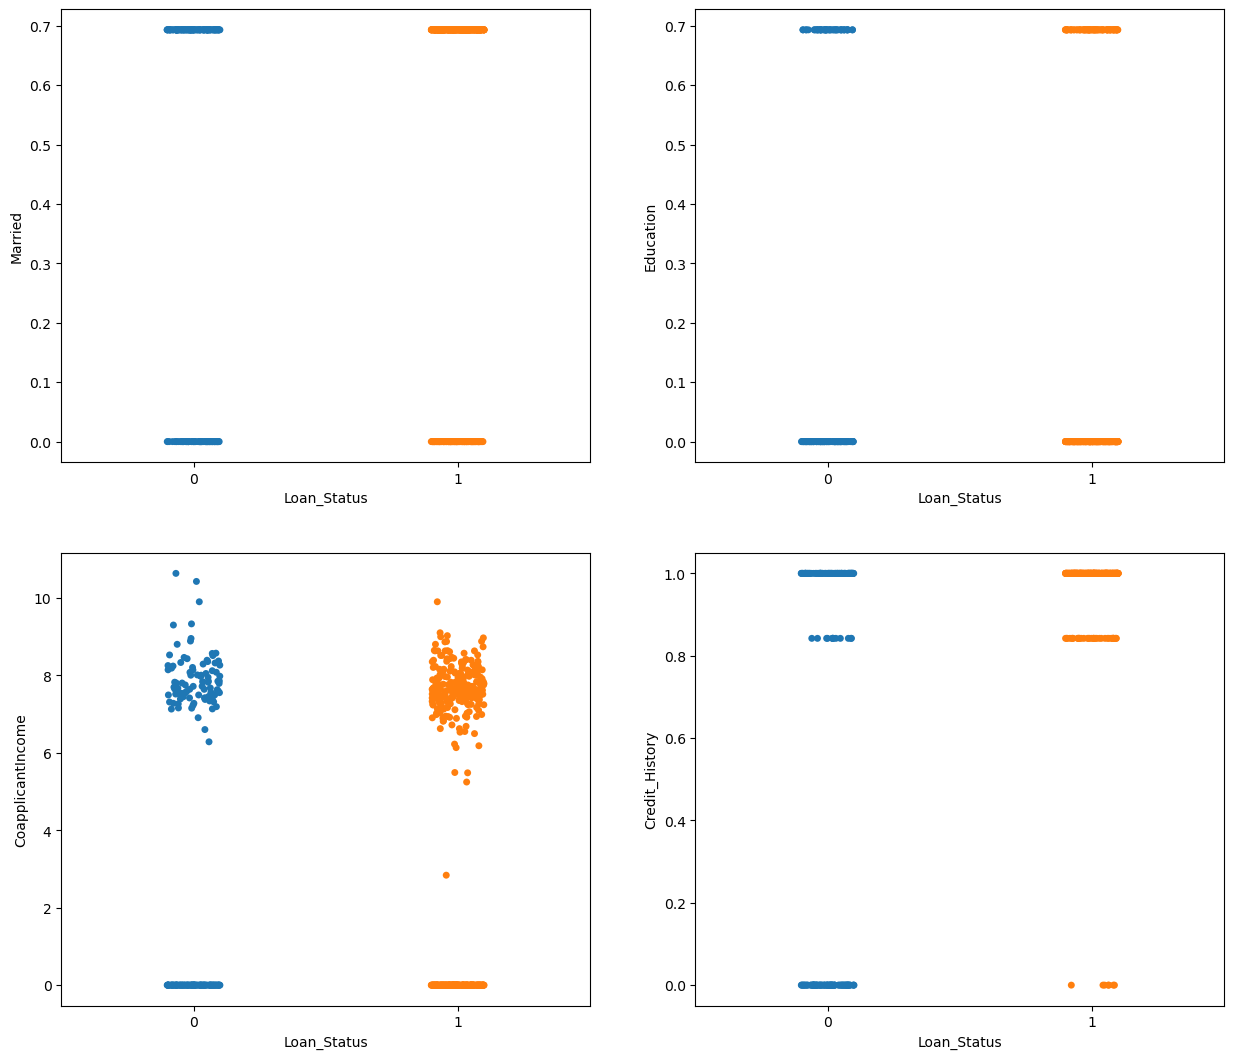

In [414]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=6:
        ax = plt.subplot (3,2,plotnumber)
        sns.stripplot(y,x[column])

    plotnumber+=1
plt.show()

# 

### Oversampling

In [415]:
df["Loan_Status"].unique()

array([1, 0], dtype=int64)

In [416]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [417]:
from imblearn.over_sampling import SMOTE

In [418]:
upsample = SMOTE()

In [419]:
x, y = upsample.fit_resample(x,y)

In [420]:
from collections import Counter
count = Counter(y)
print(count)

Counter({1: 422, 0: 422})


# 

### Separating Features & Target

In [421]:
x = df.drop(columns=['Loan_Status'],axis=1)
y = df.Loan_Status

# 

### Standardization

In [422]:
from sklearn.preprocessing import StandardScaler

In [423]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 

# 

### Train-Test split

In [424]:
from sklearn.model_selection import train_test_split

In [425]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0)

# 

### Importing important Metrices

In [426]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# 

### Logistic Regression

In [427]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [428]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [429]:
cls_reg.coef_

array([[ 0.15527157, -0.18706378,  0.05140208,  1.29089022]])

In [430]:
cls_reg.intercept_

array([0.74480331])

In [431]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [432]:
y_pred = cls_reg.predict(x_test)

In [433]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [434]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [435]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [436]:
from sklearn.model_selection import KFold, cross_val_score

In [437]:
cross_val_score (cls_reg, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [438]:
cross_val_score (cls_reg, x_train, y_train, cv=5).mean()

0.8021739130434783

In [439]:
cross_val_score (cls_reg, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.74193548, 0.80645161, 0.86666667])

In [440]:
cross_val_score (cls_reg, x_test, y_test, cv=5).mean()

0.8313978494623655

### ROC Curve

In [441]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [442]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


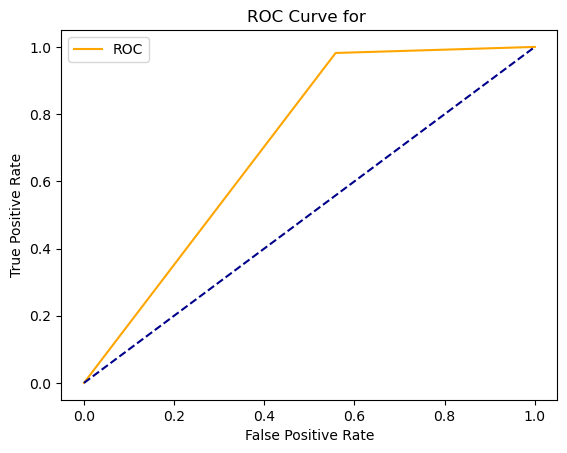

In [443]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to LogisticRegression

In [444]:
from sklearn.ensemble import BaggingClassifier

In [445]:
bag0 = BaggingClassifier(LogisticRegression())

In [446]:
bag0.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [447]:
print('Accuracy Score:',bag0.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [448]:
y_pred = bag0.predict(x_test)

In [449]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [450]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [451]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [452]:
from sklearn.model_selection import KFold, cross_val_score

In [453]:
cross_val_score (bag0, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [454]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.8021739130434783

In [455]:
cross_val_score (bag0, x_test, y_test, cv=5)

array([0.83870968, 0.87096774, 0.74193548, 0.83870968, 0.86666667])

In [456]:
cross_val_score (bag0, x_train, y_train, cv=5).mean()

0.8021739130434783

### ROC Curve

In [457]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [458]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


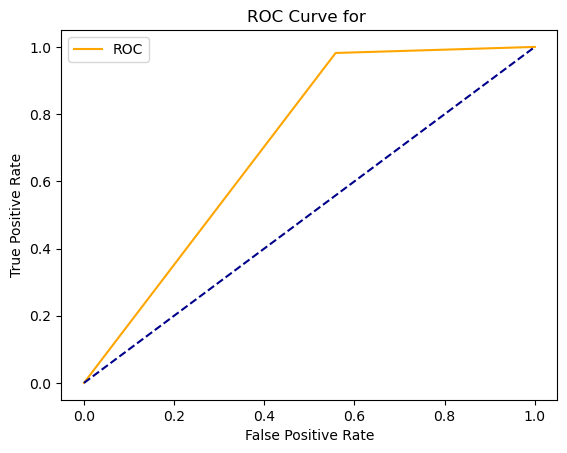

In [459]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### DecisionTreeClassifier

In [460]:
from sklearn.tree import DecisionTreeClassifier

In [1224]:
dc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(4, 20, 2),
              'min_samples_split': range(0, 10, 2),
              'min_samples_leaf': range(0,5,1),
              'max_features': ['sqrt', 'log2', None]
             }
gridsearch = GridSearchCV(estimator=dc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'best'}

In [663]:
cls_dt = DecisionTreeClassifier(criterion='entropy',max_features=None, min_samples_leaf=8, min_samples_split=2,max_depth=5)

In [664]:
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8)

In [665]:
print('Accuracy Score:',cls_dt.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [666]:
y_pred = cls_dt.predict(x_test)

In [667]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7922077922077922


In [668]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 21,  22],
       [ 10, 101]], dtype=int64)

In [669]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.49      0.57        43
           1       0.82      0.91      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.78      0.79      0.78       154



### Cross-validation

In [670]:
from sklearn.model_selection import KFold, cross_val_score

In [671]:
cross_val_score (cls_dt, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.79347826, 0.69565217, 0.81521739])

In [672]:
cross_val_score (cls_dt, x_train, y_train, cv=5).mean()

0.7891304347826087

In [673]:
cross_val_score (cls_dt, x_test, y_test, cv=5)

array([0.83870968, 0.87096774, 0.74193548, 0.80645161, 0.83333333])

In [674]:
cross_val_score (cls_dt, x_test, y_test, cv=5).mean()

0.818279569892473

### ROC Curve

In [675]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [676]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.90990991 1.        ]
False Positive rate =  [0.         0.51162791 1.        ]


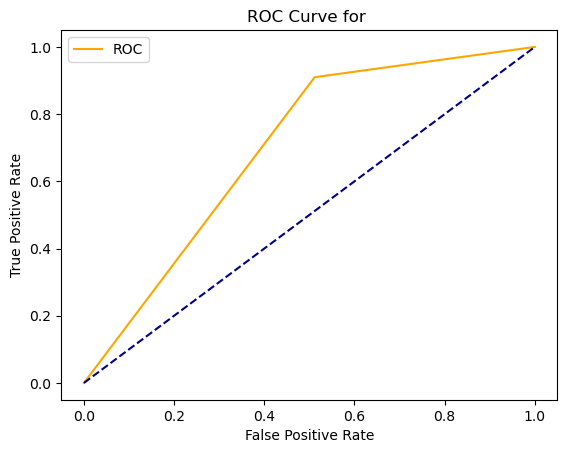

In [677]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to DecisionTreeClassifier

In [678]:
from sklearn.ensemble import BaggingClassifier

In [679]:
bag1 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_features=None, min_samples_leaf=8, min_samples_split=2,max_depth=5))

In [680]:
bag1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        min_samples_leaf=8))

In [681]:
print('Accuracy Score:',bag1.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [682]:
y_pred = bag1.predict(x_test)

In [683]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [684]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [685]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [686]:
from sklearn.model_selection import KFold, cross_val_score

In [687]:
cross_val_score (bag1, x_train, y_train, cv=5)

array([0.83695652, 0.79347826, 0.80434783, 0.75      , 0.81521739])

In [688]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.7956521739130434

In [689]:
cross_val_score (bag1, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.74193548, 0.80645161, 0.86666667])

In [690]:
cross_val_score (bag1, x_train, y_train, cv=5).mean()

0.7978260869565217

### ROC Curve

In [691]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [692]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


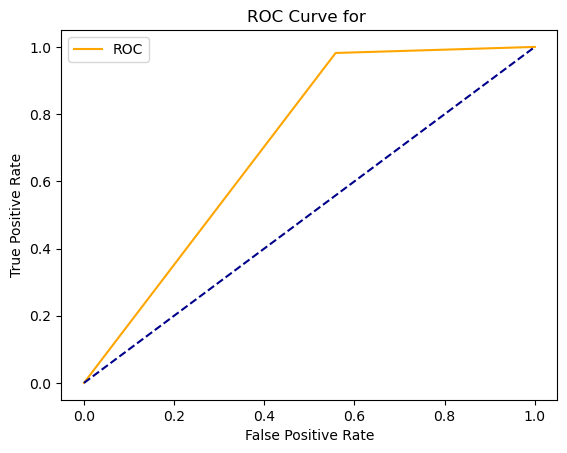

In [693]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Random Forest Classifier

In [694]:
from sklearn.ensemble import RandomForestClassifier

In [1257]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [802]:
cls_rf = RandomForestClassifier(n_estimators=250,criterion='gini',max_features=None,min_samples_split=6,max_depth=20)

In [803]:
cls_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=6,
                       n_estimators=250)

In [804]:
print('Accuracy Score:',cls_rf.score(x_train, y_train))

Accuracy Score: 0.8543478260869565


In [805]:
y_pred = cls_rf.predict(x_test)

In [806]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8246753246753247


In [807]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 21,  22],
       [  5, 106]], dtype=int64)

In [808]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.49      0.61        43
           1       0.83      0.95      0.89       111

    accuracy                           0.82       154
   macro avg       0.82      0.72      0.75       154
weighted avg       0.82      0.82      0.81       154



### Cross-validation

In [809]:
from sklearn.model_selection import KFold, cross_val_score

In [810]:
cross_val_score (cls_rf, x_train, y_train, cv=5)

array([0.76086957, 0.7826087 , 0.7826087 , 0.7173913 , 0.80434783])

In [811]:
cross_val_score (cls_rf, x_train, y_train, cv=5).mean()

0.7695652173913043

In [812]:
cross_val_score (cls_rf, x_test, y_test, cv=5)

array([0.80645161, 0.87096774, 0.74193548, 0.80645161, 0.8       ])

In [813]:
cross_val_score (cls_rf, x_test, y_test, cv=5).mean()

0.8118279569892473

### ROC Curve

In [814]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [815]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95495495 1.        ]
False Positive rate =  [0.         0.51162791 1.        ]


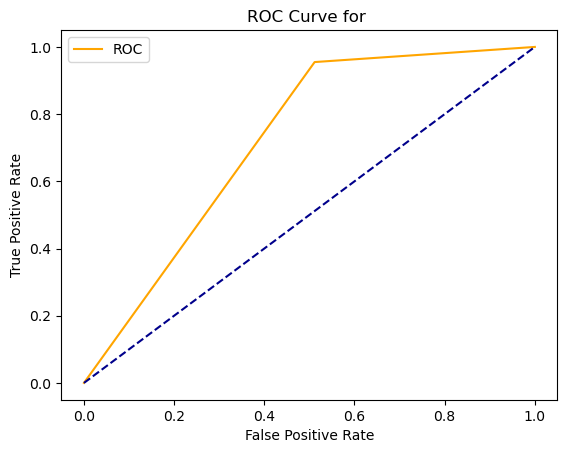

In [816]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to RandomForestClassifier

In [817]:
from sklearn.ensemble import BaggingClassifier

In [821]:
bag2 = BaggingClassifier(RandomForestClassifier(n_estimators=250,criterion='gini',max_features=None,min_samples_split=6,max_depth=20))

In [822]:
bag2.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=20,
                                                        max_features=None,
                                                        min_samples_split=6,
                                                        n_estimators=250))

In [823]:
print('Accuracy Score:',bag2.score(x_train, y_train))

Accuracy Score: 0.8217391304347826


In [824]:
y_pred = bag2.predict(x_test)

In [825]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8376623376623377


In [826]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 20,  23],
       [  2, 109]], dtype=int64)

In [827]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



### Cross-validation

In [828]:
from sklearn.model_selection import KFold, cross_val_score

In [829]:
cross_val_score (bag2, x_train, y_train, cv=5)

array([0.82608696, 0.79347826, 0.79347826, 0.70652174, 0.80434783])

In [830]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.7913043478260869

In [831]:
cross_val_score (bag2, x_test, y_test, cv=5)

array([0.83870968, 0.87096774, 0.74193548, 0.80645161, 0.83333333])

In [832]:
cross_val_score (bag2, x_train, y_train, cv=5).mean()

0.7869565217391304

### ROC Curve

In [833]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [834]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.53488372 1.        ]


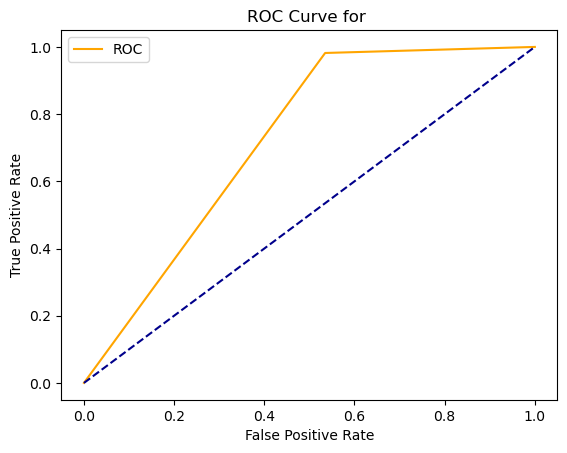

In [835]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### KNeighbors Classifier

In [837]:
from sklearn.neighbors import KNeighborsClassifier

In [1092]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [1002]:
cls_KN = KNeighborsClassifier(n_neighbors=15, leaf_size=16, p = 1, algorithm='auto', weights = 'distance')

In [1003]:
cls_KN.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=16, n_neighbors=15, p=1, weights='distance')

In [1004]:
print('Accuracy Score:',cls_KN.score(x_train, y_train))

Accuracy Score: 0.8913043478260869


In [1005]:
y_pred = cls_KN.predict(x_test)

In [1006]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7987012987012987


In [1007]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 20,  23],
       [  8, 103]], dtype=int64)

In [1008]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.47      0.56        43
           1       0.82      0.93      0.87       111

    accuracy                           0.80       154
   macro avg       0.77      0.70      0.72       154
weighted avg       0.79      0.80      0.78       154



### Cross-validation

In [1009]:
from sklearn.model_selection import KFold, cross_val_score

In [1010]:
cross_val_score (cls_KN, x_train, y_train, cv=15)

array([0.61290323, 0.83870968, 0.77419355, 0.77419355, 0.77419355,
       0.83870968, 0.77419355, 0.83870968, 0.70967742, 0.51612903,
       0.76666667, 0.66666667, 0.83333333, 0.7       , 0.83333333])

In [1011]:
cross_val_score (cls_KN, x_train, y_train, cv=5).mean()

0.7543478260869566

In [1012]:
cross_val_score (cls_KN, x_test, y_test, cv=15)

array([0.81818182, 0.72727273, 1.        , 0.90909091, 0.7       ,
       0.7       , 0.7       , 0.7       , 0.7       , 0.9       ,
       0.7       , 0.8       , 0.7       , 0.7       , 1.        ])

In [1013]:
cross_val_score (cls_KN, x_test, y_test, cv=5).mean()

0.772258064516129

### ROC Curve

In [1014]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1015]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.92792793 1.        ]
False Positive rate =  [0.         0.53488372 1.        ]


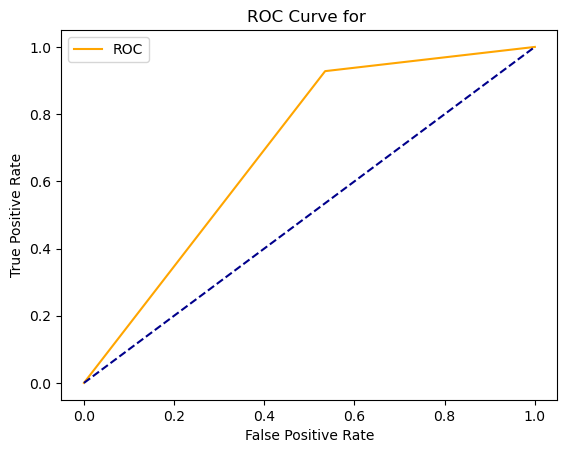

In [1016]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to KNeighborsClassifier

In [1017]:
from sklearn.ensemble import BaggingClassifier

In [1025]:
bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=15, leaf_size=16, p = 1, algorithm='auto', weights = 'distance'))

In [1026]:
bag3.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(leaf_size=16,
                                                      n_neighbors=15, p=1,
                                                      weights='distance'))

In [1027]:
print('Accuracy Score:',bag3.score(x_train, y_train))

Accuracy Score: 0.8804347826086957


In [1028]:
y_pred = bag3.predict(x_test)

In [1029]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7987012987012987


In [1030]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 20,  23],
       [  8, 103]], dtype=int64)

In [1031]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.47      0.56        43
           1       0.82      0.93      0.87       111

    accuracy                           0.80       154
   macro avg       0.77      0.70      0.72       154
weighted avg       0.79      0.80      0.78       154



### Cross-validation

In [1032]:
from sklearn.model_selection import KFold, cross_val_score

In [1033]:
cross_val_score (bag3, x_train, y_train, cv=5)

array([0.76086957, 0.79347826, 0.76086957, 0.69565217, 0.80434783])

In [1034]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.7608695652173912

In [1035]:
cross_val_score (bag3, x_test, y_test, cv=5)

array([0.87096774, 0.83870968, 0.74193548, 0.80645161, 0.73333333])

In [1036]:
cross_val_score (bag3, x_train, y_train, cv=5).mean()

0.7804347826086957

### ROC Curve

In [1037]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1038]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.92792793 1.        ]
False Positive rate =  [0.         0.53488372 1.        ]


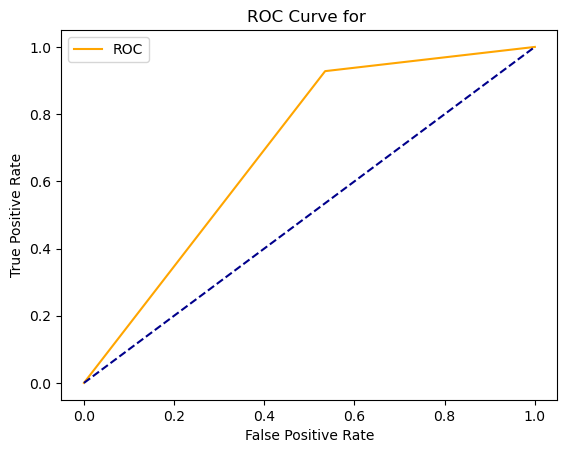

In [1039]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Support Vector Classifier

In [1308]:
from sklearn.svm import SVC

In [1309]:
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10, 100]}
gridsearch = GridSearchCV(estimator=svc, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [1450]:
cls_SVC = SVC(kernel='rbf',C=15, gamma=200)

In [1451]:
cls_SVC.fit(x_train, y_train)

SVC(C=15, gamma=200)

In [1452]:
print('Accuracy Score:',cls_SVC.score(x_train, y_train))

Accuracy Score: 0.8173913043478261


In [1453]:
y_pred = cls_SVC.predict(x_test)

In [1454]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8116883116883117


In [1455]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  5, 106]], dtype=int64)

In [1456]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.82      0.95      0.88       111

    accuracy                           0.81       154
   macro avg       0.80      0.70      0.72       154
weighted avg       0.81      0.81      0.79       154



### Cross-validation

In [1457]:
from sklearn.model_selection import KFold, cross_val_score

In [1458]:
cross_val_score (cls_SVC, x_train, y_train, cv=5)

array([0.82608696, 0.77173913, 0.79347826, 0.66304348, 0.7826087 ])

In [1459]:
cross_val_score (cls_SVC, x_train, y_train, cv=5).mean()

0.7673913043478261

In [1460]:
cross_val_score (cls_SVC, x_test, y_test, cv=5)

array([0.83870968, 0.83870968, 0.77419355, 0.74193548, 0.8       ])

In [1461]:
cross_val_score (cls_SVC, x_test, y_test, cv=5).mean()

0.7987096774193547

### ROC Curve

In [1462]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1463]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95495495 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


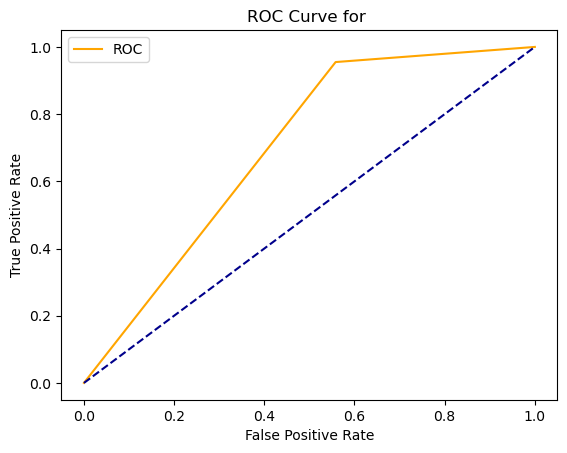

In [1464]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to Support Vector Classifier

In [1465]:
from sklearn.ensemble import BaggingClassifier

In [1466]:
bag4 = BaggingClassifier(SVC(kernel='rbf',C=15, gamma=200))

In [1467]:
bag4.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(C=15, gamma=200))

In [1468]:
print('Accuracy Score:',bag4.score(x_train, y_train))

Accuracy Score: 0.8173913043478261


In [1469]:
y_pred = bag4.predict(x_test)

In [1470]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.7987012987012987


In [1471]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  7, 104]], dtype=int64)

In [1472]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.81      0.94      0.87       111

    accuracy                           0.80       154
   macro avg       0.77      0.69      0.71       154
weighted avg       0.79      0.80      0.78       154



### Cross-validation

In [1473]:
from sklearn.model_selection import KFold, cross_val_score

In [1474]:
cross_val_score (bag4, x_train, y_train, cv=5)

array([0.81521739, 0.76086957, 0.80434783, 0.65217391, 0.75      ])

In [1475]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.7586956521739131

In [1476]:
cross_val_score (bag4, x_test, y_test, cv=5)

array([0.80645161, 0.83870968, 0.77419355, 0.74193548, 0.76666667])

In [1477]:
cross_val_score (bag4, x_train, y_train, cv=5).mean()

0.7478260869565216

### ROC Curve

In [1478]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1479]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.93693694 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


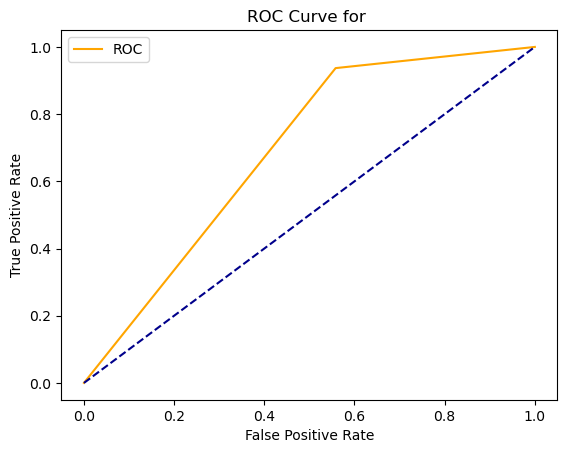

In [1480]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### GradientBoostingClassifier

In [1156]:
from sklearn.ensemble import GradientBoostingClassifier

In [1250]:
cls_gb = GradientBoostingClassifier(n_estimators=17,learning_rate=0.1,max_depth=6)

In [1251]:
cls_gb.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=6, n_estimators=17)

In [1252]:
print('Accuracy Score:',cls_gb.score(x_train, y_train))

Accuracy Score: 0.8304347826086956


In [1253]:
y_pred = cls_gb.predict(x_test)

In [1254]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8376623376623377


In [1255]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 21,  22],
       [  3, 108]], dtype=int64)

In [1256]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.83      0.97      0.90       111

    accuracy                           0.84       154
   macro avg       0.85      0.73      0.76       154
weighted avg       0.84      0.84      0.82       154



### Cross-validation

In [1257]:
from sklearn.model_selection import KFold, cross_val_score

In [1258]:
cross_val_score (cls_gb, x_train, y_train, cv=5)

array([0.7826087 , 0.79347826, 0.79347826, 0.66304348, 0.77173913])

In [1259]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.7630434782608695

In [1260]:
cross_val_score (cls_gb, x_test, y_test, cv=5)

array([0.80645161, 0.83870968, 0.70967742, 0.80645161, 0.83333333])

In [1261]:
cross_val_score (cls_gb, x_train, y_train, cv=5).mean()

0.7608695652173914

### ROC Curve

In [1262]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1263]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.97297297 1.        ]
False Positive rate =  [0.         0.51162791 1.        ]


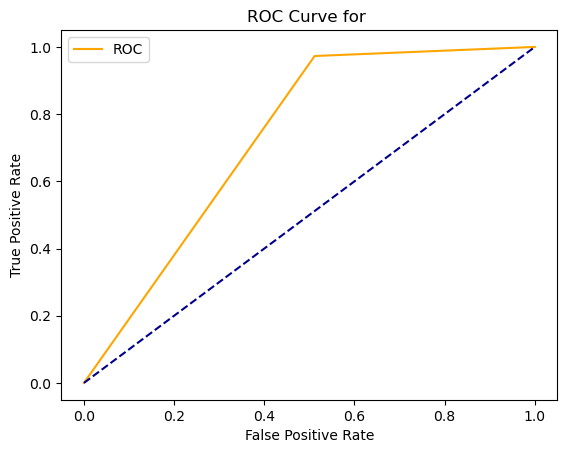

In [1264]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GradientBoostingClassifier

In [1266]:
from sklearn.ensemble import BaggingClassifier

In [1267]:
bag5 = BaggingClassifier(GradientBoostingClassifier(n_estimators=17,learning_rate=0.1,max_depth=6))

In [1268]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(max_depth=6,
                                                            n_estimators=17))

In [1269]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.8347826086956521


In [1270]:
y_pred = bag5.predict(x_test)

In [1271]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8181818181818182


In [1272]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 20,  23],
       [  5, 106]], dtype=int64)

In [1273]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.82      0.95      0.88       111

    accuracy                           0.82       154
   macro avg       0.81      0.71      0.74       154
weighted avg       0.82      0.82      0.80       154



### Cross-validation

In [1274]:
from sklearn.model_selection import KFold, cross_val_score

In [1275]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.80434783, 0.79347826, 0.80434783, 0.7173913 , 0.81521739])

In [1276]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.7891304347826088

In [1277]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.77419355, 0.83870968, 0.74193548, 0.77419355, 0.7       ])

In [1278]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.7847826086956522

### ROC Curve

In [1279]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1280]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95495495 1.        ]
False Positive rate =  [0.         0.53488372 1.        ]


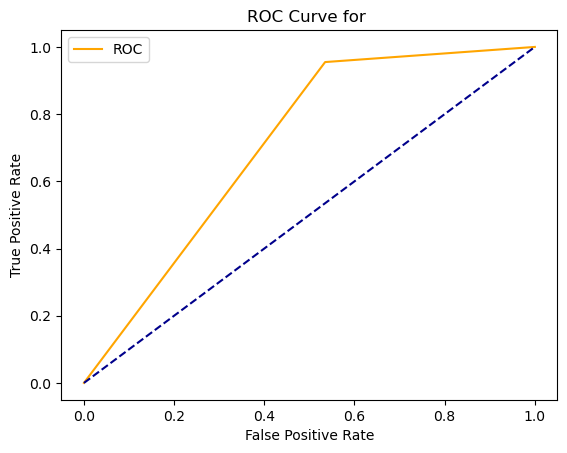

In [1281]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### GaussianNB

In [1282]:
from sklearn.naive_bayes import GaussianNB

In [1189]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gridsearch = GridSearchCV(estimator=gnb, param_grid=param_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'var_smoothing': 1e-09}

In [1303]:
gnb = GaussianNB(var_smoothing=1e-09)

In [1304]:
gnb.fit(x_train, y_train)

GaussianNB(var_smoothing=0.0001)

In [1305]:
print('Accuracy Score:',gnb.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [1306]:
y_pred = gnb.predict(x_test)

In [1307]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [1195]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [1196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [1197]:
from sklearn.model_selection import KFold, cross_val_score

In [1198]:
cross_val_score (gnb, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [1199]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.8021739130434783

In [1200]:
cross_val_score (gnb, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.74193548, 0.80645161, 0.86666667])

In [1201]:
cross_val_score (gnb, x_train, y_train, cv=5).mean()

0.8021739130434783

### ROC Curve

In [1202]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1203]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


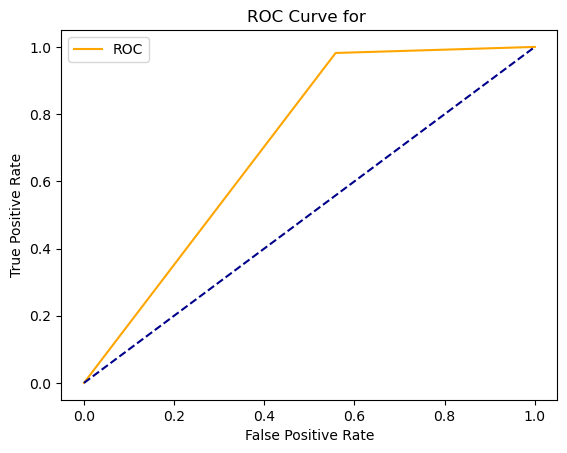

In [1204]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Applying BaggingClassifier to GaussianNB

In [1205]:
from sklearn.ensemble import BaggingClassifier

In [1206]:
bag6 = BaggingClassifier(GaussianNB(var_smoothing=1e-09))

In [1207]:
bag6.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [1208]:
print('Accuracy Score:',bag6.score(x_train, y_train))

Accuracy Score: 0.8021739130434783


In [1209]:
y_pred = bag6.predict(x_test)

In [1210]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8311688311688312


In [1211]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [1212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Cross-validation

In [1213]:
from sklearn.model_selection import KFold, cross_val_score

In [1214]:
cross_val_score (bag6, x_train, y_train, cv=5)

array([0.83695652, 0.80434783, 0.80434783, 0.75      , 0.81521739])

In [1215]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.7978260869565217

In [1216]:
cross_val_score (bag6, x_test, y_test, cv=5)

array([0.87096774, 0.87096774, 0.70967742, 0.80645161, 0.86666667])

In [1217]:
cross_val_score (bag6, x_train, y_train, cv=5).mean()

0.8021739130434783

### ROC Curve

In [1218]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1219]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98198198 1.        ]
False Positive rate =  [0.         0.55813953 1.        ]


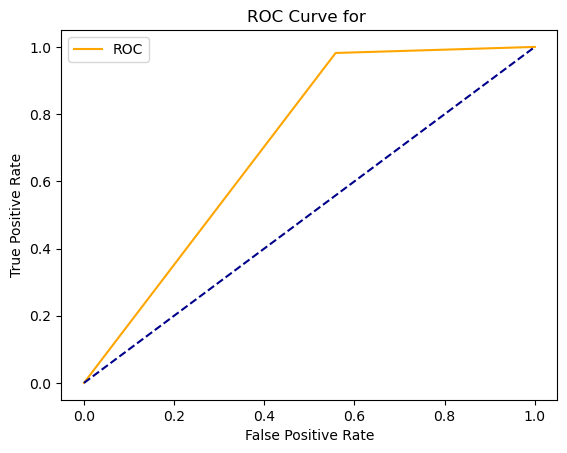

In [1220]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

# 

### Best Model

### Applying BaggingClassifier to GradientBoostingClassifier

In [1266]:
from sklearn.ensemble import BaggingClassifier

In [1267]:
bag5 = BaggingClassifier(GradientBoostingClassifier(n_estimators=17,learning_rate=0.1,max_depth=6))

In [1268]:
bag5.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(max_depth=6,
                                                            n_estimators=17))

In [1269]:
print('Accuracy Score:',bag5.score(x_train, y_train))

Accuracy Score: 0.8347826086956521


In [1270]:
y_pred = bag5.predict(x_test)

In [1271]:
print('Accuracy Score:',accuracy_score (y_test,y_pred))

Accuracy Score: 0.8181818181818182


In [1272]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 20,  23],
       [  5, 106]], dtype=int64)

In [1273]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.82      0.95      0.88       111

    accuracy                           0.82       154
   macro avg       0.81      0.71      0.74       154
weighted avg       0.82      0.82      0.80       154



### Cross-validation

In [1274]:
from sklearn.model_selection import KFold, cross_val_score

In [1275]:
cross_val_score (bag5, x_train, y_train, cv=5)

array([0.80434783, 0.79347826, 0.80434783, 0.7173913 , 0.81521739])

In [1276]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.7891304347826088

In [1277]:
cross_val_score (bag5, x_test, y_test, cv=5)

array([0.77419355, 0.83870968, 0.74193548, 0.77419355, 0.7       ])

In [1278]:
cross_val_score (bag5, x_train, y_train, cv=5).mean()

0.7847826086956522

### ROC Curve

In [1279]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [1280]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.95495495 1.        ]
False Positive rate =  [0.         0.53488372 1.        ]


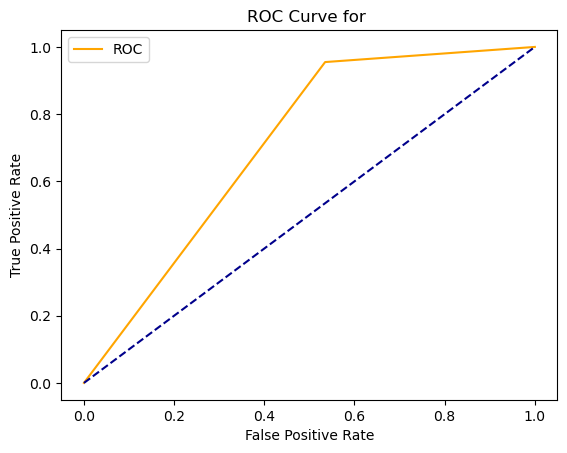

In [1281]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ')
plt.legend()
plt.show()

##### Reasons for choosing this model:-
##### 1) Has one of the highest accuracy for Testing data
##### 2) Difference between accuracy of Training & Testing data is very less
##### 3) Most stable model
##### 4) Has one of the highest accuracy for Testing data during Cross-validation
##### 5) Difference between accuracy of Training & Testing data is very less, during Cross-validation

# 

### Saving the Best Model

In [ ]:
import pickle

In [ ]:
with open('model_lasso', 'wb') as f: 
    pickle.dump(reg_lasso, f)

# 

# 